In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout,Flatten, BatchNormalization,Dense,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras import models

# 1.Detecting whether person is 'Child' or not 

In [2]:
# loading data
C_fd="./Data/Child2"
C_files=os.listdir(C_fd)
childs=[]
images=[]
for f in C_files:
  
    child=int(f.split('_')[0])
    total=C_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    childs.append(child)

./Data/Child2/0_adn (1).jpg
./Data/Child2/0_adn (10).jpg
./Data/Child2/0_adn (103).jpg
./Data/Child2/0_adn (104).jpg
./Data/Child2/0_adn (107).jpg
./Data/Child2/0_adn (108).jpg
./Data/Child2/0_adn (109).jpg
./Data/Child2/0_adn (11).jpg
./Data/Child2/0_adn (112).jpg
./Data/Child2/0_adn (114).jpg
./Data/Child2/0_adn (115).jpg
./Data/Child2/0_adn (116).jpg
./Data/Child2/0_adn (117).jpg
./Data/Child2/0_adn (118).jpg
./Data/Child2/0_adn (119).jpg
./Data/Child2/0_adn (12).jpg
./Data/Child2/0_adn (120).jpg
./Data/Child2/0_adn (121).jpg
./Data/Child2/0_adn (123).jpg
./Data/Child2/0_adn (124).jpg
./Data/Child2/0_adn (125).jpg
./Data/Child2/0_adn (126).jpg
./Data/Child2/0_adn (127).jpg
./Data/Child2/0_adn (128).jpg
./Data/Child2/0_adn (129).jpg
./Data/Child2/0_adn (13).jpg
./Data/Child2/0_adn (130).jpg
./Data/Child2/0_adn (131).jpg
./Data/Child2/0_adn (132).jpg
./Data/Child2/0_adn (133).jpg
./Data/Child2/0_adn (134).jpg
./Data/Child2/0_adn (135).jpg
./Data/Child2/0_adn (136).jpg
./Data/Child2/0_

./Data/Child2/0_adn (388).jpg
./Data/Child2/0_adn (389).jpg
./Data/Child2/0_adn (39).jpg
./Data/Child2/0_adn (390).jpg
./Data/Child2/0_adn (391).jpg
./Data/Child2/0_adn (392).jpg
./Data/Child2/0_adn (393).jpg
./Data/Child2/0_adn (394).jpg
./Data/Child2/0_adn (395).jpg
./Data/Child2/0_adn (396).jpg
./Data/Child2/0_adn (397).jpg
./Data/Child2/0_adn (398).jpg
./Data/Child2/0_adn (399).jpg
./Data/Child2/0_adn (4).jpg
./Data/Child2/0_adn (40).jpg
./Data/Child2/0_adn (400).jpg
./Data/Child2/0_adn (401).jpg
./Data/Child2/0_adn (402).jpg
./Data/Child2/0_adn (403).jpg
./Data/Child2/0_adn (404).jpg
./Data/Child2/0_adn (405).jpg
./Data/Child2/0_adn (406).jpg
./Data/Child2/0_adn (407).jpg
./Data/Child2/0_adn (408).jpg
./Data/Child2/0_adn (409).jpg
./Data/Child2/0_adn (41).jpg
./Data/Child2/0_adn (410).jpg
./Data/Child2/0_adn (411).jpg
./Data/Child2/0_adn (412).jpg
./Data/Child2/0_adn (413).jpg
./Data/Child2/0_adn (414).jpg
./Data/Child2/0_adn (415).jpg
./Data/Child2/0_adn (416).jpg
./Data/Child2/0

./Data/Child2/0_Adult (10153).jpg
./Data/Child2/0_Adult (10154).jpg
./Data/Child2/0_Adult (10155).jpg
./Data/Child2/0_Adult (10156).jpg
./Data/Child2/0_Adult (10157).jpg
./Data/Child2/0_Adult (10158).jpg
./Data/Child2/0_Adult (10159).jpg
./Data/Child2/0_Adult (1016).jpg
./Data/Child2/0_Adult (10160).jpg
./Data/Child2/0_Adult (10161).jpg
./Data/Child2/0_Adult (10162).jpg
./Data/Child2/0_Adult (10163).jpg
./Data/Child2/0_Adult (10164).jpg
./Data/Child2/0_Adult (10165).jpg
./Data/Child2/0_Adult (10166).jpg
./Data/Child2/0_Adult (10167).jpg
./Data/Child2/0_Adult (10168).jpg
./Data/Child2/0_Adult (10169).jpg
./Data/Child2/0_Adult (1017).jpg
./Data/Child2/0_Adult (10170).jpg
./Data/Child2/0_Adult (10171).jpg
./Data/Child2/0_Adult (10172).jpg
./Data/Child2/0_Adult (10173).jpg
./Data/Child2/0_Adult (10174).jpg
./Data/Child2/0_Adult (10175).jpg
./Data/Child2/0_Adult (10176).jpg
./Data/Child2/0_Adult (10177).jpg
./Data/Child2/0_Adult (10178).jpg
./Data/Child2/0_Adult (10179).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (1044).jpg
./Data/Child2/0_Adult (10440).jpg
./Data/Child2/0_Adult (10441).jpg
./Data/Child2/0_Adult (10442).jpg
./Data/Child2/0_Adult (10443).jpg
./Data/Child2/0_Adult (10444).jpg
./Data/Child2/0_Adult (10445).jpg
./Data/Child2/0_Adult (10446).jpg
./Data/Child2/0_Adult (10447).jpg
./Data/Child2/0_Adult (10448).jpg
./Data/Child2/0_Adult (10449).jpg
./Data/Child2/0_Adult (1045).jpg
./Data/Child2/0_Adult (10450).jpg
./Data/Child2/0_Adult (10451).jpg
./Data/Child2/0_Adult (10452).jpg
./Data/Child2/0_Adult (10453).jpg
./Data/Child2/0_Adult (10454).jpg
./Data/Child2/0_Adult (10455).jpg
./Data/Child2/0_Adult (10456).jpg
./Data/Child2/0_Adult (10457).jpg
./Data/Child2/0_Adult (10458).jpg
./Data/Child2/0_Adult (10459).jpg
./Data/Child2/0_Adult (1046).jpg
./Data/Child2/0_Adult (10460).jpg
./Data/Child2/0_Adult (10461).jpg
./Data/Child2/0_Adult (10462).jpg
./Data/Child2/0_Adult (10463).jpg
./Data/Child2/0_Adult (10464).jpg
./Data/Child2/0_Adult (10465).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (10725).jpg
./Data/Child2/0_Adult (10726).jpg
./Data/Child2/0_Adult (10727).jpg
./Data/Child2/0_Adult (10728).jpg
./Data/Child2/0_Adult (10729).jpg
./Data/Child2/0_Adult (1073).jpg
./Data/Child2/0_Adult (10730).jpg
./Data/Child2/0_Adult (10731).jpg
./Data/Child2/0_Adult (10732).jpg
./Data/Child2/0_Adult (10733).jpg
./Data/Child2/0_Adult (10734).jpg
./Data/Child2/0_Adult (10735).jpg
./Data/Child2/0_Adult (10736).jpg
./Data/Child2/0_Adult (10737).jpg
./Data/Child2/0_Adult (10738).jpg
./Data/Child2/0_Adult (10739).jpg
./Data/Child2/0_Adult (1074).jpg
./Data/Child2/0_Adult (10740).jpg
./Data/Child2/0_Adult (10741).jpg
./Data/Child2/0_Adult (10742).jpg
./Data/Child2/0_Adult (10743).jpg
./Data/Child2/0_Adult (10744).jpg
./Data/Child2/0_Adult (10745).jpg
./Data/Child2/0_Adult (10746).jpg
./Data/Child2/0_Adult (10747).jpg
./Data/Child2/0_Adult (10748).jpg
./Data/Child2/0_Adult (10749).jpg
./Data/Child2/0_Adult (1075).jpg
./Data/Child2/0_Adult (10750).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (11107).jpg
./Data/Child2/0_Adult (11108).jpg
./Data/Child2/0_Adult (11109).jpg
./Data/Child2/0_Adult (1111).jpg
./Data/Child2/0_Adult (11110).jpg
./Data/Child2/0_Adult (11111).jpg
./Data/Child2/0_Adult (11112).jpg
./Data/Child2/0_Adult (11113).jpg
./Data/Child2/0_Adult (11114).jpg
./Data/Child2/0_Adult (11115).jpg
./Data/Child2/0_Adult (11116).jpg
./Data/Child2/0_Adult (11117).jpg
./Data/Child2/0_Adult (11118).jpg
./Data/Child2/0_Adult (11119).jpg
./Data/Child2/0_Adult (1112).jpg
./Data/Child2/0_Adult (11120).jpg
./Data/Child2/0_Adult (11121).jpg
./Data/Child2/0_Adult (11122).jpg
./Data/Child2/0_Adult (11123).jpg
./Data/Child2/0_Adult (11124).jpg
./Data/Child2/0_Adult (11125).jpg
./Data/Child2/0_Adult (11126).jpg
./Data/Child2/0_Adult (11127).jpg
./Data/Child2/0_Adult (11128).jpg
./Data/Child2/0_Adult (11129).jpg
./Data/Child2/0_Adult (1113).jpg
./Data/Child2/0_Adult (11130).jpg
./Data/Child2/0_Adult (11131).jpg
./Data/Child2/0_Adult (11132).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (11415).jpg
./Data/Child2/0_Adult (11416).jpg
./Data/Child2/0_Adult (11417).jpg
./Data/Child2/0_Adult (11418).jpg
./Data/Child2/0_Adult (11419).jpg
./Data/Child2/0_Adult (1142).jpg
./Data/Child2/0_Adult (11420).jpg
./Data/Child2/0_Adult (11421).jpg
./Data/Child2/0_Adult (11422).jpg
./Data/Child2/0_Adult (11423).jpg
./Data/Child2/0_Adult (11424).jpg
./Data/Child2/0_Adult (11425).jpg
./Data/Child2/0_Adult (11426).jpg
./Data/Child2/0_Adult (11427).jpg
./Data/Child2/0_Adult (11428).jpg
./Data/Child2/0_Adult (11429).jpg
./Data/Child2/0_Adult (1143).jpg
./Data/Child2/0_Adult (11430).jpg
./Data/Child2/0_Adult (11431).jpg
./Data/Child2/0_Adult (11432).jpg
./Data/Child2/0_Adult (11433).jpg
./Data/Child2/0_Adult (11434).jpg
./Data/Child2/0_Adult (11435).jpg
./Data/Child2/0_Adult (11436).jpg
./Data/Child2/0_Adult (11437).jpg
./Data/Child2/0_Adult (11438).jpg
./Data/Child2/0_Adult (11439).jpg
./Data/Child2/0_Adult (1144).jpg
./Data/Child2/0_Adult (11440).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (11747).jpg
./Data/Child2/0_Adult (11748).jpg
./Data/Child2/0_Adult (11749).jpg
./Data/Child2/0_Adult (1175).jpg
./Data/Child2/0_Adult (11750).jpg
./Data/Child2/0_Adult (11751).jpg
./Data/Child2/0_Adult (11752).jpg
./Data/Child2/0_Adult (11753).jpg
./Data/Child2/0_Adult (11754).jpg
./Data/Child2/0_Adult (11755).jpg
./Data/Child2/0_Adult (11756).jpg
./Data/Child2/0_Adult (11757).jpg
./Data/Child2/0_Adult (11758).jpg
./Data/Child2/0_Adult (11759).jpg
./Data/Child2/0_Adult (1176).jpg
./Data/Child2/0_Adult (11760).jpg
./Data/Child2/0_Adult (11761).jpg
./Data/Child2/0_Adult (11762).jpg
./Data/Child2/0_Adult (11763).jpg
./Data/Child2/0_Adult (11764).jpg
./Data/Child2/0_Adult (11765).jpg
./Data/Child2/0_Adult (11766).jpg
./Data/Child2/0_Adult (11767).jpg
./Data/Child2/0_Adult (11768).jpg
./Data/Child2/0_Adult (11769).jpg
./Data/Child2/0_Adult (1177).jpg
./Data/Child2/0_Adult (11770).jpg
./Data/Child2/0_Adult (11771).jpg
./Data/Child2/0_Adult (11772).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (11965).jpg
./Data/Child2/0_Adult (11966).jpg
./Data/Child2/0_Adult (11967).jpg
./Data/Child2/0_Adult (11968).jpg
./Data/Child2/0_Adult (11969).jpg
./Data/Child2/0_Adult (1197).jpg
./Data/Child2/0_Adult (11970).jpg
./Data/Child2/0_Adult (11971).jpg
./Data/Child2/0_Adult (11972).jpg
./Data/Child2/0_Adult (11973).jpg
./Data/Child2/0_Adult (11974).jpg
./Data/Child2/0_Adult (11975).jpg
./Data/Child2/0_Adult (11976).jpg
./Data/Child2/0_Adult (11977).jpg
./Data/Child2/0_Adult (11978).jpg
./Data/Child2/0_Adult (11979).jpg
./Data/Child2/0_Adult (1198).jpg
./Data/Child2/0_Adult (11980).jpg
./Data/Child2/0_Adult (11981).jpg
./Data/Child2/0_Adult (11982).jpg
./Data/Child2/0_Adult (11983).jpg
./Data/Child2/0_Adult (11984).jpg
./Data/Child2/0_Adult (11985).jpg
./Data/Child2/0_Adult (11986).jpg
./Data/Child2/0_Adult (11987).jpg
./Data/Child2/0_Adult (11988).jpg
./Data/Child2/0_Adult (11989).jpg
./Data/Child2/0_Adult (1199).jpg
./Data/Child2/0_Adult (11990).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (12272).jpg
./Data/Child2/0_Adult (12273).jpg
./Data/Child2/0_Adult (12274).jpg
./Data/Child2/0_Adult (12275).jpg
./Data/Child2/0_Adult (12276).jpg
./Data/Child2/0_Adult (12277).jpg
./Data/Child2/0_Adult (12278).jpg
./Data/Child2/0_Adult (12279).jpg
./Data/Child2/0_Adult (1228).jpg
./Data/Child2/0_Adult (12280).jpg
./Data/Child2/0_Adult (12281).jpg
./Data/Child2/0_Adult (12282).jpg
./Data/Child2/0_Adult (12283).jpg
./Data/Child2/0_Adult (12284).jpg
./Data/Child2/0_Adult (12285).jpg
./Data/Child2/0_Adult (12286).jpg
./Data/Child2/0_Adult (12287).jpg
./Data/Child2/0_Adult (12288).jpg
./Data/Child2/0_Adult (12289).jpg
./Data/Child2/0_Adult (1229).jpg
./Data/Child2/0_Adult (12290).jpg
./Data/Child2/0_Adult (12291).jpg
./Data/Child2/0_Adult (12292).jpg
./Data/Child2/0_Adult (12293).jpg
./Data/Child2/0_Adult (12294).jpg
./Data/Child2/0_Adult (12295).jpg
./Data/Child2/0_Adult (12296).jpg
./Data/Child2/0_Adult (12297).jpg
./Data/Child2/0_Adult (12298).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (12514).jpg
./Data/Child2/0_Adult (12515).jpg
./Data/Child2/0_Adult (12516).jpg
./Data/Child2/0_Adult (12517).jpg
./Data/Child2/0_Adult (12518).jpg
./Data/Child2/0_Adult (12519).jpg
./Data/Child2/0_Adult (1252).jpg
./Data/Child2/0_Adult (12520).jpg
./Data/Child2/0_Adult (12521).jpg
./Data/Child2/0_Adult (12522).jpg
./Data/Child2/0_Adult (12523).jpg
./Data/Child2/0_Adult (12524).jpg
./Data/Child2/0_Adult (12525).jpg
./Data/Child2/0_Adult (12526).jpg
./Data/Child2/0_Adult (12527).jpg
./Data/Child2/0_Adult (12528).jpg
./Data/Child2/0_Adult (12529).jpg
./Data/Child2/0_Adult (1253).jpg
./Data/Child2/0_Adult (12530).jpg
./Data/Child2/0_Adult (12531).jpg
./Data/Child2/0_Adult (12532).jpg
./Data/Child2/0_Adult (12533).jpg
./Data/Child2/0_Adult (12534).jpg
./Data/Child2/0_Adult (12535).jpg
./Data/Child2/0_Adult (12536).jpg
./Data/Child2/0_Adult (12537).jpg
./Data/Child2/0_Adult (12538).jpg
./Data/Child2/0_Adult (12539).jpg
./Data/Child2/0_Adult (1254).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (12843).jpg
./Data/Child2/0_Adult (12844).jpg
./Data/Child2/0_Adult (12845).jpg
./Data/Child2/0_Adult (12846).jpg
./Data/Child2/0_Adult (12847).jpg
./Data/Child2/0_Adult (12848).jpg
./Data/Child2/0_Adult (12849).jpg
./Data/Child2/0_Adult (1285).jpg
./Data/Child2/0_Adult (12850).jpg
./Data/Child2/0_Adult (12851).jpg
./Data/Child2/0_Adult (12852).jpg
./Data/Child2/0_Adult (12853).jpg
./Data/Child2/0_Adult (12854).jpg
./Data/Child2/0_Adult (12855).jpg
./Data/Child2/0_Adult (12856).jpg
./Data/Child2/0_Adult (12857).jpg
./Data/Child2/0_Adult (12858).jpg
./Data/Child2/0_Adult (12859).jpg
./Data/Child2/0_Adult (1286).jpg
./Data/Child2/0_Adult (12860).jpg
./Data/Child2/0_Adult (12861).jpg
./Data/Child2/0_Adult (12862).jpg
./Data/Child2/0_Adult (12863).jpg
./Data/Child2/0_Adult (12864).jpg
./Data/Child2/0_Adult (12865).jpg
./Data/Child2/0_Adult (12866).jpg
./Data/Child2/0_Adult (12867).jpg
./Data/Child2/0_Adult (12868).jpg
./Data/Child2/0_Adult (12869).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (13061).jpg
./Data/Child2/0_Adult (13062).jpg
./Data/Child2/0_Adult (13063).jpg
./Data/Child2/0_Adult (13064).jpg
./Data/Child2/0_Adult (13065).jpg
./Data/Child2/0_Adult (13066).jpg
./Data/Child2/0_Adult (13067).jpg
./Data/Child2/0_Adult (13068).jpg
./Data/Child2/0_Adult (13069).jpg
./Data/Child2/0_Adult (1307).jpg
./Data/Child2/0_Adult (13070).jpg
./Data/Child2/0_Adult (13071).jpg
./Data/Child2/0_Adult (13072).jpg
./Data/Child2/0_Adult (13073).jpg
./Data/Child2/0_Adult (13074).jpg
./Data/Child2/0_Adult (13075).jpg
./Data/Child2/0_Adult (13076).jpg
./Data/Child2/0_Adult (13077).jpg
./Data/Child2/0_Adult (13078).jpg
./Data/Child2/0_Adult (13079).jpg
./Data/Child2/0_Adult (1308).jpg
./Data/Child2/0_Adult (13080).jpg
./Data/Child2/0_Adult (13081).jpg
./Data/Child2/0_Adult (13082).jpg
./Data/Child2/0_Adult (13083).jpg
./Data/Child2/0_Adult (13084).jpg
./Data/Child2/0_Adult (13085).jpg
./Data/Child2/0_Adult (13086).jpg
./Data/Child2/0_Adult (13087).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (13374).jpg
./Data/Child2/0_Adult (13375).jpg
./Data/Child2/0_Adult (13376).jpg
./Data/Child2/0_Adult (13377).jpg
./Data/Child2/0_Adult (13378).jpg
./Data/Child2/0_Adult (13379).jpg
./Data/Child2/0_Adult (1338).jpg
./Data/Child2/0_Adult (13380).jpg
./Data/Child2/0_Adult (13381).jpg
./Data/Child2/0_Adult (13382).jpg
./Data/Child2/0_Adult (13383).jpg
./Data/Child2/0_Adult (13384).jpg
./Data/Child2/0_Adult (13385).jpg
./Data/Child2/0_Adult (13386).jpg
./Data/Child2/0_Adult (13387).jpg
./Data/Child2/0_Adult (13388).jpg
./Data/Child2/0_Adult (13389).jpg
./Data/Child2/0_Adult (1339).jpg
./Data/Child2/0_Adult (13390).jpg
./Data/Child2/0_Adult (13391).jpg
./Data/Child2/0_Adult (13392).jpg
./Data/Child2/0_Adult (13393).jpg
./Data/Child2/0_Adult (13394).jpg
./Data/Child2/0_Adult (13395).jpg
./Data/Child2/0_Adult (13396).jpg
./Data/Child2/0_Adult (13397).jpg
./Data/Child2/0_Adult (13398).jpg
./Data/Child2/0_Adult (13399).jpg
./Data/Child2/0_Adult (134).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (13770).jpg
./Data/Child2/0_Adult (13771).jpg
./Data/Child2/0_Adult (13772).jpg
./Data/Child2/0_Adult (13773).jpg
./Data/Child2/0_Adult (13774).jpg
./Data/Child2/0_Adult (13775).jpg
./Data/Child2/0_Adult (13776).jpg
./Data/Child2/0_Adult (13777).jpg
./Data/Child2/0_Adult (13778).jpg
./Data/Child2/0_Adult (13779).jpg
./Data/Child2/0_Adult (1378).jpg
./Data/Child2/0_Adult (13780).jpg
./Data/Child2/0_Adult (13781).jpg
./Data/Child2/0_Adult (13782).jpg
./Data/Child2/0_Adult (13783).jpg
./Data/Child2/0_Adult (13784).jpg
./Data/Child2/0_Adult (13785).jpg
./Data/Child2/0_Adult (13786).jpg
./Data/Child2/0_Adult (13787).jpg
./Data/Child2/0_Adult (13788).jpg
./Data/Child2/0_Adult (13789).jpg
./Data/Child2/0_Adult (1379).jpg
./Data/Child2/0_Adult (13790).jpg
./Data/Child2/0_Adult (13791).jpg
./Data/Child2/0_Adult (13792).jpg
./Data/Child2/0_Adult (13793).jpg
./Data/Child2/0_Adult (13794).jpg
./Data/Child2/0_Adult (13795).jpg
./Data/Child2/0_Adult (13796).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (14188).jpg
./Data/Child2/0_Adult (14189).jpg
./Data/Child2/0_Adult (1419).jpg
./Data/Child2/0_Adult (14190).jpg
./Data/Child2/0_Adult (14191).jpg
./Data/Child2/0_Adult (14192).jpg
./Data/Child2/0_Adult (14193).jpg
./Data/Child2/0_Adult (14194).jpg
./Data/Child2/0_Adult (14195).jpg
./Data/Child2/0_Adult (14196).jpg
./Data/Child2/0_Adult (14197).jpg
./Data/Child2/0_Adult (14198).jpg
./Data/Child2/0_Adult (14199).jpg
./Data/Child2/0_Adult (142).jpg
./Data/Child2/0_Adult (1420).jpg
./Data/Child2/0_Adult (14200).jpg
./Data/Child2/0_Adult (14201).jpg
./Data/Child2/0_Adult (14202).jpg
./Data/Child2/0_Adult (14203).jpg
./Data/Child2/0_Adult (14204).jpg
./Data/Child2/0_Adult (14205).jpg
./Data/Child2/0_Adult (14206).jpg
./Data/Child2/0_Adult (14207).jpg
./Data/Child2/0_Adult (14208).jpg
./Data/Child2/0_Adult (14209).jpg
./Data/Child2/0_Adult (1421).jpg
./Data/Child2/0_Adult (14210).jpg
./Data/Child2/0_Adult (14211).jpg
./Data/Child2/0_Adult (14212).jpg
./Data/Child2/0_Adu

./Data/Child2/0_Adult (14605).jpg
./Data/Child2/0_Adult (14606).jpg
./Data/Child2/0_Adult (14607).jpg
./Data/Child2/0_Adult (14608).jpg
./Data/Child2/0_Adult (14609).jpg
./Data/Child2/0_Adult (1461).jpg
./Data/Child2/0_Adult (14610).jpg
./Data/Child2/0_Adult (14611).jpg
./Data/Child2/0_Adult (14612).jpg
./Data/Child2/0_Adult (14613).jpg
./Data/Child2/0_Adult (14614).jpg
./Data/Child2/0_Adult (14615).jpg
./Data/Child2/0_Adult (14616).jpg
./Data/Child2/0_Adult (14617).jpg
./Data/Child2/0_Adult (14618).jpg
./Data/Child2/0_Adult (14619).jpg
./Data/Child2/0_Adult (1462).jpg
./Data/Child2/0_Adult (14620).jpg
./Data/Child2/0_Adult (14621).jpg
./Data/Child2/0_Adult (14622).jpg
./Data/Child2/0_Adult (14623).jpg
./Data/Child2/0_Adult (14624).jpg
./Data/Child2/0_Adult (14625).jpg
./Data/Child2/0_Adult (14626).jpg
./Data/Child2/0_Adult (14627).jpg
./Data/Child2/0_Adult (14628).jpg
./Data/Child2/0_Adult (14629).jpg
./Data/Child2/0_Adult (1463).jpg
./Data/Child2/0_Adult (14630).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (14872).jpg
./Data/Child2/0_Adult (14873).jpg
./Data/Child2/0_Adult (14874).jpg
./Data/Child2/0_Adult (14875).jpg
./Data/Child2/0_Adult (14876).jpg
./Data/Child2/0_Adult (14877).jpg
./Data/Child2/0_Adult (14878).jpg
./Data/Child2/0_Adult (14879).jpg
./Data/Child2/0_Adult (1488).jpg
./Data/Child2/0_Adult (14880).jpg
./Data/Child2/0_Adult (14881).jpg
./Data/Child2/0_Adult (14882).jpg
./Data/Child2/0_Adult (14883).jpg
./Data/Child2/0_Adult (14884).jpg
./Data/Child2/0_Adult (14885).jpg
./Data/Child2/0_Adult (14886).jpg
./Data/Child2/0_Adult (14887).jpg
./Data/Child2/0_Adult (14888).jpg
./Data/Child2/0_Adult (14889).jpg
./Data/Child2/0_Adult (1489).jpg
./Data/Child2/0_Adult (14890).jpg
./Data/Child2/0_Adult (14891).jpg
./Data/Child2/0_Adult (14892).jpg
./Data/Child2/0_Adult (14893).jpg
./Data/Child2/0_Adult (14894).jpg
./Data/Child2/0_Adult (14895).jpg
./Data/Child2/0_Adult (14896).jpg
./Data/Child2/0_Adult (14897).jpg
./Data/Child2/0_Adult (14898).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (15153).jpg
./Data/Child2/0_Adult (15154).jpg
./Data/Child2/0_Adult (15155).jpg
./Data/Child2/0_Adult (15156).jpg
./Data/Child2/0_Adult (15157).jpg
./Data/Child2/0_Adult (15158).jpg
./Data/Child2/0_Adult (15159).jpg
./Data/Child2/0_Adult (1516).jpg
./Data/Child2/0_Adult (15160).jpg
./Data/Child2/0_Adult (15161).jpg
./Data/Child2/0_Adult (15162).jpg
./Data/Child2/0_Adult (15163).jpg
./Data/Child2/0_Adult (15164).jpg
./Data/Child2/0_Adult (15165).jpg
./Data/Child2/0_Adult (15166).jpg
./Data/Child2/0_Adult (15167).jpg
./Data/Child2/0_Adult (15168).jpg
./Data/Child2/0_Adult (15169).jpg
./Data/Child2/0_Adult (1517).jpg
./Data/Child2/0_Adult (15170).jpg
./Data/Child2/0_Adult (15171).jpg
./Data/Child2/0_Adult (15172).jpg
./Data/Child2/0_Adult (15173).jpg
./Data/Child2/0_Adult (15174).jpg
./Data/Child2/0_Adult (15175).jpg
./Data/Child2/0_Adult (15176).jpg
./Data/Child2/0_Adult (15177).jpg
./Data/Child2/0_Adult (15178).jpg
./Data/Child2/0_Adult (15179).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (1546).jpg
./Data/Child2/0_Adult (15460).jpg
./Data/Child2/0_Adult (15461).jpg
./Data/Child2/0_Adult (15462).jpg
./Data/Child2/0_Adult (15463).jpg
./Data/Child2/0_Adult (15464).jpg
./Data/Child2/0_Adult (15465).jpg
./Data/Child2/0_Adult (15466).jpg
./Data/Child2/0_Adult (15467).jpg
./Data/Child2/0_Adult (15468).jpg
./Data/Child2/0_Adult (15469).jpg
./Data/Child2/0_Adult (1547).jpg
./Data/Child2/0_Adult (15470).jpg
./Data/Child2/0_Adult (15471).jpg
./Data/Child2/0_Adult (15472).jpg
./Data/Child2/0_Adult (15473).jpg
./Data/Child2/0_Adult (15474).jpg
./Data/Child2/0_Adult (15475).jpg
./Data/Child2/0_Adult (15476).jpg
./Data/Child2/0_Adult (15477).jpg
./Data/Child2/0_Adult (15478).jpg
./Data/Child2/0_Adult (15479).jpg
./Data/Child2/0_Adult (1548).jpg
./Data/Child2/0_Adult (15480).jpg
./Data/Child2/0_Adult (15481).jpg
./Data/Child2/0_Adult (15482).jpg
./Data/Child2/0_Adult (15483).jpg
./Data/Child2/0_Adult (15484).jpg
./Data/Child2/0_Adult (15485).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (15720).jpg
./Data/Child2/0_Adult (15721).jpg
./Data/Child2/0_Adult (15722).jpg
./Data/Child2/0_Adult (15723).jpg
./Data/Child2/0_Adult (15724).jpg
./Data/Child2/0_Adult (15725).jpg
./Data/Child2/0_Adult (15726).jpg
./Data/Child2/0_Adult (15727).jpg
./Data/Child2/0_Adult (15728).jpg
./Data/Child2/0_Adult (15729).jpg
./Data/Child2/0_Adult (1573).jpg
./Data/Child2/0_Adult (15730).jpg
./Data/Child2/0_Adult (15731).jpg
./Data/Child2/0_Adult (15732).jpg
./Data/Child2/0_Adult (15733).jpg
./Data/Child2/0_Adult (15734).jpg
./Data/Child2/0_Adult (15735).jpg
./Data/Child2/0_Adult (15736).jpg
./Data/Child2/0_Adult (15737).jpg
./Data/Child2/0_Adult (15738).jpg
./Data/Child2/0_Adult (15739).jpg
./Data/Child2/0_Adult (1574).jpg
./Data/Child2/0_Adult (15740).jpg
./Data/Child2/0_Adult (15741).jpg
./Data/Child2/0_Adult (15742).jpg
./Data/Child2/0_Adult (15743).jpg
./Data/Child2/0_Adult (15744).jpg
./Data/Child2/0_Adult (15745).jpg
./Data/Child2/0_Adult (15746).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (16183).jpg
./Data/Child2/0_Adult (16184).jpg
./Data/Child2/0_Adult (16185).jpg
./Data/Child2/0_Adult (16186).jpg
./Data/Child2/0_Adult (16187).jpg
./Data/Child2/0_Adult (16188).jpg
./Data/Child2/0_Adult (16189).jpg
./Data/Child2/0_Adult (1619).jpg
./Data/Child2/0_Adult (16190).jpg
./Data/Child2/0_Adult (16191).jpg
./Data/Child2/0_Adult (16192).jpg
./Data/Child2/0_Adult (16193).jpg
./Data/Child2/0_Adult (16194).jpg
./Data/Child2/0_Adult (16195).jpg
./Data/Child2/0_Adult (16196).jpg
./Data/Child2/0_Adult (16197).jpg
./Data/Child2/0_Adult (16198).jpg
./Data/Child2/0_Adult (16199).jpg
./Data/Child2/0_Adult (162).jpg
./Data/Child2/0_Adult (1620).jpg
./Data/Child2/0_Adult (16200).jpg
./Data/Child2/0_Adult (16201).jpg
./Data/Child2/0_Adult (16202).jpg
./Data/Child2/0_Adult (16203).jpg
./Data/Child2/0_Adult (16204).jpg
./Data/Child2/0_Adult (16205).jpg
./Data/Child2/0_Adult (16206).jpg
./Data/Child2/0_Adult (16207).jpg
./Data/Child2/0_Adult (16208).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (1652).jpg
./Data/Child2/0_Adult (16520).jpg
./Data/Child2/0_Adult (16521).jpg
./Data/Child2/0_Adult (16522).jpg
./Data/Child2/0_Adult (16523).jpg
./Data/Child2/0_Adult (16524).jpg
./Data/Child2/0_Adult (16525).jpg
./Data/Child2/0_Adult (16526).jpg
./Data/Child2/0_Adult (16527).jpg
./Data/Child2/0_Adult (16528).jpg
./Data/Child2/0_Adult (16529).jpg
./Data/Child2/0_Adult (1653).jpg
./Data/Child2/0_Adult (16530).jpg
./Data/Child2/0_Adult (16531).jpg
./Data/Child2/0_Adult (16532).jpg
./Data/Child2/0_Adult (16533).jpg
./Data/Child2/0_Adult (16534).jpg
./Data/Child2/0_Adult (16535).jpg
./Data/Child2/0_Adult (16536).jpg
./Data/Child2/0_Adult (16537).jpg
./Data/Child2/0_Adult (16538).jpg
./Data/Child2/0_Adult (16539).jpg
./Data/Child2/0_Adult (1654).jpg
./Data/Child2/0_Adult (16540).jpg
./Data/Child2/0_Adult (16541).jpg
./Data/Child2/0_Adult (16542).jpg
./Data/Child2/0_Adult (16543).jpg
./Data/Child2/0_Adult (16544).jpg
./Data/Child2/0_Adult (16545).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (16847).jpg
./Data/Child2/0_Adult (16848).jpg
./Data/Child2/0_Adult (16849).jpg
./Data/Child2/0_Adult (1685).jpg
./Data/Child2/0_Adult (16850).jpg
./Data/Child2/0_Adult (16851).jpg
./Data/Child2/0_Adult (16852).jpg
./Data/Child2/0_Adult (16853).jpg
./Data/Child2/0_Adult (16854).jpg
./Data/Child2/0_Adult (16855).jpg
./Data/Child2/0_Adult (16856).jpg
./Data/Child2/0_Adult (16857).jpg
./Data/Child2/0_Adult (16858).jpg
./Data/Child2/0_Adult (16859).jpg
./Data/Child2/0_Adult (1686).jpg
./Data/Child2/0_Adult (16860).jpg
./Data/Child2/0_Adult (16861).jpg
./Data/Child2/0_Adult (16862).jpg
./Data/Child2/0_Adult (16863).jpg
./Data/Child2/0_Adult (16864).jpg
./Data/Child2/0_Adult (16865).jpg
./Data/Child2/0_Adult (16866).jpg
./Data/Child2/0_Adult (16867).jpg
./Data/Child2/0_Adult (16868).jpg
./Data/Child2/0_Adult (16869).jpg
./Data/Child2/0_Adult (1687).jpg
./Data/Child2/0_Adult (16870).jpg
./Data/Child2/0_Adult (16871).jpg
./Data/Child2/0_Adult (16872).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (17222).jpg
./Data/Child2/0_Adult (17223).jpg
./Data/Child2/0_Adult (17224).jpg
./Data/Child2/0_Adult (17225).jpg
./Data/Child2/0_Adult (17226).jpg
./Data/Child2/0_Adult (17227).jpg
./Data/Child2/0_Adult (17228).jpg
./Data/Child2/0_Adult (17229).jpg
./Data/Child2/0_Adult (1723).jpg
./Data/Child2/0_Adult (17230).jpg
./Data/Child2/0_Adult (17231).jpg
./Data/Child2/0_Adult (17232).jpg
./Data/Child2/0_Adult (17233).jpg
./Data/Child2/0_Adult (17234).jpg
./Data/Child2/0_Adult (17235).jpg
./Data/Child2/0_Adult (17236).jpg
./Data/Child2/0_Adult (17237).jpg
./Data/Child2/0_Adult (17238).jpg
./Data/Child2/0_Adult (17239).jpg
./Data/Child2/0_Adult (1724).jpg
./Data/Child2/0_Adult (17240).jpg
./Data/Child2/0_Adult (17241).jpg
./Data/Child2/0_Adult (17242).jpg
./Data/Child2/0_Adult (17243).jpg
./Data/Child2/0_Adult (17244).jpg
./Data/Child2/0_Adult (17245).jpg
./Data/Child2/0_Adult (17246).jpg
./Data/Child2/0_Adult (17247).jpg
./Data/Child2/0_Adult (17248).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (1765).jpg
./Data/Child2/0_Adult (17650).jpg
./Data/Child2/0_Adult (17651).jpg
./Data/Child2/0_Adult (17652).jpg
./Data/Child2/0_Adult (17653).jpg
./Data/Child2/0_Adult (17654).jpg
./Data/Child2/0_Adult (17655).jpg
./Data/Child2/0_Adult (17656).jpg
./Data/Child2/0_Adult (17657).jpg
./Data/Child2/0_Adult (17658).jpg
./Data/Child2/0_Adult (17659).jpg
./Data/Child2/0_Adult (1766).jpg
./Data/Child2/0_Adult (17660).jpg
./Data/Child2/0_Adult (17661).jpg
./Data/Child2/0_Adult (17662).jpg
./Data/Child2/0_Adult (17663).jpg
./Data/Child2/0_Adult (17664).jpg
./Data/Child2/0_Adult (17665).jpg
./Data/Child2/0_Adult (17666).jpg
./Data/Child2/0_Adult (17667).jpg
./Data/Child2/0_Adult (17668).jpg
./Data/Child2/0_Adult (17669).jpg
./Data/Child2/0_Adult (1767).jpg
./Data/Child2/0_Adult (17670).jpg
./Data/Child2/0_Adult (17671).jpg
./Data/Child2/0_Adult (17672).jpg
./Data/Child2/0_Adult (17673).jpg
./Data/Child2/0_Adult (17674).jpg
./Data/Child2/0_Adult (17675).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (17972).jpg
./Data/Child2/0_Adult (17973).jpg
./Data/Child2/0_Adult (17974).jpg
./Data/Child2/0_Adult (17975).jpg
./Data/Child2/0_Adult (17976).jpg
./Data/Child2/0_Adult (17977).jpg
./Data/Child2/0_Adult (17978).jpg
./Data/Child2/0_Adult (17979).jpg
./Data/Child2/0_Adult (1798).jpg
./Data/Child2/0_Adult (17980).jpg
./Data/Child2/0_Adult (17981).jpg
./Data/Child2/0_Adult (17982).jpg
./Data/Child2/0_Adult (17983).jpg
./Data/Child2/0_Adult (17984).jpg
./Data/Child2/0_Adult (17985).jpg
./Data/Child2/0_Adult (17986).jpg
./Data/Child2/0_Adult (17987).jpg
./Data/Child2/0_Adult (17988).jpg
./Data/Child2/0_Adult (17989).jpg
./Data/Child2/0_Adult (1799).jpg
./Data/Child2/0_Adult (17990).jpg
./Data/Child2/0_Adult (17991).jpg
./Data/Child2/0_Adult (17992).jpg
./Data/Child2/0_Adult (17993).jpg
./Data/Child2/0_Adult (17994).jpg
./Data/Child2/0_Adult (17995).jpg
./Data/Child2/0_Adult (17996).jpg
./Data/Child2/0_Adult (17997).jpg
./Data/Child2/0_Adult (17998).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (18369).jpg
./Data/Child2/0_Adult (1837).jpg
./Data/Child2/0_Adult (18370).jpg
./Data/Child2/0_Adult (18371).jpg
./Data/Child2/0_Adult (18372).jpg
./Data/Child2/0_Adult (18373).jpg
./Data/Child2/0_Adult (18374).jpg
./Data/Child2/0_Adult (18375).jpg
./Data/Child2/0_Adult (18376).jpg
./Data/Child2/0_Adult (18377).jpg
./Data/Child2/0_Adult (18378).jpg
./Data/Child2/0_Adult (18379).jpg
./Data/Child2/0_Adult (1838).jpg
./Data/Child2/0_Adult (18380).jpg
./Data/Child2/0_Adult (18381).jpg
./Data/Child2/0_Adult (18382).jpg
./Data/Child2/0_Adult (18383).jpg
./Data/Child2/0_Adult (18384).jpg
./Data/Child2/0_Adult (18385).jpg
./Data/Child2/0_Adult (18386).jpg
./Data/Child2/0_Adult (18387).jpg
./Data/Child2/0_Adult (18388).jpg
./Data/Child2/0_Adult (18389).jpg
./Data/Child2/0_Adult (1839).jpg
./Data/Child2/0_Adult (18390).jpg
./Data/Child2/0_Adult (18391).jpg
./Data/Child2/0_Adult (18392).jpg
./Data/Child2/0_Adult (18393).jpg
./Data/Child2/0_Adult (18394).jpg
./Data/Child2/0_A

./Data/Child2/0_Adult (18593).jpg
./Data/Child2/0_Adult (18594).jpg
./Data/Child2/0_Adult (18595).jpg
./Data/Child2/0_Adult (18596).jpg
./Data/Child2/0_Adult (18597).jpg
./Data/Child2/0_Adult (18598).jpg
./Data/Child2/0_Adult (18599).jpg
./Data/Child2/0_Adult (186).jpg
./Data/Child2/0_Adult (1860).jpg
./Data/Child2/0_Adult (18600).jpg
./Data/Child2/0_Adult (18601).jpg
./Data/Child2/0_Adult (18602).jpg
./Data/Child2/0_Adult (18603).jpg
./Data/Child2/0_Adult (18604).jpg
./Data/Child2/0_Adult (18605).jpg
./Data/Child2/0_Adult (18606).jpg
./Data/Child2/0_Adult (18607).jpg
./Data/Child2/0_Adult (18608).jpg
./Data/Child2/0_Adult (18609).jpg
./Data/Child2/0_Adult (1861).jpg
./Data/Child2/0_Adult (18610).jpg
./Data/Child2/0_Adult (18611).jpg
./Data/Child2/0_Adult (18612).jpg
./Data/Child2/0_Adult (18613).jpg
./Data/Child2/0_Adult (18614).jpg
./Data/Child2/0_Adult (18615).jpg
./Data/Child2/0_Adult (18616).jpg
./Data/Child2/0_Adult (18617).jpg
./Data/Child2/0_Adult (18618).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (18843).jpg
./Data/Child2/0_Adult (18844).jpg
./Data/Child2/0_Adult (18845).jpg
./Data/Child2/0_Adult (18846).jpg
./Data/Child2/0_Adult (18847).jpg
./Data/Child2/0_Adult (18848).jpg
./Data/Child2/0_Adult (18849).jpg
./Data/Child2/0_Adult (1885).jpg
./Data/Child2/0_Adult (18850).jpg
./Data/Child2/0_Adult (18851).jpg
./Data/Child2/0_Adult (18852).jpg
./Data/Child2/0_Adult (18853).jpg
./Data/Child2/0_Adult (18854).jpg
./Data/Child2/0_Adult (18855).jpg
./Data/Child2/0_Adult (18856).jpg
./Data/Child2/0_Adult (18857).jpg
./Data/Child2/0_Adult (18858).jpg
./Data/Child2/0_Adult (18859).jpg
./Data/Child2/0_Adult (1886).jpg
./Data/Child2/0_Adult (18860).jpg
./Data/Child2/0_Adult (18861).jpg
./Data/Child2/0_Adult (18862).jpg
./Data/Child2/0_Adult (18863).jpg
./Data/Child2/0_Adult (18864).jpg
./Data/Child2/0_Adult (18865).jpg
./Data/Child2/0_Adult (18866).jpg
./Data/Child2/0_Adult (18867).jpg
./Data/Child2/0_Adult (18868).jpg
./Data/Child2/0_Adult (18869).jpg
./Data/Child2/0_

./Data/Child2/0_Adult (20).jpg
./Data/Child2/0_Adult (200).jpg
./Data/Child2/0_Adult (2000).jpg
./Data/Child2/0_Adult (2001).jpg
./Data/Child2/0_Adult (2002).jpg
./Data/Child2/0_Adult (2003).jpg
./Data/Child2/0_Adult (2004).jpg
./Data/Child2/0_Adult (2005).jpg
./Data/Child2/0_Adult (2006).jpg
./Data/Child2/0_Adult (2007).jpg
./Data/Child2/0_Adult (2008).jpg
./Data/Child2/0_Adult (2009).jpg
./Data/Child2/0_Adult (201).jpg
./Data/Child2/0_Adult (2010).jpg
./Data/Child2/0_Adult (2011).jpg
./Data/Child2/0_Adult (2012).jpg
./Data/Child2/0_Adult (2013).jpg
./Data/Child2/0_Adult (2014).jpg
./Data/Child2/0_Adult (2015).jpg
./Data/Child2/0_Adult (2016).jpg
./Data/Child2/0_Adult (2017).jpg
./Data/Child2/0_Adult (2018).jpg
./Data/Child2/0_Adult (2019).jpg
./Data/Child2/0_Adult (202).jpg
./Data/Child2/0_Adult (2020).jpg
./Data/Child2/0_Adult (2021).jpg
./Data/Child2/0_Adult (2022).jpg
./Data/Child2/0_Adult (2023).jpg
./Data/Child2/0_Adult (2024).jpg
./Data/Child2/0_Adult (2025).jpg
./Data/Child2/0

./Data/Child2/0_Adult (2247).jpg
./Data/Child2/0_Adult (2248).jpg
./Data/Child2/0_Adult (2249).jpg
./Data/Child2/0_Adult (225).jpg
./Data/Child2/0_Adult (2250).jpg
./Data/Child2/0_Adult (2251).jpg
./Data/Child2/0_Adult (2252).jpg
./Data/Child2/0_Adult (2253).jpg
./Data/Child2/0_Adult (2254).jpg
./Data/Child2/0_Adult (2255).jpg
./Data/Child2/0_Adult (2256).jpg
./Data/Child2/0_Adult (2257).jpg
./Data/Child2/0_Adult (2258).jpg
./Data/Child2/0_Adult (2259).jpg
./Data/Child2/0_Adult (226).jpg
./Data/Child2/0_Adult (2260).jpg
./Data/Child2/0_Adult (2261).jpg
./Data/Child2/0_Adult (2262).jpg
./Data/Child2/0_Adult (2263).jpg
./Data/Child2/0_Adult (2264).jpg
./Data/Child2/0_Adult (2265).jpg
./Data/Child2/0_Adult (2266).jpg
./Data/Child2/0_Adult (2267).jpg
./Data/Child2/0_Adult (2268).jpg
./Data/Child2/0_Adult (2269).jpg
./Data/Child2/0_Adult (227).jpg
./Data/Child2/0_Adult (2270).jpg
./Data/Child2/0_Adult (2271).jpg
./Data/Child2/0_Adult (2272).jpg
./Data/Child2/0_Adult (2273).jpg
./Data/Child2

./Data/Child2/0_Adult (2493).jpg
./Data/Child2/0_Adult (2494).jpg
./Data/Child2/0_Adult (2495).jpg
./Data/Child2/0_Adult (2496).jpg
./Data/Child2/0_Adult (2497).jpg
./Data/Child2/0_Adult (2498).jpg
./Data/Child2/0_Adult (2499).jpg
./Data/Child2/0_Adult (25).jpg
./Data/Child2/0_Adult (250).jpg
./Data/Child2/0_Adult (2500).jpg
./Data/Child2/0_Adult (2501).jpg
./Data/Child2/0_Adult (2502).jpg
./Data/Child2/0_Adult (2503).jpg
./Data/Child2/0_Adult (2504).jpg
./Data/Child2/0_Adult (2505).jpg
./Data/Child2/0_Adult (2506).jpg
./Data/Child2/0_Adult (2507).jpg
./Data/Child2/0_Adult (2508).jpg
./Data/Child2/0_Adult (2509).jpg
./Data/Child2/0_Adult (251).jpg
./Data/Child2/0_Adult (2510).jpg
./Data/Child2/0_Adult (2511).jpg
./Data/Child2/0_Adult (2512).jpg
./Data/Child2/0_Adult (2513).jpg
./Data/Child2/0_Adult (2514).jpg
./Data/Child2/0_Adult (2515).jpg
./Data/Child2/0_Adult (2516).jpg
./Data/Child2/0_Adult (2517).jpg
./Data/Child2/0_Adult (2518).jpg
./Data/Child2/0_Adult (2519).jpg
./Data/Child2/

./Data/Child2/0_Adult (2725).jpg
./Data/Child2/0_Adult (2726).jpg
./Data/Child2/0_Adult (2727).jpg
./Data/Child2/0_Adult (2728).jpg
./Data/Child2/0_Adult (2729).jpg
./Data/Child2/0_Adult (273).jpg
./Data/Child2/0_Adult (2730).jpg
./Data/Child2/0_Adult (2731).jpg
./Data/Child2/0_Adult (2732).jpg
./Data/Child2/0_Adult (2733).jpg
./Data/Child2/0_Adult (2734).jpg
./Data/Child2/0_Adult (2735).jpg
./Data/Child2/0_Adult (2736).jpg
./Data/Child2/0_Adult (2737).jpg
./Data/Child2/0_Adult (2738).jpg
./Data/Child2/0_Adult (2739).jpg
./Data/Child2/0_Adult (274).jpg
./Data/Child2/0_Adult (2740).jpg
./Data/Child2/0_Adult (2741).jpg
./Data/Child2/0_Adult (2742).jpg
./Data/Child2/0_Adult (2743).jpg
./Data/Child2/0_Adult (2744).jpg
./Data/Child2/0_Adult (2745).jpg
./Data/Child2/0_Adult (2746).jpg
./Data/Child2/0_Adult (2747).jpg
./Data/Child2/0_Adult (2748).jpg
./Data/Child2/0_Adult (2749).jpg
./Data/Child2/0_Adult (275).jpg
./Data/Child2/0_Adult (2750).jpg
./Data/Child2/0_Adult (2751).jpg
./Data/Child2

./Data/Child2/0_Adult (3035).jpg
./Data/Child2/0_Adult (3036).jpg
./Data/Child2/0_Adult (3037).jpg
./Data/Child2/0_Adult (3038).jpg
./Data/Child2/0_Adult (3039).jpg
./Data/Child2/0_Adult (304).jpg
./Data/Child2/0_Adult (3040).jpg
./Data/Child2/0_Adult (3041).jpg
./Data/Child2/0_Adult (3042).jpg
./Data/Child2/0_Adult (3043).jpg
./Data/Child2/0_Adult (3044).jpg
./Data/Child2/0_Adult (3045).jpg
./Data/Child2/0_Adult (3046).jpg
./Data/Child2/0_Adult (3047).jpg
./Data/Child2/0_Adult (3048).jpg
./Data/Child2/0_Adult (3049).jpg
./Data/Child2/0_Adult (305).jpg
./Data/Child2/0_Adult (3050).jpg
./Data/Child2/0_Adult (3051).jpg
./Data/Child2/0_Adult (3052).jpg
./Data/Child2/0_Adult (3053).jpg
./Data/Child2/0_Adult (3054).jpg
./Data/Child2/0_Adult (3055).jpg
./Data/Child2/0_Adult (3056).jpg
./Data/Child2/0_Adult (3057).jpg
./Data/Child2/0_Adult (3058).jpg
./Data/Child2/0_Adult (3059).jpg
./Data/Child2/0_Adult (306).jpg
./Data/Child2/0_Adult (3060).jpg
./Data/Child2/0_Adult (3061).jpg
./Data/Child2

./Data/Child2/0_Adult (3308).jpg
./Data/Child2/0_Adult (3309).jpg
./Data/Child2/0_Adult (331).jpg
./Data/Child2/0_Adult (3310).jpg
./Data/Child2/0_Adult (3311).jpg
./Data/Child2/0_Adult (3312).jpg
./Data/Child2/0_Adult (3313).jpg
./Data/Child2/0_Adult (3314).jpg
./Data/Child2/0_Adult (3315).jpg
./Data/Child2/0_Adult (3316).jpg
./Data/Child2/0_Adult (3317).jpg
./Data/Child2/0_Adult (3318).jpg
./Data/Child2/0_Adult (3319).jpg
./Data/Child2/0_Adult (332).jpg
./Data/Child2/0_Adult (3320).jpg
./Data/Child2/0_Adult (3321).jpg
./Data/Child2/0_Adult (3322).jpg
./Data/Child2/0_Adult (3323).jpg
./Data/Child2/0_Adult (3324).jpg
./Data/Child2/0_Adult (3325).jpg
./Data/Child2/0_Adult (3326).jpg
./Data/Child2/0_Adult (3327).jpg
./Data/Child2/0_Adult (3328).jpg
./Data/Child2/0_Adult (3329).jpg
./Data/Child2/0_Adult (333).jpg
./Data/Child2/0_Adult (3330).jpg
./Data/Child2/0_Adult (3331).jpg
./Data/Child2/0_Adult (3332).jpg
./Data/Child2/0_Adult (3333).jpg
./Data/Child2/0_Adult (3334).jpg
./Data/Child2

./Data/Child2/0_Adult (3741).jpg
./Data/Child2/0_Adult (3742).jpg
./Data/Child2/0_Adult (3743).jpg
./Data/Child2/0_Adult (3744).jpg
./Data/Child2/0_Adult (3745).jpg
./Data/Child2/0_Adult (3746).jpg
./Data/Child2/0_Adult (3747).jpg
./Data/Child2/0_Adult (3748).jpg
./Data/Child2/0_Adult (3749).jpg
./Data/Child2/0_Adult (375).jpg
./Data/Child2/0_Adult (3750).jpg
./Data/Child2/0_Adult (3751).jpg
./Data/Child2/0_Adult (3752).jpg
./Data/Child2/0_Adult (3753).jpg
./Data/Child2/0_Adult (3754).jpg
./Data/Child2/0_Adult (3755).jpg
./Data/Child2/0_Adult (3756).jpg
./Data/Child2/0_Adult (3757).jpg
./Data/Child2/0_Adult (3758).jpg
./Data/Child2/0_Adult (3759).jpg
./Data/Child2/0_Adult (376).jpg
./Data/Child2/0_Adult (3760).jpg
./Data/Child2/0_Adult (3761).jpg
./Data/Child2/0_Adult (3762).jpg
./Data/Child2/0_Adult (3763).jpg
./Data/Child2/0_Adult (3764).jpg
./Data/Child2/0_Adult (3765).jpg
./Data/Child2/0_Adult (3766).jpg
./Data/Child2/0_Adult (3767).jpg
./Data/Child2/0_Adult (3768).jpg
./Data/Child

./Data/Child2/0_Adult (4098).jpg
./Data/Child2/0_Adult (4099).jpg
./Data/Child2/0_Adult (41).jpg
./Data/Child2/0_Adult (410).jpg
./Data/Child2/0_Adult (4100).jpg
./Data/Child2/0_Adult (4101).jpg
./Data/Child2/0_Adult (4102).jpg
./Data/Child2/0_Adult (4103).jpg
./Data/Child2/0_Adult (4104).jpg
./Data/Child2/0_Adult (4105).jpg
./Data/Child2/0_Adult (4106).jpg
./Data/Child2/0_Adult (4107).jpg
./Data/Child2/0_Adult (4108).jpg
./Data/Child2/0_Adult (4109).jpg
./Data/Child2/0_Adult (411).jpg
./Data/Child2/0_Adult (4110).jpg
./Data/Child2/0_Adult (4111).jpg
./Data/Child2/0_Adult (4112).jpg
./Data/Child2/0_Adult (4113).jpg
./Data/Child2/0_Adult (4114).jpg
./Data/Child2/0_Adult (4115).jpg
./Data/Child2/0_Adult (4116).jpg
./Data/Child2/0_Adult (4117).jpg
./Data/Child2/0_Adult (4118).jpg
./Data/Child2/0_Adult (4119).jpg
./Data/Child2/0_Adult (412).jpg
./Data/Child2/0_Adult (4120).jpg
./Data/Child2/0_Adult (4121).jpg
./Data/Child2/0_Adult (4122).jpg
./Data/Child2/0_Adult (4123).jpg
./Data/Child2/0

./Data/Child2/0_Adult (447).jpg
./Data/Child2/0_Adult (4470).jpg
./Data/Child2/0_Adult (4471).jpg
./Data/Child2/0_Adult (4472).jpg
./Data/Child2/0_Adult (4473).jpg
./Data/Child2/0_Adult (4474).jpg
./Data/Child2/0_Adult (4475).jpg
./Data/Child2/0_Adult (4476).jpg
./Data/Child2/0_Adult (4477).jpg
./Data/Child2/0_Adult (4478).jpg
./Data/Child2/0_Adult (4479).jpg
./Data/Child2/0_Adult (448).jpg
./Data/Child2/0_Adult (4480).jpg
./Data/Child2/0_Adult (4481).jpg
./Data/Child2/0_Adult (4482).jpg
./Data/Child2/0_Adult (4483).jpg
./Data/Child2/0_Adult (4484).jpg
./Data/Child2/0_Adult (4485).jpg
./Data/Child2/0_Adult (4486).jpg
./Data/Child2/0_Adult (4487).jpg
./Data/Child2/0_Adult (4488).jpg
./Data/Child2/0_Adult (4489).jpg
./Data/Child2/0_Adult (449).jpg
./Data/Child2/0_Adult (4490).jpg
./Data/Child2/0_Adult (4491).jpg
./Data/Child2/0_Adult (4492).jpg
./Data/Child2/0_Adult (4493).jpg
./Data/Child2/0_Adult (4494).jpg
./Data/Child2/0_Adult (4495).jpg
./Data/Child2/0_Adult (4496).jpg
./Data/Child2

./Data/Child2/0_Adult (4765).jpg
./Data/Child2/0_Adult (4766).jpg
./Data/Child2/0_Adult (4767).jpg
./Data/Child2/0_Adult (4768).jpg
./Data/Child2/0_Adult (4769).jpg
./Data/Child2/0_Adult (477).jpg
./Data/Child2/0_Adult (4770).jpg
./Data/Child2/0_Adult (4771).jpg
./Data/Child2/0_Adult (4772).jpg
./Data/Child2/0_Adult (4773).jpg
./Data/Child2/0_Adult (4774).jpg
./Data/Child2/0_Adult (4775).jpg
./Data/Child2/0_Adult (4776).jpg
./Data/Child2/0_Adult (4777).jpg
./Data/Child2/0_Adult (4778).jpg
./Data/Child2/0_Adult (4779).jpg
./Data/Child2/0_Adult (478).jpg
./Data/Child2/0_Adult (4780).jpg
./Data/Child2/0_Adult (4781).jpg
./Data/Child2/0_Adult (4782).jpg
./Data/Child2/0_Adult (4783).jpg
./Data/Child2/0_Adult (4784).jpg
./Data/Child2/0_Adult (4785).jpg
./Data/Child2/0_Adult (4786).jpg
./Data/Child2/0_Adult (4787).jpg
./Data/Child2/0_Adult (4788).jpg
./Data/Child2/0_Adult (4789).jpg
./Data/Child2/0_Adult (479).jpg
./Data/Child2/0_Adult (4790).jpg
./Data/Child2/0_Adult (4791).jpg
./Data/Child2

./Data/Child2/0_Adult (5118).jpg
./Data/Child2/0_Adult (5119).jpg
./Data/Child2/0_Adult (512).jpg
./Data/Child2/0_Adult (5120).jpg
./Data/Child2/0_Adult (5121).jpg
./Data/Child2/0_Adult (5122).jpg
./Data/Child2/0_Adult (5123).jpg
./Data/Child2/0_Adult (5124).jpg
./Data/Child2/0_Adult (5125).jpg
./Data/Child2/0_Adult (5126).jpg
./Data/Child2/0_Adult (5127).jpg
./Data/Child2/0_Adult (5128).jpg
./Data/Child2/0_Adult (5129).jpg
./Data/Child2/0_Adult (513).jpg
./Data/Child2/0_Adult (5130).jpg
./Data/Child2/0_Adult (5131).jpg
./Data/Child2/0_Adult (5132).jpg
./Data/Child2/0_Adult (5133).jpg
./Data/Child2/0_Adult (5134).jpg
./Data/Child2/0_Adult (5135).jpg
./Data/Child2/0_Adult (5136).jpg
./Data/Child2/0_Adult (5137).jpg
./Data/Child2/0_Adult (5138).jpg
./Data/Child2/0_Adult (5139).jpg
./Data/Child2/0_Adult (514).jpg
./Data/Child2/0_Adult (5140).jpg
./Data/Child2/0_Adult (5141).jpg
./Data/Child2/0_Adult (5142).jpg
./Data/Child2/0_Adult (5143).jpg
./Data/Child2/0_Adult (5144).jpg
./Data/Child2

./Data/Child2/0_Adult (5477).jpg
./Data/Child2/0_Adult (5478).jpg
./Data/Child2/0_Adult (5479).jpg
./Data/Child2/0_Adult (548).jpg
./Data/Child2/0_Adult (5480).jpg
./Data/Child2/0_Adult (5481).jpg
./Data/Child2/0_Adult (5482).jpg
./Data/Child2/0_Adult (5483).jpg
./Data/Child2/0_Adult (5484).jpg
./Data/Child2/0_Adult (5485).jpg
./Data/Child2/0_Adult (5486).jpg
./Data/Child2/0_Adult (5487).jpg
./Data/Child2/0_Adult (5488).jpg
./Data/Child2/0_Adult (5489).jpg
./Data/Child2/0_Adult (549).jpg
./Data/Child2/0_Adult (5490).jpg
./Data/Child2/0_Adult (5491).jpg
./Data/Child2/0_Adult (5492).jpg
./Data/Child2/0_Adult (5493).jpg
./Data/Child2/0_Adult (5494).jpg
./Data/Child2/0_Adult (5495).jpg
./Data/Child2/0_Adult (5496).jpg
./Data/Child2/0_Adult (5497).jpg
./Data/Child2/0_Adult (5498).jpg
./Data/Child2/0_Adult (5499).jpg
./Data/Child2/0_Adult (55).jpg
./Data/Child2/0_Adult (550).jpg
./Data/Child2/0_Adult (5500).jpg
./Data/Child2/0_Adult (5501).jpg
./Data/Child2/0_Adult (5502).jpg
./Data/Child2/0

./Data/Child2/0_Adult (5844).jpg
./Data/Child2/0_Adult (5845).jpg
./Data/Child2/0_Adult (5846).jpg
./Data/Child2/0_Adult (5847).jpg
./Data/Child2/0_Adult (5848).jpg
./Data/Child2/0_Adult (5849).jpg
./Data/Child2/0_Adult (585).jpg
./Data/Child2/0_Adult (5850).jpg
./Data/Child2/0_Adult (5851).jpg
./Data/Child2/0_Adult (5852).jpg
./Data/Child2/0_Adult (5853).jpg
./Data/Child2/0_Adult (5854).jpg
./Data/Child2/0_Adult (5855).jpg
./Data/Child2/0_Adult (5856).jpg
./Data/Child2/0_Adult (5857).jpg
./Data/Child2/0_Adult (5858).jpg
./Data/Child2/0_Adult (5859).jpg
./Data/Child2/0_Adult (586).jpg
./Data/Child2/0_Adult (5860).jpg
./Data/Child2/0_Adult (5861).jpg
./Data/Child2/0_Adult (5862).jpg
./Data/Child2/0_Adult (5863).jpg
./Data/Child2/0_Adult (5864).jpg
./Data/Child2/0_Adult (5865).jpg
./Data/Child2/0_Adult (5866).jpg
./Data/Child2/0_Adult (5867).jpg
./Data/Child2/0_Adult (5868).jpg
./Data/Child2/0_Adult (5869).jpg
./Data/Child2/0_Adult (587).jpg
./Data/Child2/0_Adult (5870).jpg
./Data/Child2

./Data/Child2/0_Adult (6264).jpg
./Data/Child2/0_Adult (6265).jpg
./Data/Child2/0_Adult (6266).jpg
./Data/Child2/0_Adult (6267).jpg
./Data/Child2/0_Adult (6268).jpg
./Data/Child2/0_Adult (6269).jpg
./Data/Child2/0_Adult (627).jpg
./Data/Child2/0_Adult (6270).jpg
./Data/Child2/0_Adult (6271).jpg
./Data/Child2/0_Adult (6272).jpg
./Data/Child2/0_Adult (6273).jpg
./Data/Child2/0_Adult (6274).jpg
./Data/Child2/0_Adult (6275).jpg
./Data/Child2/0_Adult (6276).jpg
./Data/Child2/0_Adult (6277).jpg
./Data/Child2/0_Adult (6278).jpg
./Data/Child2/0_Adult (6279).jpg
./Data/Child2/0_Adult (628).jpg
./Data/Child2/0_Adult (6280).jpg
./Data/Child2/0_Adult (6281).jpg
./Data/Child2/0_Adult (6282).jpg
./Data/Child2/0_Adult (6283).jpg
./Data/Child2/0_Adult (6284).jpg
./Data/Child2/0_Adult (6285).jpg
./Data/Child2/0_Adult (6286).jpg
./Data/Child2/0_Adult (6287).jpg
./Data/Child2/0_Adult (6288).jpg
./Data/Child2/0_Adult (6289).jpg
./Data/Child2/0_Adult (629).jpg
./Data/Child2/0_Adult (6290).jpg
./Data/Child2

./Data/Child2/0_Adult (6679).jpg
./Data/Child2/0_Adult (668).jpg
./Data/Child2/0_Adult (6680).jpg
./Data/Child2/0_Adult (6681).jpg
./Data/Child2/0_Adult (6682).jpg
./Data/Child2/0_Adult (6683).jpg
./Data/Child2/0_Adult (6684).jpg
./Data/Child2/0_Adult (6685).jpg
./Data/Child2/0_Adult (6686).jpg
./Data/Child2/0_Adult (6687).jpg
./Data/Child2/0_Adult (6688).jpg
./Data/Child2/0_Adult (6689).jpg
./Data/Child2/0_Adult (669).jpg
./Data/Child2/0_Adult (6690).jpg
./Data/Child2/0_Adult (6691).jpg
./Data/Child2/0_Adult (6692).jpg
./Data/Child2/0_Adult (6693).jpg
./Data/Child2/0_Adult (6694).jpg
./Data/Child2/0_Adult (6695).jpg
./Data/Child2/0_Adult (6696).jpg
./Data/Child2/0_Adult (6697).jpg
./Data/Child2/0_Adult (6698).jpg
./Data/Child2/0_Adult (6699).jpg
./Data/Child2/0_Adult (67).jpg
./Data/Child2/0_Adult (670).jpg
./Data/Child2/0_Adult (6700).jpg
./Data/Child2/0_Adult (6701).jpg
./Data/Child2/0_Adult (6702).jpg
./Data/Child2/0_Adult (6703).jpg
./Data/Child2/0_Adult (6704).jpg
./Data/Child2/0

./Data/Child2/0_Adult (6997).jpg
./Data/Child2/0_Adult (6998).jpg
./Data/Child2/0_Adult (6999).jpg
./Data/Child2/0_Adult (7).jpg
./Data/Child2/0_Adult (70).jpg
./Data/Child2/0_Adult (700).jpg
./Data/Child2/0_Adult (7000).jpg
./Data/Child2/0_Adult (7001).jpg
./Data/Child2/0_Adult (7002).jpg
./Data/Child2/0_Adult (7003).jpg
./Data/Child2/0_Adult (7004).jpg
./Data/Child2/0_Adult (7005).jpg
./Data/Child2/0_Adult (7006).jpg
./Data/Child2/0_Adult (7007).jpg
./Data/Child2/0_Adult (7008).jpg
./Data/Child2/0_Adult (7009).jpg
./Data/Child2/0_Adult (701).jpg
./Data/Child2/0_Adult (7010).jpg
./Data/Child2/0_Adult (7011).jpg
./Data/Child2/0_Adult (7012).jpg
./Data/Child2/0_Adult (7013).jpg
./Data/Child2/0_Adult (7014).jpg
./Data/Child2/0_Adult (7015).jpg
./Data/Child2/0_Adult (7016).jpg
./Data/Child2/0_Adult (7017).jpg
./Data/Child2/0_Adult (7018).jpg
./Data/Child2/0_Adult (7019).jpg
./Data/Child2/0_Adult (702).jpg
./Data/Child2/0_Adult (7020).jpg
./Data/Child2/0_Adult (7021).jpg
./Data/Child2/0_Ad

./Data/Child2/0_Adult (7436).jpg
./Data/Child2/0_Adult (7437).jpg
./Data/Child2/0_Adult (7438).jpg
./Data/Child2/0_Adult (7439).jpg
./Data/Child2/0_Adult (744).jpg
./Data/Child2/0_Adult (7440).jpg
./Data/Child2/0_Adult (7441).jpg
./Data/Child2/0_Adult (7442).jpg
./Data/Child2/0_Adult (7443).jpg
./Data/Child2/0_Adult (7444).jpg
./Data/Child2/0_Adult (7445).jpg
./Data/Child2/0_Adult (7446).jpg
./Data/Child2/0_Adult (7447).jpg
./Data/Child2/0_Adult (7448).jpg
./Data/Child2/0_Adult (7449).jpg
./Data/Child2/0_Adult (745).jpg
./Data/Child2/0_Adult (7450).jpg
./Data/Child2/0_Adult (7451).jpg
./Data/Child2/0_Adult (7452).jpg
./Data/Child2/0_Adult (7453).jpg
./Data/Child2/0_Adult (7454).jpg
./Data/Child2/0_Adult (7455).jpg
./Data/Child2/0_Adult (7456).jpg
./Data/Child2/0_Adult (7457).jpg
./Data/Child2/0_Adult (7458).jpg
./Data/Child2/0_Adult (7459).jpg
./Data/Child2/0_Adult (746).jpg
./Data/Child2/0_Adult (7460).jpg
./Data/Child2/0_Adult (7461).jpg
./Data/Child2/0_Adult (7462).jpg
./Data/Child2

./Data/Child2/0_Adult (7822).jpg
./Data/Child2/0_Adult (7823).jpg
./Data/Child2/0_Adult (7824).jpg
./Data/Child2/0_Adult (7825).jpg
./Data/Child2/0_Adult (7826).jpg
./Data/Child2/0_Adult (7827).jpg
./Data/Child2/0_Adult (7828).jpg
./Data/Child2/0_Adult (7829).jpg
./Data/Child2/0_Adult (783).jpg
./Data/Child2/0_Adult (7830).jpg
./Data/Child2/0_Adult (7831).jpg
./Data/Child2/0_Adult (7832).jpg
./Data/Child2/0_Adult (7833).jpg
./Data/Child2/0_Adult (7834).jpg
./Data/Child2/0_Adult (7835).jpg
./Data/Child2/0_Adult (7836).jpg
./Data/Child2/0_Adult (7837).jpg
./Data/Child2/0_Adult (7838).jpg
./Data/Child2/0_Adult (7839).jpg
./Data/Child2/0_Adult (784).jpg
./Data/Child2/0_Adult (7840).jpg
./Data/Child2/0_Adult (7841).jpg
./Data/Child2/0_Adult (7842).jpg
./Data/Child2/0_Adult (7843).jpg
./Data/Child2/0_Adult (7844).jpg
./Data/Child2/0_Adult (7845).jpg
./Data/Child2/0_Adult (7846).jpg
./Data/Child2/0_Adult (7847).jpg
./Data/Child2/0_Adult (7848).jpg
./Data/Child2/0_Adult (7849).jpg
./Data/Child

./Data/Child2/0_Adult (818).jpg
./Data/Child2/0_Adult (8180).jpg
./Data/Child2/0_Adult (8181).jpg
./Data/Child2/0_Adult (8182).jpg
./Data/Child2/0_Adult (8183).jpg
./Data/Child2/0_Adult (8184).jpg
./Data/Child2/0_Adult (8185).jpg
./Data/Child2/0_Adult (8186).jpg
./Data/Child2/0_Adult (8187).jpg
./Data/Child2/0_Adult (8188).jpg
./Data/Child2/0_Adult (8189).jpg
./Data/Child2/0_Adult (819).jpg
./Data/Child2/0_Adult (8190).jpg
./Data/Child2/0_Adult (8191).jpg
./Data/Child2/0_Adult (8192).jpg
./Data/Child2/0_Adult (8193).jpg
./Data/Child2/0_Adult (8194).jpg
./Data/Child2/0_Adult (8195).jpg
./Data/Child2/0_Adult (8196).jpg
./Data/Child2/0_Adult (8197).jpg
./Data/Child2/0_Adult (8198).jpg
./Data/Child2/0_Adult (8199).jpg
./Data/Child2/0_Adult (82).jpg
./Data/Child2/0_Adult (820).jpg
./Data/Child2/0_Adult (8200).jpg
./Data/Child2/0_Adult (8201).jpg
./Data/Child2/0_Adult (8202).jpg
./Data/Child2/0_Adult (8203).jpg
./Data/Child2/0_Adult (8204).jpg
./Data/Child2/0_Adult (8205).jpg
./Data/Child2/0

./Data/Child2/0_Adult (8604).jpg
./Data/Child2/0_Adult (8605).jpg
./Data/Child2/0_Adult (8606).jpg
./Data/Child2/0_Adult (8607).jpg
./Data/Child2/0_Adult (8608).jpg
./Data/Child2/0_Adult (8609).jpg
./Data/Child2/0_Adult (861).jpg
./Data/Child2/0_Adult (8610).jpg
./Data/Child2/0_Adult (8611).jpg
./Data/Child2/0_Adult (8612).jpg
./Data/Child2/0_Adult (8613).jpg
./Data/Child2/0_Adult (8614).jpg
./Data/Child2/0_Adult (8615).jpg
./Data/Child2/0_Adult (8616).jpg
./Data/Child2/0_Adult (8617).jpg
./Data/Child2/0_Adult (8618).jpg
./Data/Child2/0_Adult (8619).jpg
./Data/Child2/0_Adult (862).jpg
./Data/Child2/0_Adult (8620).jpg
./Data/Child2/0_Adult (8621).jpg
./Data/Child2/0_Adult (8622).jpg
./Data/Child2/0_Adult (8623).jpg
./Data/Child2/0_Adult (8624).jpg
./Data/Child2/0_Adult (8625).jpg
./Data/Child2/0_Adult (8626).jpg
./Data/Child2/0_Adult (8627).jpg
./Data/Child2/0_Adult (8628).jpg
./Data/Child2/0_Adult (8629).jpg
./Data/Child2/0_Adult (863).jpg
./Data/Child2/0_Adult (8630).jpg
./Data/Child2

./Data/Child2/0_Adult (883).jpg
./Data/Child2/0_Adult (8830).jpg
./Data/Child2/0_Adult (8831).jpg
./Data/Child2/0_Adult (8832).jpg
./Data/Child2/0_Adult (8833).jpg
./Data/Child2/0_Adult (8834).jpg
./Data/Child2/0_Adult (8835).jpg
./Data/Child2/0_Adult (8836).jpg
./Data/Child2/0_Adult (8837).jpg
./Data/Child2/0_Adult (8838).jpg
./Data/Child2/0_Adult (8839).jpg
./Data/Child2/0_Adult (884).jpg
./Data/Child2/0_Adult (8840).jpg
./Data/Child2/0_Adult (8841).jpg
./Data/Child2/0_Adult (8842).jpg
./Data/Child2/0_Adult (8843).jpg
./Data/Child2/0_Adult (8844).jpg
./Data/Child2/0_Adult (8845).jpg
./Data/Child2/0_Adult (8846).jpg
./Data/Child2/0_Adult (8847).jpg
./Data/Child2/0_Adult (8848).jpg
./Data/Child2/0_Adult (8849).jpg
./Data/Child2/0_Adult (885).jpg
./Data/Child2/0_Adult (8850).jpg
./Data/Child2/0_Adult (8851).jpg
./Data/Child2/0_Adult (8852).jpg
./Data/Child2/0_Adult (8853).jpg
./Data/Child2/0_Adult (8854).jpg
./Data/Child2/0_Adult (8855).jpg
./Data/Child2/0_Adult (8856).jpg
./Data/Child2

./Data/Child2/0_Adult (9071).jpg
./Data/Child2/0_Adult (9072).jpg
./Data/Child2/0_Adult (9073).jpg
./Data/Child2/0_Adult (9074).jpg
./Data/Child2/0_Adult (9075).jpg
./Data/Child2/0_Adult (9076).jpg
./Data/Child2/0_Adult (9077).jpg
./Data/Child2/0_Adult (9078).jpg
./Data/Child2/0_Adult (9079).jpg
./Data/Child2/0_Adult (908).jpg
./Data/Child2/0_Adult (9080).jpg
./Data/Child2/0_Adult (9081).jpg
./Data/Child2/0_Adult (9082).jpg
./Data/Child2/0_Adult (9083).jpg
./Data/Child2/0_Adult (9084).jpg
./Data/Child2/0_Adult (9085).jpg
./Data/Child2/0_Adult (9086).jpg
./Data/Child2/0_Adult (9087).jpg
./Data/Child2/0_Adult (9088).jpg
./Data/Child2/0_Adult (9089).jpg
./Data/Child2/0_Adult (909).jpg
./Data/Child2/0_Adult (9090).jpg
./Data/Child2/0_Adult (9091).jpg
./Data/Child2/0_Adult (9092).jpg
./Data/Child2/0_Adult (9093).jpg
./Data/Child2/0_Adult (9094).jpg
./Data/Child2/0_Adult (9095).jpg
./Data/Child2/0_Adult (9096).jpg
./Data/Child2/0_Adult (9097).jpg
./Data/Child2/0_Adult (9098).jpg
./Data/Child

./Data/Child2/0_Adult (9309).jpg
./Data/Child2/0_Adult (931).jpg
./Data/Child2/0_Adult (9310).jpg
./Data/Child2/0_Adult (9311).jpg
./Data/Child2/0_Adult (9312).jpg
./Data/Child2/0_Adult (9313).jpg
./Data/Child2/0_Adult (9314).jpg
./Data/Child2/0_Adult (9315).jpg
./Data/Child2/0_Adult (9316).jpg
./Data/Child2/0_Adult (9317).jpg
./Data/Child2/0_Adult (9318).jpg
./Data/Child2/0_Adult (9319).jpg
./Data/Child2/0_Adult (932).jpg
./Data/Child2/0_Adult (9320).jpg
./Data/Child2/0_Adult (9321).jpg
./Data/Child2/0_Adult (9322).jpg
./Data/Child2/0_Adult (9323).jpg
./Data/Child2/0_Adult (9324).jpg
./Data/Child2/0_Adult (9325).jpg
./Data/Child2/0_Adult (9326).jpg
./Data/Child2/0_Adult (9327).jpg
./Data/Child2/0_Adult (9328).jpg
./Data/Child2/0_Adult (9329).jpg
./Data/Child2/0_Adult (933).jpg
./Data/Child2/0_Adult (9330).jpg
./Data/Child2/0_Adult (9331).jpg
./Data/Child2/0_Adult (9332).jpg
./Data/Child2/0_Adult (9333).jpg
./Data/Child2/0_Adult (9334).jpg
./Data/Child2/0_Adult (9335).jpg
./Data/Child2

./Data/Child2/0_Adult (9661).jpg
./Data/Child2/0_Adult (9662).jpg
./Data/Child2/0_Adult (9663).jpg
./Data/Child2/0_Adult (9664).jpg
./Data/Child2/0_Adult (9665).jpg
./Data/Child2/0_Adult (9666).jpg
./Data/Child2/0_Adult (9667).jpg
./Data/Child2/0_Adult (9668).jpg
./Data/Child2/0_Adult (9669).jpg
./Data/Child2/0_Adult (967).jpg
./Data/Child2/0_Adult (9670).jpg
./Data/Child2/0_Adult (9671).jpg
./Data/Child2/0_Adult (9672).jpg
./Data/Child2/0_Adult (9673).jpg
./Data/Child2/0_Adult (9674).jpg
./Data/Child2/0_Adult (9675).jpg
./Data/Child2/0_Adult (9676).jpg
./Data/Child2/0_Adult (9677).jpg
./Data/Child2/0_Adult (9678).jpg
./Data/Child2/0_Adult (9679).jpg
./Data/Child2/0_Adult (968).jpg
./Data/Child2/0_Adult (9680).jpg
./Data/Child2/0_Adult (9681).jpg
./Data/Child2/0_Adult (9682).jpg
./Data/Child2/0_Adult (9683).jpg
./Data/Child2/0_Adult (9684).jpg
./Data/Child2/0_Adult (9685).jpg
./Data/Child2/0_Adult (9686).jpg
./Data/Child2/0_Adult (9687).jpg
./Data/Child2/0_Adult (9688).jpg
./Data/Child

./Data/Child2/0_Adults (227)_face.jpg
./Data/Child2/0_Adults (228)_face.jpg
./Data/Child2/0_Adults (231)_face.jpg
./Data/Child2/0_Adults (234)_face.jpg
./Data/Child2/0_Adults (237)_face.jpg
./Data/Child2/0_Adults (238)_face.jpg
./Data/Child2/0_Adults (239)_face.jpg
./Data/Child2/0_Adults (241)_face.jpg
./Data/Child2/0_Adults (242)_face.jpg
./Data/Child2/0_Adults (246)_face.jpg
./Data/Child2/0_Adults (248)_face.jpg
./Data/Child2/0_Adults (249)_face.jpg
./Data/Child2/0_Adults (25)_face.jpg
./Data/Child2/0_Adults (250)_face.jpg
./Data/Child2/0_Adults (251)_face.jpg
./Data/Child2/0_Adults (252)_face.jpg
./Data/Child2/0_Adults (259)_face.jpg
./Data/Child2/0_Adults (26)_face.jpg
./Data/Child2/0_Adults (260)_face.jpg
./Data/Child2/0_Adults (261)_face.jpg
./Data/Child2/0_Adults (264)_face.jpg
./Data/Child2/0_Adults (265)_face.jpg
./Data/Child2/0_Adults (269)_face.jpg
./Data/Child2/0_Adults (27)_face.jpg
./Data/Child2/0_Adults (270)_face.jpg
./Data/Child2/0_Adults (272)_face.jpg
./Data/Child2/0

./Data/Child2/1_Child (1186).jpg
./Data/Child2/1_Child (1187).jpg
./Data/Child2/1_Child (1188).jpg
./Data/Child2/1_Child (1189).jpg
./Data/Child2/1_Child (119).jpg
./Data/Child2/1_Child (1190).jpg
./Data/Child2/1_Child (1191).jpg
./Data/Child2/1_Child (1192).jpg
./Data/Child2/1_Child (1193).jpg
./Data/Child2/1_Child (1194).jpg
./Data/Child2/1_Child (1195).jpg
./Data/Child2/1_Child (1196).jpg
./Data/Child2/1_Child (1197).jpg
./Data/Child2/1_Child (1198).jpg
./Data/Child2/1_Child (1199).jpg
./Data/Child2/1_Child (12).jpg
./Data/Child2/1_Child (120).jpg
./Data/Child2/1_Child (120)_face.jpg
./Data/Child2/1_Child (1200).jpg
./Data/Child2/1_Child (1201).jpg
./Data/Child2/1_Child (1202).jpg
./Data/Child2/1_Child (1203).jpg
./Data/Child2/1_Child (1204).jpg
./Data/Child2/1_Child (1205).jpg
./Data/Child2/1_Child (1206).jpg
./Data/Child2/1_Child (1207).jpg
./Data/Child2/1_Child (1208).jpg
./Data/Child2/1_Child (1209).jpg
./Data/Child2/1_Child (121).jpg
./Data/Child2/1_Child (121)_face.jpg
./Data/

./Data/Child2/1_Child (1507).jpg
./Data/Child2/1_Child (1508).jpg
./Data/Child2/1_Child (1509).jpg
./Data/Child2/1_Child (151).jpg
./Data/Child2/1_Child (151)_face.jpg
./Data/Child2/1_Child (1510).jpg
./Data/Child2/1_Child (1511).jpg
./Data/Child2/1_Child (1512).jpg
./Data/Child2/1_Child (1513).jpg
./Data/Child2/1_Child (1514).jpg
./Data/Child2/1_Child (1515).jpg
./Data/Child2/1_Child (1516).jpg
./Data/Child2/1_Child (1517).jpg
./Data/Child2/1_Child (1518).jpg
./Data/Child2/1_Child (1519).jpg
./Data/Child2/1_Child (152).jpg
./Data/Child2/1_Child (152)_face.jpg
./Data/Child2/1_Child (1520).jpg
./Data/Child2/1_Child (1521).jpg
./Data/Child2/1_Child (1522).jpg
./Data/Child2/1_Child (1523).jpg
./Data/Child2/1_Child (1524).jpg
./Data/Child2/1_Child (1525).jpg
./Data/Child2/1_Child (1526).jpg
./Data/Child2/1_Child (1527).jpg
./Data/Child2/1_Child (1528).jpg
./Data/Child2/1_Child (1529).jpg
./Data/Child2/1_Child (153).jpg
./Data/Child2/1_Child (153)_face.jpg
./Data/Child2/1_Child (1530).jpg
.

./Data/Child2/1_Child (1783).jpg
./Data/Child2/1_Child (1784).jpg
./Data/Child2/1_Child (1785).jpg
./Data/Child2/1_Child (1786).jpg
./Data/Child2/1_Child (1787).jpg
./Data/Child2/1_Child (1788).jpg
./Data/Child2/1_Child (1789).jpg
./Data/Child2/1_Child (179).jpg
./Data/Child2/1_Child (1790).jpg
./Data/Child2/1_Child (1791).jpg
./Data/Child2/1_Child (1792).jpg
./Data/Child2/1_Child (1793).jpg
./Data/Child2/1_Child (1794).jpg
./Data/Child2/1_Child (1795).jpg
./Data/Child2/1_Child (1796).jpg
./Data/Child2/1_Child (1797).jpg
./Data/Child2/1_Child (1798).jpg
./Data/Child2/1_Child (1799).jpg
./Data/Child2/1_Child (18).jpg
./Data/Child2/1_Child (180).jpg
./Data/Child2/1_Child (1800).jpg
./Data/Child2/1_Child (1801).jpg
./Data/Child2/1_Child (1802).jpg
./Data/Child2/1_Child (1803).jpg
./Data/Child2/1_Child (1804).jpg
./Data/Child2/1_Child (1805).jpg
./Data/Child2/1_Child (1806).jpg
./Data/Child2/1_Child (1807).jpg
./Data/Child2/1_Child (1808).jpg
./Data/Child2/1_Child (1809).jpg
./Data/Child2/

./Data/Child2/1_Child (206)_face.jpg
./Data/Child2/1_Child (2060).jpg
./Data/Child2/1_Child (2061).jpg
./Data/Child2/1_Child (2062).jpg
./Data/Child2/1_Child (2063).jpg
./Data/Child2/1_Child (2064).jpg
./Data/Child2/1_Child (2065).jpg
./Data/Child2/1_Child (2066).jpg
./Data/Child2/1_Child (2067).jpg
./Data/Child2/1_Child (2068).jpg
./Data/Child2/1_Child (2069).jpg
./Data/Child2/1_Child (207).jpg
./Data/Child2/1_Child (2070).jpg
./Data/Child2/1_Child (2071).jpg
./Data/Child2/1_Child (2072).jpg
./Data/Child2/1_Child (2073).jpg
./Data/Child2/1_Child (2074).jpg
./Data/Child2/1_Child (2075).jpg
./Data/Child2/1_Child (2076).jpg
./Data/Child2/1_Child (2077).jpg
./Data/Child2/1_Child (2078).jpg
./Data/Child2/1_Child (2079).jpg
./Data/Child2/1_Child (208).jpg
./Data/Child2/1_Child (208)_face.jpg
./Data/Child2/1_Child (2080).jpg
./Data/Child2/1_Child (2081).jpg
./Data/Child2/1_Child (2082).jpg
./Data/Child2/1_Child (2083).jpg
./Data/Child2/1_Child (2084).jpg
./Data/Child2/1_Child (2085).jpg
./Da

./Data/Child2/1_Child (2419).jpg
./Data/Child2/1_Child (242).jpg
./Data/Child2/1_Child (242)_face.jpg
./Data/Child2/1_Child (2420).jpg
./Data/Child2/1_Child (2421).jpg
./Data/Child2/1_Child (2422).jpg
./Data/Child2/1_Child (2423).jpg
./Data/Child2/1_Child (2424).jpg
./Data/Child2/1_Child (2425).jpg
./Data/Child2/1_Child (2426).jpg
./Data/Child2/1_Child (2427).jpg
./Data/Child2/1_Child (2428).jpg
./Data/Child2/1_Child (2429).jpg
./Data/Child2/1_Child (243).jpg
./Data/Child2/1_Child (243)_face.jpg
./Data/Child2/1_Child (2430).jpg
./Data/Child2/1_Child (2431).jpg
./Data/Child2/1_Child (2432).jpg
./Data/Child2/1_Child (2433).jpg
./Data/Child2/1_Child (2434).jpg
./Data/Child2/1_Child (2435).jpg
./Data/Child2/1_Child (2436).jpg
./Data/Child2/1_Child (2437).jpg
./Data/Child2/1_Child (2438).jpg
./Data/Child2/1_Child (2439).jpg
./Data/Child2/1_Child (244).jpg
./Data/Child2/1_Child (244)_face.jpg
./Data/Child2/1_Child (2440).jpg
./Data/Child2/1_Child (2441).jpg
./Data/Child2/1_Child (2442).jpg
.

./Data/Child2/1_Child (2777).jpg
./Data/Child2/1_Child (2778).jpg
./Data/Child2/1_Child (2779).jpg
./Data/Child2/1_Child (278).jpg
./Data/Child2/1_Child (278)_face.jpg
./Data/Child2/1_Child (2780).jpg
./Data/Child2/1_Child (2781).jpg
./Data/Child2/1_Child (2782).jpg
./Data/Child2/1_Child (2783).jpg
./Data/Child2/1_Child (2784).jpg
./Data/Child2/1_Child (2785).jpg
./Data/Child2/1_Child (2786).jpg
./Data/Child2/1_Child (2787).jpg
./Data/Child2/1_Child (2788).jpg
./Data/Child2/1_Child (2789).jpg
./Data/Child2/1_Child (279).jpg
./Data/Child2/1_Child (279)_face.jpg
./Data/Child2/1_Child (2790).jpg
./Data/Child2/1_Child (2791).jpg
./Data/Child2/1_Child (2792).jpg
./Data/Child2/1_Child (2793).jpg
./Data/Child2/1_Child (2794).jpg
./Data/Child2/1_Child (2795).jpg
./Data/Child2/1_Child (2796).jpg
./Data/Child2/1_Child (2797).jpg
./Data/Child2/1_Child (2798).jpg
./Data/Child2/1_Child (2799).jpg
./Data/Child2/1_Child (28).jpg
./Data/Child2/1_Child (28)_face.jpg
./Data/Child2/1_Child (280).jpg
./Da

./Data/Child2/1_Child (3177).jpg
./Data/Child2/1_Child (3178).jpg
./Data/Child2/1_Child (3179).jpg
./Data/Child2/1_Child (318).jpg
./Data/Child2/1_Child (318)_face.jpg
./Data/Child2/1_Child (3180).jpg
./Data/Child2/1_Child (3181).jpg
./Data/Child2/1_Child (3182).jpg
./Data/Child2/1_Child (3183).jpg
./Data/Child2/1_Child (3184).jpg
./Data/Child2/1_Child (3185).jpg
./Data/Child2/1_Child (3186).jpg
./Data/Child2/1_Child (3187).jpg
./Data/Child2/1_Child (3188).jpg
./Data/Child2/1_Child (3189).jpg
./Data/Child2/1_Child (319).jpg
./Data/Child2/1_Child (3190).jpg
./Data/Child2/1_Child (3191).jpg
./Data/Child2/1_Child (3192).jpg
./Data/Child2/1_Child (3193).jpg
./Data/Child2/1_Child (3194).jpg
./Data/Child2/1_Child (3195).jpg
./Data/Child2/1_Child (3196).jpg
./Data/Child2/1_Child (3197).jpg
./Data/Child2/1_Child (3198).jpg
./Data/Child2/1_Child (3199).jpg
./Data/Child2/1_Child (32).jpg
./Data/Child2/1_Child (32)_face.jpg
./Data/Child2/1_Child (320).jpg
./Data/Child2/1_Child (3200).jpg
./Data/C

./Data/Child2/1_Child (418).jpg
./Data/Child2/1_Child (419).jpg
./Data/Child2/1_Child (42).jpg
./Data/Child2/1_Child (420).jpg
./Data/Child2/1_Child (421).jpg
./Data/Child2/1_Child (422).jpg
./Data/Child2/1_Child (423).jpg
./Data/Child2/1_Child (424).jpg
./Data/Child2/1_Child (425).jpg
./Data/Child2/1_Child (426).jpg
./Data/Child2/1_Child (427).jpg
./Data/Child2/1_Child (428).jpg
./Data/Child2/1_Child (429).jpg
./Data/Child2/1_Child (43).jpg
./Data/Child2/1_Child (43)_face.jpg
./Data/Child2/1_Child (430).jpg
./Data/Child2/1_Child (431).jpg
./Data/Child2/1_Child (432).jpg
./Data/Child2/1_Child (433).jpg
./Data/Child2/1_Child (434).jpg
./Data/Child2/1_Child (435).jpg
./Data/Child2/1_Child (436).jpg
./Data/Child2/1_Child (437).jpg
./Data/Child2/1_Child (438).jpg
./Data/Child2/1_Child (439).jpg
./Data/Child2/1_Child (44).jpg
./Data/Child2/1_Child (440).jpg
./Data/Child2/1_Child (441).jpg
./Data/Child2/1_Child (442).jpg
./Data/Child2/1_Child (443).jpg
./Data/Child2/1_Child (444).jpg
./Data/

./Data/Child2/1_Child (784).jpg
./Data/Child2/1_Child (785).jpg
./Data/Child2/1_Child (786).jpg
./Data/Child2/1_Child (787).jpg
./Data/Child2/1_Child (788).jpg
./Data/Child2/1_Child (789).jpg
./Data/Child2/1_Child (79).jpg
./Data/Child2/1_Child (790).jpg
./Data/Child2/1_Child (791).jpg
./Data/Child2/1_Child (792).jpg
./Data/Child2/1_Child (793).jpg
./Data/Child2/1_Child (794).jpg
./Data/Child2/1_Child (795).jpg
./Data/Child2/1_Child (796).jpg
./Data/Child2/1_Child (797).jpg
./Data/Child2/1_Child (798).jpg
./Data/Child2/1_Child (799).jpg
./Data/Child2/1_Child (8).jpg
./Data/Child2/1_Child (80).jpg
./Data/Child2/1_Child (80)_face.jpg
./Data/Child2/1_Child (800).jpg
./Data/Child2/1_Child (801).jpg
./Data/Child2/1_Child (802).jpg
./Data/Child2/1_Child (803).jpg
./Data/Child2/1_Child (804).jpg
./Data/Child2/1_Child (805).jpg
./Data/Child2/1_Child (806).jpg
./Data/Child2/1_Child (807).jpg
./Data/Child2/1_Child (808).jpg
./Data/Child2/1_Child (809).jpg
./Data/Child2/1_Child (81).jpg
./Data/Ch

./Data/Child2/1_Child2 (1028).jpg
./Data/Child2/1_Child2 (1029).jpg
./Data/Child2/1_Child2 (103).jpg
./Data/Child2/1_Child2 (1030).jpg
./Data/Child2/1_Child2 (1031).jpg
./Data/Child2/1_Child2 (1032).jpg
./Data/Child2/1_Child2 (1033).jpg
./Data/Child2/1_Child2 (1034).jpg
./Data/Child2/1_Child2 (1035).jpg
./Data/Child2/1_Child2 (1036).jpg
./Data/Child2/1_Child2 (1037).jpg
./Data/Child2/1_Child2 (1038).jpg
./Data/Child2/1_Child2 (1039).jpg
./Data/Child2/1_Child2 (104).jpg
./Data/Child2/1_Child2 (1040).jpg
./Data/Child2/1_Child2 (1041).jpg
./Data/Child2/1_Child2 (1042).jpg
./Data/Child2/1_Child2 (1043).jpg
./Data/Child2/1_Child2 (1044).jpg
./Data/Child2/1_Child2 (1045).jpg
./Data/Child2/1_Child2 (1046).jpg
./Data/Child2/1_Child2 (1047).jpg
./Data/Child2/1_Child2 (1048).jpg
./Data/Child2/1_Child2 (1049).jpg
./Data/Child2/1_Child2 (105).jpg
./Data/Child2/1_Child2 (1050).jpg
./Data/Child2/1_Child2 (1051).jpg
./Data/Child2/1_Child2 (1052).jpg
./Data/Child2/1_Child2 (1053).jpg
./Data/Child2/1_C

./Data/Child2/1_Child2 (129).jpg
./Data/Child2/1_Child2 (1290).jpg
./Data/Child2/1_Child2 (1291).jpg
./Data/Child2/1_Child2 (1292).jpg
./Data/Child2/1_Child2 (1293).jpg
./Data/Child2/1_Child2 (1294).jpg
./Data/Child2/1_Child2 (1295).jpg
./Data/Child2/1_Child2 (1296).jpg
./Data/Child2/1_Child2 (1297).jpg
./Data/Child2/1_Child2 (1298).jpg
./Data/Child2/1_Child2 (1299).jpg
./Data/Child2/1_Child2 (13).jpg
./Data/Child2/1_Child2 (130).jpg
./Data/Child2/1_Child2 (1300).jpg
./Data/Child2/1_Child2 (1301).jpg
./Data/Child2/1_Child2 (1302).jpg
./Data/Child2/1_Child2 (1303).jpg
./Data/Child2/1_Child2 (1304).jpg
./Data/Child2/1_Child2 (1305).jpg
./Data/Child2/1_Child2 (1306).jpg
./Data/Child2/1_Child2 (1307).jpg
./Data/Child2/1_Child2 (1308).jpg
./Data/Child2/1_Child2 (1309).jpg
./Data/Child2/1_Child2 (131).jpg
./Data/Child2/1_Child2 (1310).jpg
./Data/Child2/1_Child2 (1311).jpg
./Data/Child2/1_Child2 (1312).jpg
./Data/Child2/1_Child2 (1313).jpg
./Data/Child2/1_Child2 (1314).jpg
./Data/Child2/1_Chi

./Data/Child2/1_Child2 (1587).jpg
./Data/Child2/1_Child2 (1588).jpg
./Data/Child2/1_Child2 (1589).jpg
./Data/Child2/1_Child2 (159).jpg
./Data/Child2/1_Child2 (1590).jpg
./Data/Child2/1_Child2 (1591).jpg
./Data/Child2/1_Child2 (1592).jpg
./Data/Child2/1_Child2 (1593).jpg
./Data/Child2/1_Child2 (1594).jpg
./Data/Child2/1_Child2 (1595).jpg
./Data/Child2/1_Child2 (1596).jpg
./Data/Child2/1_Child2 (1597).jpg
./Data/Child2/1_Child2 (1598).jpg
./Data/Child2/1_Child2 (1599).jpg
./Data/Child2/1_Child2 (16).jpg
./Data/Child2/1_Child2 (1600).jpg
./Data/Child2/1_Child2 (1601).jpg
./Data/Child2/1_Child2 (1602).jpg
./Data/Child2/1_Child2 (1603).jpg
./Data/Child2/1_Child2 (1604).jpg
./Data/Child2/1_Child2 (1605).jpg
./Data/Child2/1_Child2 (1606).jpg
./Data/Child2/1_Child2 (1607).jpg
./Data/Child2/1_Child2 (1608).jpg
./Data/Child2/1_Child2 (1609).jpg
./Data/Child2/1_Child2 (1610).jpg
./Data/Child2/1_Child2 (1611).jpg
./Data/Child2/1_Child2 (1612).jpg
./Data/Child2/1_Child2 (1613).jpg
./Data/Child2/1_C

./Data/Child2/1_Child2 (424).jpg
./Data/Child2/1_Child2 (425).jpg
./Data/Child2/1_Child2 (426).jpg
./Data/Child2/1_Child2 (427).jpg
./Data/Child2/1_Child2 (428).jpg
./Data/Child2/1_Child2 (429).jpg
./Data/Child2/1_Child2 (43).jpg
./Data/Child2/1_Child2 (430).jpg
./Data/Child2/1_Child2 (431).jpg
./Data/Child2/1_Child2 (432).jpg
./Data/Child2/1_Child2 (433).jpg
./Data/Child2/1_Child2 (434).jpg
./Data/Child2/1_Child2 (435).jpg
./Data/Child2/1_Child2 (436).jpg
./Data/Child2/1_Child2 (437).jpg
./Data/Child2/1_Child2 (438).jpg
./Data/Child2/1_Child2 (439).jpg
./Data/Child2/1_Child2 (44).jpg
./Data/Child2/1_Child2 (440).jpg
./Data/Child2/1_Child2 (441).jpg
./Data/Child2/1_Child2 (442).jpg
./Data/Child2/1_Child2 (443).jpg
./Data/Child2/1_Child2 (444).jpg
./Data/Child2/1_Child2 (445).jpg
./Data/Child2/1_Child2 (446).jpg
./Data/Child2/1_Child2 (447).jpg
./Data/Child2/1_Child2 (448).jpg
./Data/Child2/1_Child2 (449).jpg
./Data/Child2/1_Child2 (45).jpg
./Data/Child2/1_Child2 (450).jpg
./Data/Child2

./Data/Child2/1_Child2 (670).jpg
./Data/Child2/1_Child2 (671).jpg
./Data/Child2/1_Child2 (672).jpg
./Data/Child2/1_Child2 (673).jpg
./Data/Child2/1_Child2 (674).jpg
./Data/Child2/1_Child2 (675).jpg
./Data/Child2/1_Child2 (676).jpg
./Data/Child2/1_Child2 (677).jpg
./Data/Child2/1_Child2 (678).jpg
./Data/Child2/1_Child2 (679).jpg
./Data/Child2/1_Child2 (68).jpg
./Data/Child2/1_Child2 (680).jpg
./Data/Child2/1_Child2 (681).jpg
./Data/Child2/1_Child2 (682).jpg
./Data/Child2/1_Child2 (683).jpg
./Data/Child2/1_Child2 (684).jpg
./Data/Child2/1_Child2 (685).jpg
./Data/Child2/1_Child2 (686).jpg
./Data/Child2/1_Child2 (687).jpg
./Data/Child2/1_Child2 (688).jpg
./Data/Child2/1_Child2 (689).jpg
./Data/Child2/1_Child2 (69).jpg
./Data/Child2/1_Child2 (690).jpg
./Data/Child2/1_Child2 (691).jpg
./Data/Child2/1_Child2 (692).jpg
./Data/Child2/1_Child2 (693).jpg
./Data/Child2/1_Child2 (694).jpg
./Data/Child2/1_Child2 (695).jpg
./Data/Child2/1_Child2 (696).jpg
./Data/Child2/1_Child2 (697).jpg
./Data/Child

./Data/Child2/1_Child2 (902).jpg
./Data/Child2/1_Child2 (903).jpg
./Data/Child2/1_Child2 (904).jpg
./Data/Child2/1_Child2 (905).jpg
./Data/Child2/1_Child2 (906).jpg
./Data/Child2/1_Child2 (907).jpg
./Data/Child2/1_Child2 (908).jpg
./Data/Child2/1_Child2 (909).jpg
./Data/Child2/1_Child2 (91).jpg
./Data/Child2/1_Child2 (910).jpg
./Data/Child2/1_Child2 (911).jpg
./Data/Child2/1_Child2 (912).jpg
./Data/Child2/1_Child2 (913).jpg
./Data/Child2/1_Child2 (914).jpg
./Data/Child2/1_Child2 (915).jpg
./Data/Child2/1_Child2 (916).jpg
./Data/Child2/1_Child2 (917).jpg
./Data/Child2/1_Child2 (918).jpg
./Data/Child2/1_Child2 (919).jpg
./Data/Child2/1_Child2 (92).jpg
./Data/Child2/1_Child2 (920).jpg
./Data/Child2/1_Child2 (921).jpg
./Data/Child2/1_Child2 (922).jpg
./Data/Child2/1_Child2 (923).jpg
./Data/Child2/1_Child2 (924).jpg
./Data/Child2/1_Child2 (925).jpg
./Data/Child2/1_Child2 (926).jpg
./Data/Child2/1_Child2 (927).jpg
./Data/Child2/1_Child2 (928).jpg
./Data/Child2/1_Child2 (929).jpg
./Data/Child

#### Data Visualization

In [3]:
def show(i):
    plt.imshow(images[i])
    ch=['No',"Yes"]
    plt.xticks([]),plt.yticks([])
    print('  Child :',ch[childs[i]])
    plt.show()

  Child : No


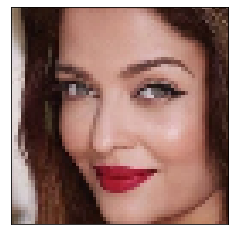

In [4]:
show(5)

  Child : Yes


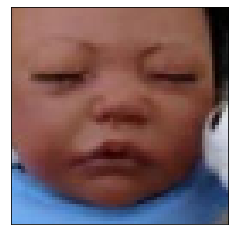

In [5]:
show(20000)

In [6]:
images_f=np.array(images)
y=np.array(childs)
X = images_f/255

[0 1]
[19870  5330]


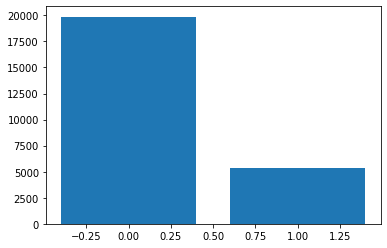

In [7]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [8]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
# reshape 4d to 2d
X_r = X.reshape(X.shape[0], -1)
os_X,os_y = sm.fit_resample(X_r,y)
# Reshape the input data back to the original 4D format
os_X = os_X.reshape(-1,64,64,3)

[0 1]
[19440 19440]


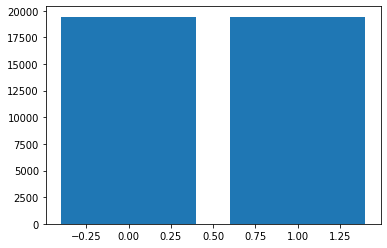

In [9]:
val,counts=np.unique(os_y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(os_X,os_y,test_size=0.25,random_state=10,stratify=os_y)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100,stratify=y)

## Building model

In [10]:
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=(64,64, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
last_output = base_model.output
num_trainable_params = sum([w.shape.num_elements() for w in base_model.trainable_weights])

print(f"There are {num_trainable_params:,} trainable parameters in this model.")
print(f"The pretrained model has type: {type(base_model)}")

9406464/9406464 [==============================] - 1s 0us/step
There are 0 trainable parameters in this model.
The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [30]:
def transfer_learning(last_output, pre_trained_model):
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.6
    x = tf.keras.layers.Dropout(0.6)(x)  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(2, activation='sigmoid')(x)          
    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)
    
    return model

model = transfer_learning(last_output, base_model)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 8, 8, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 8, 8, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 8, 8, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 8, 8, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 4, 4, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 4, 4, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 4, 4, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 4, 4, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 4, 4, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 4, 4, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 4, 4, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 4, 4, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 2, 2, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 2, 2, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 2, 2, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 2, 2, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [31]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [34]:
lr_history = model.fit(X_train,y_train,
                       epochs=60,
                       validation_data=(X_test,y_test),
                       callbacks=lr_schedule,
                       verbose=1)
#C_model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=2)

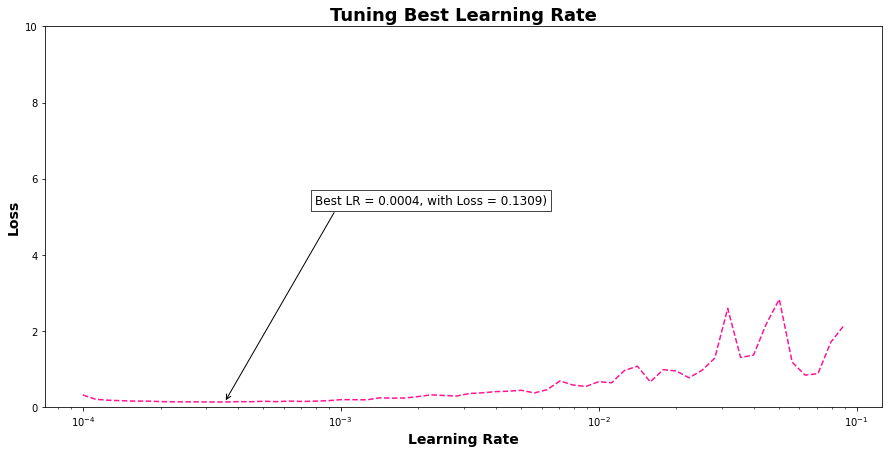

best learn rate = 0.0003548133827280253


In [35]:
def plot_best_learning(lr_history):
    x = lr_history.history["lr"] ; y = lr_history.history["loss"]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    def annot_min(x,y, ax=None):
        xmin = x[np.argmin(y)]
        ymin = np.min(y)
        text= f"Best LR = {xmin:.4f}, with Loss = {ymin:.4f})"
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmin, ymin), xytext=(0.6,0.56), fontsize=12, **kw)
        return xmin
    xmin = annot_min(x,y,ax)
    ax.semilogx(x, y,ls='dashed', color='deeppink')
    ax.set_title('Tuning Best Learning Rate',fontsize=18, fontweight='bold')
    ax.set_ylabel('Loss',fontsize=14, fontweight='bold')
    ax.set_xlabel('Learning Rate',fontsize=14, fontweight='bold')
    plt.ylim((0, 10))
    plt.show()
    return xmin
    

best_learn_rate = plot_best_learning(lr_history)
print(f"best learn rate = {best_learn_rate}")

In [36]:
model = transfer_learning(last_output, base_model)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = best_learn_rate),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
history = model.fit(X_train,y_train,
                       epochs=2,
                       validation_data=(X_test,y_test),
                       )

Epoch 1/2
591/591 [==============================] - 107s 176ms/step - loss: 0.3411 - accuracy: 0.8938 - val_loss: 0.2296 - val_accuracy: 0.9138
Epoch 2/2
591/591 [==============================] - 101s 170ms/step - loss: 0.2112 - accuracy: 0.9213 - val_loss: 0.2129 - val_accuracy: 0.9202


In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Cd_Det2.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=20,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [55]:
history = model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=100,callbacks=callback_list)

Epoch 1/100
296/296 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9362
Epoch 1: val_loss improved from inf to 0.14224, saving model to Cd_Det2.h5
296/296 [==============================] - 53s 177ms/step - loss: 0.1852 - accuracy: 0.9362 - val_loss: 0.1422 - val_accuracy: 0.9473
Epoch 2/100
296/296 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9484
Epoch 2: val_loss did not improve from 0.14224
296/296 [==============================] - 50s 169ms/step - loss: 0.1426 - accuracy: 0.9484 - val_loss: 0.1424 - val_accuracy: 0.9468
Epoch 3/100
296/296 [==============================] - ETA: 0s - loss: 0.1225 - accuracy: 0.9556
Epoch 3: val_loss improved from 0.14224 to 0.14096, saving model to Cd_Det2.h5
296/296 [==============================] - 52s 176ms/step - loss: 0.1225 - accuracy: 0.9556 - val_loss: 0.1410 - val_accuracy: 0.9481
Epoch 4/100
296/296 [==============================] - ETA: 0s - loss: 0.1110 - accuracy: 0.9598
Epoch 4: 

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

197/197 [==============================] - 14s 72ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4968
           1       0.92      0.84      0.88      1332

    accuracy                           0.95      6300
   macro avg       0.94      0.91      0.92      6300
weighted avg       0.95      0.95      0.95      6300



In [22]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="valid",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [26]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_0=Dense(64,activation='relu')(flatten)
    drop_0=Dropout(0.2)(dense_0)
    dense_1=Dense(128,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    output_1=Dense(2,activation='sigmoid')(drop_1)

    model=Model(inputs=[inputs],outputs=[output_1])
    model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model
    

In [27]:
C_model=model((64,64,3))
C_model.summary()
C_model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_25 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_20 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 64)        18496     
                                                           

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Child_Detection2.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [34]:
C_History = C_model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=50,callbacks=callback_list)

Epoch 1/50
296/296 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9493
Epoch 1: val_accuracy improved from -inf to 0.95857, saving model to Child_Detection2.h5
296/296 [==============================] - 214s 723ms/step - loss: 0.1894 - accuracy: 0.9493 - val_loss: 0.1783 - val_accuracy: 0.9586
Epoch 2/50
296/296 [==============================] - ETA: 0s - loss: 0.1653 - accuracy: 0.9590
Epoch 2: val_accuracy improved from 0.95857 to 0.96159, saving model to Child_Detection2.h5
296/296 [==============================] - 214s 722ms/step - loss: 0.1653 - accuracy: 0.9590 - val_loss: 0.1692 - val_accuracy: 0.9616
Epoch 3/50
296/296 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9627
Epoch 3: val_accuracy did not improve from 0.96159
296/296 [==============================] - 216s 728ms/step - loss: 0.1558 - accuracy: 0.9627 - val_loss: 0.1772 - val_accuracy: 0.9484
Epoch 4/50
296/296 [==============================] - ETA: 0s - loss: 0.146

Epoch 29/50
296/296 [==============================] - ETA: 0s - loss: 0.0948 - accuracy: 0.9848
Epoch 29: val_accuracy did not improve from 0.97381
296/296 [==============================] - 198s 670ms/step - loss: 0.0948 - accuracy: 0.9848 - val_loss: 0.1354 - val_accuracy: 0.9717
Epoch 30/50
296/296 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9846
Epoch 30: val_accuracy did not improve from 0.97381
296/296 [==============================] - 197s 667ms/step - loss: 0.0966 - accuracy: 0.9846 - val_loss: 0.1454 - val_accuracy: 0.9649
Epoch 31/50
296/296 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9843
Epoch 31: val_accuracy did not improve from 0.97381
296/296 [==============================] - 197s 666ms/step - loss: 0.0938 - accuracy: 0.9843 - val_loss: 0.1311 - val_accuracy: 0.9725
Epoch 32/50
296/296 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9849
Epoch 32: val_accuracy did not improve from 0.97381

In [77]:

C_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(2, activation='sigmoid')    

])
C_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
C_model.summary()
C_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 128)       

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Child_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=20,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [13]:
C_History = C_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=callback_list)

Epoch 1/50
911/912 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9724
Epoch 1: val_accuracy improved from -inf to 0.97088, saving model to Child_Detection.h5
912/912 [==============================] - 135s 148ms/step - loss: 0.0806 - accuracy: 0.9724 - val_loss: 0.0795 - val_accuracy: 0.9709
Epoch 2/50
911/912 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9774
Epoch 2: val_accuracy improved from 0.97088 to 0.98035, saving model to Child_Detection.h5
912/912 [==============================] - 114s 125ms/step - loss: 0.0666 - accuracy: 0.9774 - val_loss: 0.0560 - val_accuracy: 0.9803
Epoch 3/50
911/912 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9811
Epoch 3: val_accuracy did not improve from 0.98035
912/912 [==============================] - 121s 132ms/step - loss: 0.0553 - accuracy: 0.9811 - val_loss: 0.0658 - val_accuracy: 0.9790
Epoch 4/50
911/912 [============================>.] - ETA: 0s - loss: 0.0438 

Epoch 29/50
911/912 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9969
Epoch 29: val_accuracy improved from 0.98621 to 0.98663, saving model to Child_Detection.h5
912/912 [==============================] - 122s 133ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0799 - val_accuracy: 0.9866
Epoch 30/50
911/912 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9967
Epoch 30: val_accuracy did not improve from 0.98663
912/912 [==============================] - 123s 135ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0648 - val_accuracy: 0.9807
Epoch 31/50
911/912 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9972
Epoch 31: val_accuracy did not improve from 0.98663
912/912 [==============================] - 122s 134ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.1241 - val_accuracy: 0.9856
Epoch 32/50
911/912 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9964
Epoch 32: v

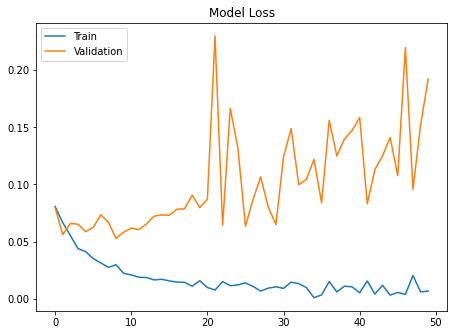

In [14]:
plt.plot(C_History.history['loss'])
plt.plot(C_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

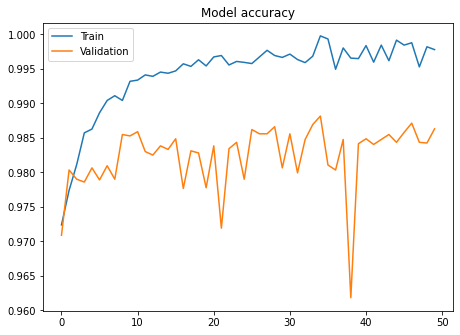

In [15]:
plt.plot(C_History.history['accuracy'])
plt.plot(C_History.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

## Testing Model

In [16]:
C_model.evaluate(X_test,y_test)

304/304 [==============================] - 17s 56ms/step - loss: 0.1922 - accuracy: 0.9863


[0.1921607404947281, 0.9863168597221375]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = C_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

304/304 [==============================] - 18s 57ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4860
           1       0.98      0.99      0.99      4860

    accuracy                           0.99      9720
   macro avg       0.99      0.99      0.99      9720
weighted avg       0.99      0.99      0.99      9720



<AxesSubplot:>

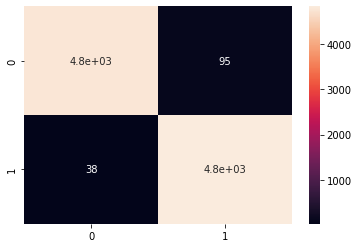

In [21]:
import seaborn as sns
results=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(results,annot=True)

In [18]:
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    bd=['No',"Yes"]
    print("    Child : ",bd[y_pred_classes[i]])
    plt.show()
    

    Child :  No


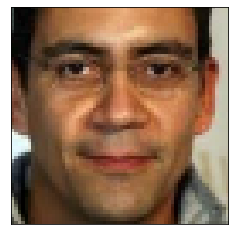

In [24]:
test_image(300)

    Child :  Yes


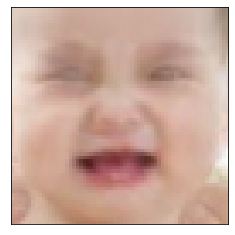

In [22]:
test_image(1)

    Child :  No


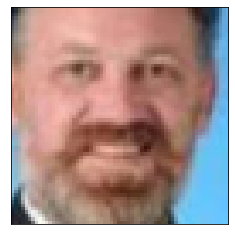

    Child :  No


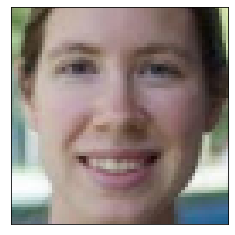

    Child :  No


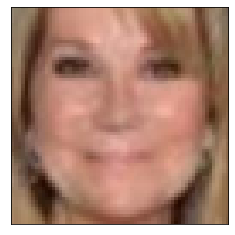

    Child :  Yes


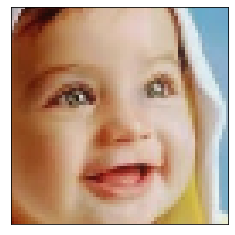

    Child :  Yes


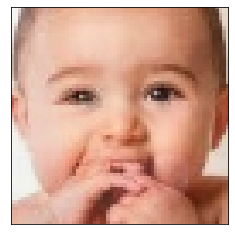

    Child :  No


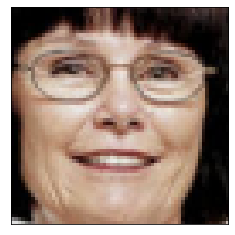

    Child :  Yes


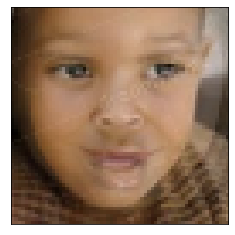

    Child :  No


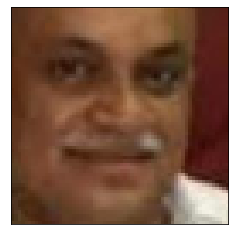

    Child :  Yes


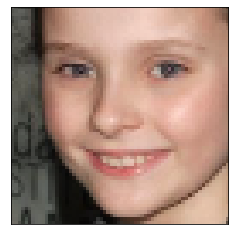

    Child :  No


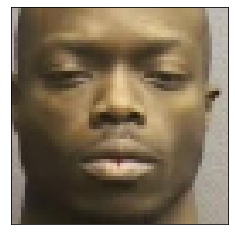

    Child :  Yes


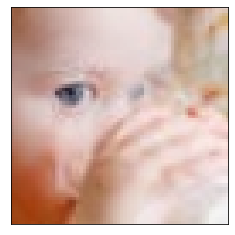

    Child :  Yes


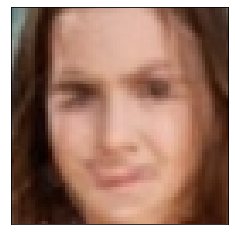

    Child :  Yes


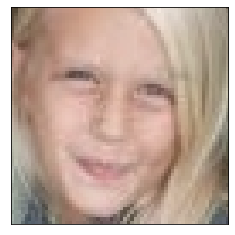

    Child :  No


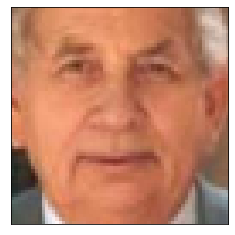

    Child :  No


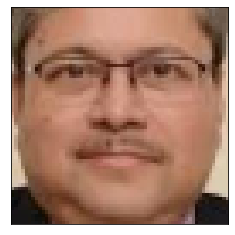

    Child :  Yes


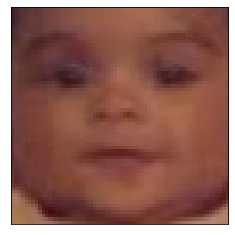

    Child :  Yes


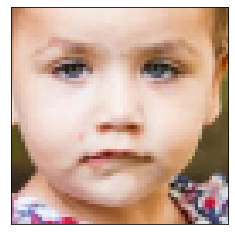

    Child :  Yes


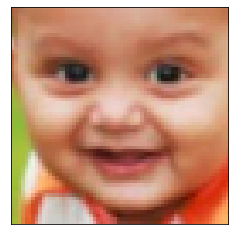

    Child :  Yes


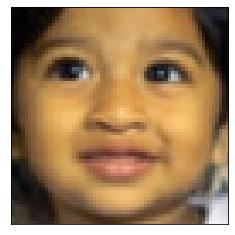

    Child :  Yes


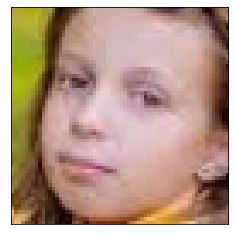

In [26]:
for i in range(80,100):
    test_image(i)

# 2.Detecting whether person is 'Bald' or not 

In [62]:
# Loading data
B_fd="./Data/Bald"
B_files=os.listdir(B_fd)
balds=[]
images=[]

for f in B_files:
  
    bald=int(f.split('_')[0])
    total=B_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    balds.append(bald)

./Data/Bald/0_Nbald (1).jpg
./Data/Bald/0_Nbald (10).jpg
./Data/Bald/0_Nbald (100).jpg
./Data/Bald/0_Nbald (1000).jpg
./Data/Bald/0_Nbald (10000).jpg
./Data/Bald/0_Nbald (10001).jpg
./Data/Bald/0_Nbald (10002).jpg
./Data/Bald/0_Nbald (10003).jpg
./Data/Bald/0_Nbald (10004).jpg
./Data/Bald/0_Nbald (10005).jpg
./Data/Bald/0_Nbald (10006).jpg
./Data/Bald/0_Nbald (10007).jpg
./Data/Bald/0_Nbald (10008).jpg
./Data/Bald/0_Nbald (10009).jpg
./Data/Bald/0_Nbald (1001).jpg
./Data/Bald/0_Nbald (10010).jpg
./Data/Bald/0_Nbald (10011).jpg
./Data/Bald/0_Nbald (10012).jpg
./Data/Bald/0_Nbald (10013).jpg
./Data/Bald/0_Nbald (10014).jpg
./Data/Bald/0_Nbald (10015).jpg
./Data/Bald/0_Nbald (10016).jpg
./Data/Bald/0_Nbald (10017).jpg
./Data/Bald/0_Nbald (10018).jpg
./Data/Bald/0_Nbald (10019).jpg
./Data/Bald/0_Nbald (1002).jpg
./Data/Bald/0_Nbald (10020).jpg
./Data/Bald/0_Nbald (10021).jpg
./Data/Bald/0_Nbald (10022).jpg
./Data/Bald/0_Nbald (10023).jpg
./Data/Bald/0_Nbald (10024).jpg
./Data/Bald/0_Nbald 

./Data/Bald/0_Nbald (10231).jpg
./Data/Bald/0_Nbald (10232).jpg
./Data/Bald/0_Nbald (10233).jpg
./Data/Bald/0_Nbald (10234).jpg
./Data/Bald/0_Nbald (10235).jpg
./Data/Bald/0_Nbald (10236).jpg
./Data/Bald/0_Nbald (10237).jpg
./Data/Bald/0_Nbald (10238).jpg
./Data/Bald/0_Nbald (10239).jpg
./Data/Bald/0_Nbald (1024).jpg
./Data/Bald/0_Nbald (10240).jpg
./Data/Bald/0_Nbald (10241).jpg
./Data/Bald/0_Nbald (10242).jpg
./Data/Bald/0_Nbald (10243).jpg
./Data/Bald/0_Nbald (10244).jpg
./Data/Bald/0_Nbald (10245).jpg
./Data/Bald/0_Nbald (10246).jpg
./Data/Bald/0_Nbald (10247).jpg
./Data/Bald/0_Nbald (10248).jpg
./Data/Bald/0_Nbald (10249).jpg
./Data/Bald/0_Nbald (1025).jpg
./Data/Bald/0_Nbald (10250).jpg
./Data/Bald/0_Nbald (10251).jpg
./Data/Bald/0_Nbald (10252).jpg
./Data/Bald/0_Nbald (10253).jpg
./Data/Bald/0_Nbald (10254).jpg
./Data/Bald/0_Nbald (10255).jpg
./Data/Bald/0_Nbald (10256).jpg
./Data/Bald/0_Nbald (10257).jpg
./Data/Bald/0_Nbald (10258).jpg
./Data/Bald/0_Nbald (10259).jpg
./Data/Bal

./Data/Bald/0_Nbald (10511).jpg
./Data/Bald/0_Nbald (10512).jpg
./Data/Bald/0_Nbald (10513).jpg
./Data/Bald/0_Nbald (10514).jpg
./Data/Bald/0_Nbald (10515).jpg
./Data/Bald/0_Nbald (10516).jpg
./Data/Bald/0_Nbald (10517).jpg
./Data/Bald/0_Nbald (10518).jpg
./Data/Bald/0_Nbald (10519).jpg
./Data/Bald/0_Nbald (1052).jpg
./Data/Bald/0_Nbald (10520).jpg
./Data/Bald/0_Nbald (10521).jpg
./Data/Bald/0_Nbald (10522).jpg
./Data/Bald/0_Nbald (10523).jpg
./Data/Bald/0_Nbald (10524).jpg
./Data/Bald/0_Nbald (10525).jpg
./Data/Bald/0_Nbald (10526).jpg
./Data/Bald/0_Nbald (10527).jpg
./Data/Bald/0_Nbald (10528).jpg
./Data/Bald/0_Nbald (10529).jpg
./Data/Bald/0_Nbald (1053).jpg
./Data/Bald/0_Nbald (10530).jpg
./Data/Bald/0_Nbald (10531).jpg
./Data/Bald/0_Nbald (10532).jpg
./Data/Bald/0_Nbald (10533).jpg
./Data/Bald/0_Nbald (10534).jpg
./Data/Bald/0_Nbald (10535).jpg
./Data/Bald/0_Nbald (10536).jpg
./Data/Bald/0_Nbald (10537).jpg
./Data/Bald/0_Nbald (10538).jpg
./Data/Bald/0_Nbald (10539).jpg
./Data/Bal

./Data/Bald/0_Nbald (10820).jpg
./Data/Bald/0_Nbald (10821).jpg
./Data/Bald/0_Nbald (10822).jpg
./Data/Bald/0_Nbald (10823).jpg
./Data/Bald/0_Nbald (10824).jpg
./Data/Bald/0_Nbald (10825).jpg
./Data/Bald/0_Nbald (10826).jpg
./Data/Bald/0_Nbald (10827).jpg
./Data/Bald/0_Nbald (10828).jpg
./Data/Bald/0_Nbald (10829).jpg
./Data/Bald/0_Nbald (1083).jpg
./Data/Bald/0_Nbald (10830).jpg
./Data/Bald/0_Nbald (10831).jpg
./Data/Bald/0_Nbald (10832).jpg
./Data/Bald/0_Nbald (10833).jpg
./Data/Bald/0_Nbald (10834).jpg
./Data/Bald/0_Nbald (10835).jpg
./Data/Bald/0_Nbald (10836).jpg
./Data/Bald/0_Nbald (10837).jpg
./Data/Bald/0_Nbald (10838).jpg
./Data/Bald/0_Nbald (10839).jpg
./Data/Bald/0_Nbald (1084).jpg
./Data/Bald/0_Nbald (10840).jpg
./Data/Bald/0_Nbald (10841).jpg
./Data/Bald/0_Nbald (10842).jpg
./Data/Bald/0_Nbald (10843).jpg
./Data/Bald/0_Nbald (10844).jpg
./Data/Bald/0_Nbald (10845).jpg
./Data/Bald/0_Nbald (10846).jpg
./Data/Bald/0_Nbald (10847).jpg
./Data/Bald/0_Nbald (10848).jpg
./Data/Bal

./Data/Bald/0_Nbald (11149).jpg
./Data/Bald/0_Nbald (1115).jpg
./Data/Bald/0_Nbald (11150).jpg
./Data/Bald/0_Nbald (11151).jpg
./Data/Bald/0_Nbald (11152).jpg
./Data/Bald/0_Nbald (11153).jpg
./Data/Bald/0_Nbald (11154).jpg
./Data/Bald/0_Nbald (11155).jpg
./Data/Bald/0_Nbald (11156).jpg
./Data/Bald/0_Nbald (11157).jpg
./Data/Bald/0_Nbald (11158).jpg
./Data/Bald/0_Nbald (11159).jpg
./Data/Bald/0_Nbald (1116).jpg
./Data/Bald/0_Nbald (11160).jpg
./Data/Bald/0_Nbald (11161).jpg
./Data/Bald/0_Nbald (11162).jpg
./Data/Bald/0_Nbald (11163).jpg
./Data/Bald/0_Nbald (11164).jpg
./Data/Bald/0_Nbald (11165).jpg
./Data/Bald/0_Nbald (11166).jpg
./Data/Bald/0_Nbald (11167).jpg
./Data/Bald/0_Nbald (11168).jpg
./Data/Bald/0_Nbald (11169).jpg
./Data/Bald/0_Nbald (1117).jpg
./Data/Bald/0_Nbald (11170).jpg
./Data/Bald/0_Nbald (11171).jpg
./Data/Bald/0_Nbald (11172).jpg
./Data/Bald/0_Nbald (11173).jpg
./Data/Bald/0_Nbald (11174).jpg
./Data/Bald/0_Nbald (11175).jpg
./Data/Bald/0_Nbald (11176).jpg
./Data/Bald

./Data/Bald/0_Nbald (11418).jpg
./Data/Bald/0_Nbald (11419).jpg
./Data/Bald/0_Nbald (1142).jpg
./Data/Bald/0_Nbald (11420).jpg
./Data/Bald/0_Nbald (11421).jpg
./Data/Bald/0_Nbald (11422).jpg
./Data/Bald/0_Nbald (11423).jpg
./Data/Bald/0_Nbald (11424).jpg
./Data/Bald/0_Nbald (11425).jpg
./Data/Bald/0_Nbald (11426).jpg
./Data/Bald/0_Nbald (11427).jpg
./Data/Bald/0_Nbald (11428).jpg
./Data/Bald/0_Nbald (11429).jpg
./Data/Bald/0_Nbald (1143).jpg
./Data/Bald/0_Nbald (11430).jpg
./Data/Bald/0_Nbald (11431).jpg
./Data/Bald/0_Nbald (11432).jpg
./Data/Bald/0_Nbald (11433).jpg
./Data/Bald/0_Nbald (11434).jpg
./Data/Bald/0_Nbald (11435).jpg
./Data/Bald/0_Nbald (11436).jpg
./Data/Bald/0_Nbald (11437).jpg
./Data/Bald/0_Nbald (11438).jpg
./Data/Bald/0_Nbald (11439).jpg
./Data/Bald/0_Nbald (1144).jpg
./Data/Bald/0_Nbald (11440).jpg
./Data/Bald/0_Nbald (11441).jpg
./Data/Bald/0_Nbald (11442).jpg
./Data/Bald/0_Nbald (11443).jpg
./Data/Bald/0_Nbald (11444).jpg
./Data/Bald/0_Nbald (11445).jpg
./Data/Bald

./Data/Bald/0_Nbald (11681).jpg
./Data/Bald/0_Nbald (11682).jpg
./Data/Bald/0_Nbald (11683).jpg
./Data/Bald/0_Nbald (11684).jpg
./Data/Bald/0_Nbald (11685).jpg
./Data/Bald/0_Nbald (11686).jpg
./Data/Bald/0_Nbald (11687).jpg
./Data/Bald/0_Nbald (11688).jpg
./Data/Bald/0_Nbald (11689).jpg
./Data/Bald/0_Nbald (1169).jpg
./Data/Bald/0_Nbald (11690).jpg
./Data/Bald/0_Nbald (11691).jpg
./Data/Bald/0_Nbald (11692).jpg
./Data/Bald/0_Nbald (11693).jpg
./Data/Bald/0_Nbald (11694).jpg
./Data/Bald/0_Nbald (11695).jpg
./Data/Bald/0_Nbald (11696).jpg
./Data/Bald/0_Nbald (11697).jpg
./Data/Bald/0_Nbald (11698).jpg
./Data/Bald/0_Nbald (11699).jpg
./Data/Bald/0_Nbald (117).jpg
./Data/Bald/0_Nbald (1170).jpg
./Data/Bald/0_Nbald (11700).jpg
./Data/Bald/0_Nbald (11701).jpg
./Data/Bald/0_Nbald (11702).jpg
./Data/Bald/0_Nbald (11703).jpg
./Data/Bald/0_Nbald (11704).jpg
./Data/Bald/0_Nbald (11705).jpg
./Data/Bald/0_Nbald (11706).jpg
./Data/Bald/0_Nbald (11707).jpg
./Data/Bald/0_Nbald (11708).jpg
./Data/Bald/

./Data/Bald/0_Nbald (12009).jpg
./Data/Bald/0_Nbald (1201).jpg
./Data/Bald/0_Nbald (12010).jpg
./Data/Bald/0_Nbald (12011).jpg
./Data/Bald/0_Nbald (12012).jpg
./Data/Bald/0_Nbald (12013).jpg
./Data/Bald/0_Nbald (12014).jpg
./Data/Bald/0_Nbald (12015).jpg
./Data/Bald/0_Nbald (12016).jpg
./Data/Bald/0_Nbald (12017).jpg
./Data/Bald/0_Nbald (12018).jpg
./Data/Bald/0_Nbald (12019).jpg
./Data/Bald/0_Nbald (1202).jpg
./Data/Bald/0_Nbald (12020).jpg
./Data/Bald/0_Nbald (12021).jpg
./Data/Bald/0_Nbald (12022).jpg
./Data/Bald/0_Nbald (12023).jpg
./Data/Bald/0_Nbald (12024).jpg
./Data/Bald/0_Nbald (12025).jpg
./Data/Bald/0_Nbald (12026).jpg
./Data/Bald/0_Nbald (12027).jpg
./Data/Bald/0_Nbald (12028).jpg
./Data/Bald/0_Nbald (12029).jpg
./Data/Bald/0_Nbald (1203).jpg
./Data/Bald/0_Nbald (12030).jpg
./Data/Bald/0_Nbald (12031).jpg
./Data/Bald/0_Nbald (12032).jpg
./Data/Bald/0_Nbald (12033).jpg
./Data/Bald/0_Nbald (12034).jpg
./Data/Bald/0_Nbald (12035).jpg
./Data/Bald/0_Nbald (12036).jpg
./Data/Bald

./Data/Bald/0_Nbald (12406).jpg
./Data/Bald/0_Nbald (12407).jpg
./Data/Bald/0_Nbald (12408).jpg
./Data/Bald/0_Nbald (12409).jpg
./Data/Bald/0_Nbald (1241).jpg
./Data/Bald/0_Nbald (12410).jpg
./Data/Bald/0_Nbald (12411).jpg
./Data/Bald/0_Nbald (12412).jpg
./Data/Bald/0_Nbald (12413).jpg
./Data/Bald/0_Nbald (12414).jpg
./Data/Bald/0_Nbald (12415).jpg
./Data/Bald/0_Nbald (12416).jpg
./Data/Bald/0_Nbald (12417).jpg
./Data/Bald/0_Nbald (12418).jpg
./Data/Bald/0_Nbald (12419).jpg
./Data/Bald/0_Nbald (1242).jpg
./Data/Bald/0_Nbald (12420).jpg
./Data/Bald/0_Nbald (12421).jpg
./Data/Bald/0_Nbald (12422).jpg
./Data/Bald/0_Nbald (12423).jpg
./Data/Bald/0_Nbald (12424).jpg
./Data/Bald/0_Nbald (12425).jpg
./Data/Bald/0_Nbald (12426).jpg
./Data/Bald/0_Nbald (12427).jpg
./Data/Bald/0_Nbald (12428).jpg
./Data/Bald/0_Nbald (12429).jpg
./Data/Bald/0_Nbald (1243).jpg
./Data/Bald/0_Nbald (12430).jpg
./Data/Bald/0_Nbald (12431).jpg
./Data/Bald/0_Nbald (12432).jpg
./Data/Bald/0_Nbald (12433).jpg
./Data/Bald

./Data/Bald/0_Nbald (12778).jpg
./Data/Bald/0_Nbald (12779).jpg
./Data/Bald/0_Nbald (1278).jpg
./Data/Bald/0_Nbald (12780).jpg
./Data/Bald/0_Nbald (12781).jpg
./Data/Bald/0_Nbald (12782).jpg
./Data/Bald/0_Nbald (12783).jpg
./Data/Bald/0_Nbald (12784).jpg
./Data/Bald/0_Nbald (12785).jpg
./Data/Bald/0_Nbald (12786).jpg
./Data/Bald/0_Nbald (12787).jpg
./Data/Bald/0_Nbald (12788).jpg
./Data/Bald/0_Nbald (12789).jpg
./Data/Bald/0_Nbald (1279).jpg
./Data/Bald/0_Nbald (12790).jpg
./Data/Bald/0_Nbald (12791).jpg
./Data/Bald/0_Nbald (12792).jpg
./Data/Bald/0_Nbald (12793).jpg
./Data/Bald/0_Nbald (12794).jpg
./Data/Bald/0_Nbald (12795).jpg
./Data/Bald/0_Nbald (12796).jpg
./Data/Bald/0_Nbald (12797).jpg
./Data/Bald/0_Nbald (12798).jpg
./Data/Bald/0_Nbald (12799).jpg
./Data/Bald/0_Nbald (128).jpg
./Data/Bald/0_Nbald (1280).jpg
./Data/Bald/0_Nbald (12800).jpg
./Data/Bald/0_Nbald (12801).jpg
./Data/Bald/0_Nbald (12802).jpg
./Data/Bald/0_Nbald (12803).jpg
./Data/Bald/0_Nbald (12804).jpg
./Data/Bald/0

./Data/Bald/0_Nbald (13104).jpg
./Data/Bald/0_Nbald (13105).jpg
./Data/Bald/0_Nbald (13106).jpg
./Data/Bald/0_Nbald (13107).jpg
./Data/Bald/0_Nbald (13108).jpg
./Data/Bald/0_Nbald (13109).jpg
./Data/Bald/0_Nbald (1311).jpg
./Data/Bald/0_Nbald (13110).jpg
./Data/Bald/0_Nbald (13111).jpg
./Data/Bald/0_Nbald (13112).jpg
./Data/Bald/0_Nbald (13113).jpg
./Data/Bald/0_Nbald (13114).jpg
./Data/Bald/0_Nbald (13115).jpg
./Data/Bald/0_Nbald (13116).jpg
./Data/Bald/0_Nbald (13117).jpg
./Data/Bald/0_Nbald (13118).jpg
./Data/Bald/0_Nbald (13119).jpg
./Data/Bald/0_Nbald (1312).jpg
./Data/Bald/0_Nbald (13120).jpg
./Data/Bald/0_Nbald (13121).jpg
./Data/Bald/0_Nbald (13122).jpg
./Data/Bald/0_Nbald (13123).jpg
./Data/Bald/0_Nbald (13124).jpg
./Data/Bald/0_Nbald (13125).jpg
./Data/Bald/0_Nbald (13126).jpg
./Data/Bald/0_Nbald (13127).jpg
./Data/Bald/0_Nbald (13128).jpg
./Data/Bald/0_Nbald (13129).jpg
./Data/Bald/0_Nbald (1313).jpg
./Data/Bald/0_Nbald (13130).jpg
./Data/Bald/0_Nbald (13131).jpg
./Data/Bald

./Data/Bald/0_Nbald (13431).jpg
./Data/Bald/0_Nbald (13432).jpg
./Data/Bald/0_Nbald (13433).jpg
./Data/Bald/0_Nbald (13434).jpg
./Data/Bald/0_Nbald (13435).jpg
./Data/Bald/0_Nbald (13436).jpg
./Data/Bald/0_Nbald (13437).jpg
./Data/Bald/0_Nbald (13438).jpg
./Data/Bald/0_Nbald (13439).jpg
./Data/Bald/0_Nbald (1344).jpg
./Data/Bald/0_Nbald (13440).jpg
./Data/Bald/0_Nbald (13441).jpg
./Data/Bald/0_Nbald (13442).jpg
./Data/Bald/0_Nbald (13443).jpg
./Data/Bald/0_Nbald (13444).jpg
./Data/Bald/0_Nbald (13445).jpg
./Data/Bald/0_Nbald (13446).jpg
./Data/Bald/0_Nbald (13447).jpg
./Data/Bald/0_Nbald (13448).jpg
./Data/Bald/0_Nbald (13449).jpg
./Data/Bald/0_Nbald (1345).jpg
./Data/Bald/0_Nbald (13450).jpg
./Data/Bald/0_Nbald (13451).jpg
./Data/Bald/0_Nbald (13452).jpg
./Data/Bald/0_Nbald (13453).jpg
./Data/Bald/0_Nbald (13454).jpg
./Data/Bald/0_Nbald (13455).jpg
./Data/Bald/0_Nbald (13456).jpg
./Data/Bald/0_Nbald (13457).jpg
./Data/Bald/0_Nbald (13458).jpg
./Data/Bald/0_Nbald (13459).jpg
./Data/Bal

./Data/Bald/0_Nbald (13778).jpg
./Data/Bald/0_Nbald (13779).jpg
./Data/Bald/0_Nbald (1378).jpg
./Data/Bald/0_Nbald (13780).jpg
./Data/Bald/0_Nbald (13781).jpg
./Data/Bald/0_Nbald (13782).jpg
./Data/Bald/0_Nbald (13783).jpg
./Data/Bald/0_Nbald (13784).jpg
./Data/Bald/0_Nbald (13785).jpg
./Data/Bald/0_Nbald (13786).jpg
./Data/Bald/0_Nbald (13787).jpg
./Data/Bald/0_Nbald (13788).jpg
./Data/Bald/0_Nbald (13789).jpg
./Data/Bald/0_Nbald (1379).jpg
./Data/Bald/0_Nbald (13790).jpg
./Data/Bald/0_Nbald (13791).jpg
./Data/Bald/0_Nbald (13792).jpg
./Data/Bald/0_Nbald (13793).jpg
./Data/Bald/0_Nbald (13794).jpg
./Data/Bald/0_Nbald (13795).jpg
./Data/Bald/0_Nbald (13796).jpg
./Data/Bald/0_Nbald (13797).jpg
./Data/Bald/0_Nbald (13798).jpg
./Data/Bald/0_Nbald (13799).jpg
./Data/Bald/0_Nbald (138).jpg
./Data/Bald/0_Nbald (1380).jpg
./Data/Bald/0_Nbald (13800).jpg
./Data/Bald/0_Nbald (13801).jpg
./Data/Bald/0_Nbald (13802).jpg
./Data/Bald/0_Nbald (13803).jpg
./Data/Bald/0_Nbald (13804).jpg
./Data/Bald/0

./Data/Bald/0_Nbald (14149).jpg
./Data/Bald/0_Nbald (1415).jpg
./Data/Bald/0_Nbald (14150).jpg
./Data/Bald/0_Nbald (14151).jpg
./Data/Bald/0_Nbald (14152).jpg
./Data/Bald/0_Nbald (14153).jpg
./Data/Bald/0_Nbald (14154).jpg
./Data/Bald/0_Nbald (14155).jpg
./Data/Bald/0_Nbald (14156).jpg
./Data/Bald/0_Nbald (14157).jpg
./Data/Bald/0_Nbald (14158).jpg
./Data/Bald/0_Nbald (14159).jpg
./Data/Bald/0_Nbald (1416).jpg
./Data/Bald/0_Nbald (14160).jpg
./Data/Bald/0_Nbald (14161).jpg
./Data/Bald/0_Nbald (14162).jpg
./Data/Bald/0_Nbald (14163).jpg
./Data/Bald/0_Nbald (14164).jpg
./Data/Bald/0_Nbald (14165).jpg
./Data/Bald/0_Nbald (14166).jpg
./Data/Bald/0_Nbald (14167).jpg
./Data/Bald/0_Nbald (14168).jpg
./Data/Bald/0_Nbald (14169).jpg
./Data/Bald/0_Nbald (1417).jpg
./Data/Bald/0_Nbald (14170).jpg
./Data/Bald/0_Nbald (14171).jpg
./Data/Bald/0_Nbald (14172).jpg
./Data/Bald/0_Nbald (14173).jpg
./Data/Bald/0_Nbald (14174).jpg
./Data/Bald/0_Nbald (14175).jpg
./Data/Bald/0_Nbald (14176).jpg
./Data/Bald

./Data/Bald/0_Nbald (14436).jpg
./Data/Bald/0_Nbald (14437).jpg
./Data/Bald/0_Nbald (14438).jpg
./Data/Bald/0_Nbald (14439).jpg
./Data/Bald/0_Nbald (1444).jpg
./Data/Bald/0_Nbald (14440).jpg
./Data/Bald/0_Nbald (14441).jpg
./Data/Bald/0_Nbald (14442).jpg
./Data/Bald/0_Nbald (14443).jpg
./Data/Bald/0_Nbald (14444).jpg
./Data/Bald/0_Nbald (14445).jpg
./Data/Bald/0_Nbald (14446).jpg
./Data/Bald/0_Nbald (14447).jpg
./Data/Bald/0_Nbald (14448).jpg
./Data/Bald/0_Nbald (14449).jpg
./Data/Bald/0_Nbald (1445).jpg
./Data/Bald/0_Nbald (14450).jpg
./Data/Bald/0_Nbald (14451).jpg
./Data/Bald/0_Nbald (14452).jpg
./Data/Bald/0_Nbald (14453).jpg
./Data/Bald/0_Nbald (14454).jpg
./Data/Bald/0_Nbald (14455).jpg
./Data/Bald/0_Nbald (14456).jpg
./Data/Bald/0_Nbald (14457).jpg
./Data/Bald/0_Nbald (14458).jpg
./Data/Bald/0_Nbald (14459).jpg
./Data/Bald/0_Nbald (1446).jpg
./Data/Bald/0_Nbald (14460).jpg
./Data/Bald/0_Nbald (14461).jpg
./Data/Bald/0_Nbald (14462).jpg
./Data/Bald/0_Nbald (14463).jpg
./Data/Bald

./Data/Bald/0_Nbald (14690).jpg
./Data/Bald/0_Nbald (14691).jpg
./Data/Bald/0_Nbald (14692).jpg
./Data/Bald/0_Nbald (14693).jpg
./Data/Bald/0_Nbald (14694).jpg
./Data/Bald/0_Nbald (14695).jpg
./Data/Bald/0_Nbald (14696).jpg
./Data/Bald/0_Nbald (14697).jpg
./Data/Bald/0_Nbald (14698).jpg
./Data/Bald/0_Nbald (14699).jpg
./Data/Bald/0_Nbald (147).jpg
./Data/Bald/0_Nbald (1470).jpg
./Data/Bald/0_Nbald (14700).jpg
./Data/Bald/0_Nbald (14701).jpg
./Data/Bald/0_Nbald (14702).jpg
./Data/Bald/0_Nbald (14703).jpg
./Data/Bald/0_Nbald (14704).jpg
./Data/Bald/0_Nbald (14705).jpg
./Data/Bald/0_Nbald (14706).jpg
./Data/Bald/0_Nbald (14707).jpg
./Data/Bald/0_Nbald (14708).jpg
./Data/Bald/0_Nbald (14709).jpg
./Data/Bald/0_Nbald (1471).jpg
./Data/Bald/0_Nbald (14710).jpg
./Data/Bald/0_Nbald (14711).jpg
./Data/Bald/0_Nbald (14712).jpg
./Data/Bald/0_Nbald (14713).jpg
./Data/Bald/0_Nbald (14714).jpg
./Data/Bald/0_Nbald (14715).jpg
./Data/Bald/0_Nbald (14716).jpg
./Data/Bald/0_Nbald (14717).jpg
./Data/Bald/

./Data/Bald/0_Nbald (14940).jpg
./Data/Bald/0_Nbald (14941).jpg
./Data/Bald/0_Nbald (14942).jpg
./Data/Bald/0_Nbald (14943).jpg
./Data/Bald/0_Nbald (14944).jpg
./Data/Bald/0_Nbald (14945).jpg
./Data/Bald/0_Nbald (14946).jpg
./Data/Bald/0_Nbald (14947).jpg
./Data/Bald/0_Nbald (14948).jpg
./Data/Bald/0_Nbald (14949).jpg
./Data/Bald/0_Nbald (1495).jpg
./Data/Bald/0_Nbald (14950).jpg
./Data/Bald/0_Nbald (14951).jpg
./Data/Bald/0_Nbald (14952).jpg
./Data/Bald/0_Nbald (14953).jpg
./Data/Bald/0_Nbald (14954).jpg
./Data/Bald/0_Nbald (14955).jpg
./Data/Bald/0_Nbald (14956).jpg
./Data/Bald/0_Nbald (14957).jpg
./Data/Bald/0_Nbald (14958).jpg
./Data/Bald/0_Nbald (14959).jpg
./Data/Bald/0_Nbald (1496).jpg
./Data/Bald/0_Nbald (14960).jpg
./Data/Bald/0_Nbald (14961).jpg
./Data/Bald/0_Nbald (14962).jpg
./Data/Bald/0_Nbald (14963).jpg
./Data/Bald/0_Nbald (14964).jpg
./Data/Bald/0_Nbald (14965).jpg
./Data/Bald/0_Nbald (14966).jpg
./Data/Bald/0_Nbald (14967).jpg
./Data/Bald/0_Nbald (14968).jpg
./Data/Bal

./Data/Bald/0_Nbald (15340).jpg
./Data/Bald/0_Nbald (15341).jpg
./Data/Bald/0_Nbald (15342).jpg
./Data/Bald/0_Nbald (15343).jpg
./Data/Bald/0_Nbald (15344).jpg
./Data/Bald/0_Nbald (15345).jpg
./Data/Bald/0_Nbald (15346).jpg
./Data/Bald/0_Nbald (15347).jpg
./Data/Bald/0_Nbald (15348).jpg
./Data/Bald/0_Nbald (15349).jpg
./Data/Bald/0_Nbald (1535).jpg
./Data/Bald/0_Nbald (15350).jpg
./Data/Bald/0_Nbald (15351).jpg
./Data/Bald/0_Nbald (15352).jpg
./Data/Bald/0_Nbald (15353).jpg
./Data/Bald/0_Nbald (15354).jpg
./Data/Bald/0_Nbald (15355).jpg
./Data/Bald/0_Nbald (15356).jpg
./Data/Bald/0_Nbald (15357).jpg
./Data/Bald/0_Nbald (15358).jpg
./Data/Bald/0_Nbald (15359).jpg
./Data/Bald/0_Nbald (1536).jpg
./Data/Bald/0_Nbald (15360).jpg
./Data/Bald/0_Nbald (15361).jpg
./Data/Bald/0_Nbald (15362).jpg
./Data/Bald/0_Nbald (15363).jpg
./Data/Bald/0_Nbald (15364).jpg
./Data/Bald/0_Nbald (15365).jpg
./Data/Bald/0_Nbald (15366).jpg
./Data/Bald/0_Nbald (15367).jpg
./Data/Bald/0_Nbald (15368).jpg
./Data/Bal

./Data/Bald/0_Nbald (15677).jpg
./Data/Bald/0_Nbald (15678).jpg
./Data/Bald/0_Nbald (15679).jpg
./Data/Bald/0_Nbald (1568).jpg
./Data/Bald/0_Nbald (15680).jpg
./Data/Bald/0_Nbald (15681).jpg
./Data/Bald/0_Nbald (15682).jpg
./Data/Bald/0_Nbald (15683).jpg
./Data/Bald/0_Nbald (15684).jpg
./Data/Bald/0_Nbald (15685).jpg
./Data/Bald/0_Nbald (15686).jpg
./Data/Bald/0_Nbald (15687).jpg
./Data/Bald/0_Nbald (15688).jpg
./Data/Bald/0_Nbald (15689).jpg
./Data/Bald/0_Nbald (1569).jpg
./Data/Bald/0_Nbald (15690).jpg
./Data/Bald/0_Nbald (15691).jpg
./Data/Bald/0_Nbald (15692).jpg
./Data/Bald/0_Nbald (15693).jpg
./Data/Bald/0_Nbald (15694).jpg
./Data/Bald/0_Nbald (15695).jpg
./Data/Bald/0_Nbald (15696).jpg
./Data/Bald/0_Nbald (15697).jpg
./Data/Bald/0_Nbald (15698).jpg
./Data/Bald/0_Nbald (15699).jpg
./Data/Bald/0_Nbald (157).jpg
./Data/Bald/0_Nbald (1570).jpg
./Data/Bald/0_Nbald (15700).jpg
./Data/Bald/0_Nbald (15701).jpg
./Data/Bald/0_Nbald (15702).jpg
./Data/Bald/0_Nbald (15703).jpg
./Data/Bald/0

./Data/Bald/0_Nbald (16008).jpg
./Data/Bald/0_Nbald (16009).jpg
./Data/Bald/0_Nbald (1601).jpg
./Data/Bald/0_Nbald (16010).jpg
./Data/Bald/0_Nbald (16011).jpg
./Data/Bald/0_Nbald (16012).jpg
./Data/Bald/0_Nbald (16013).jpg
./Data/Bald/0_Nbald (16014).jpg
./Data/Bald/0_Nbald (16015).jpg
./Data/Bald/0_Nbald (16016).jpg
./Data/Bald/0_Nbald (16017).jpg
./Data/Bald/0_Nbald (16018).jpg
./Data/Bald/0_Nbald (16019).jpg
./Data/Bald/0_Nbald (1602).jpg
./Data/Bald/0_Nbald (16020).jpg
./Data/Bald/0_Nbald (16021).jpg
./Data/Bald/0_Nbald (16022).jpg
./Data/Bald/0_Nbald (16023).jpg
./Data/Bald/0_Nbald (16024).jpg
./Data/Bald/0_Nbald (16025).jpg
./Data/Bald/0_Nbald (16026).jpg
./Data/Bald/0_Nbald (16027).jpg
./Data/Bald/0_Nbald (16028).jpg
./Data/Bald/0_Nbald (16029).jpg
./Data/Bald/0_Nbald (1603).jpg
./Data/Bald/0_Nbald (16030).jpg
./Data/Bald/0_Nbald (16031).jpg
./Data/Bald/0_Nbald (16032).jpg
./Data/Bald/0_Nbald (16033).jpg
./Data/Bald/0_Nbald (16034).jpg
./Data/Bald/0_Nbald (16035).jpg
./Data/Bald

./Data/Bald/0_Nbald (16396).jpg
./Data/Bald/0_Nbald (16397).jpg
./Data/Bald/0_Nbald (16398).jpg
./Data/Bald/0_Nbald (16399).jpg
./Data/Bald/0_Nbald (164).jpg
./Data/Bald/0_Nbald (1640).jpg
./Data/Bald/0_Nbald (16400).jpg
./Data/Bald/0_Nbald (16401).jpg
./Data/Bald/0_Nbald (16402).jpg
./Data/Bald/0_Nbald (16403).jpg
./Data/Bald/0_Nbald (16404).jpg
./Data/Bald/0_Nbald (16405).jpg
./Data/Bald/0_Nbald (16406).jpg
./Data/Bald/0_Nbald (16407).jpg
./Data/Bald/0_Nbald (16408).jpg
./Data/Bald/0_Nbald (16409).jpg
./Data/Bald/0_Nbald (1641).jpg
./Data/Bald/0_Nbald (16410).jpg
./Data/Bald/0_Nbald (16411).jpg
./Data/Bald/0_Nbald (16412).jpg
./Data/Bald/0_Nbald (16413).jpg
./Data/Bald/0_Nbald (16414).jpg
./Data/Bald/0_Nbald (16415).jpg
./Data/Bald/0_Nbald (16416).jpg
./Data/Bald/0_Nbald (16417).jpg
./Data/Bald/0_Nbald (16418).jpg
./Data/Bald/0_Nbald (16419).jpg
./Data/Bald/0_Nbald (1642).jpg
./Data/Bald/0_Nbald (16420).jpg
./Data/Bald/0_Nbald (16421).jpg
./Data/Bald/0_Nbald (16422).jpg
./Data/Bald/0

./Data/Bald/0_Nbald (16669).jpg
./Data/Bald/0_Nbald (1667).jpg
./Data/Bald/0_Nbald (16670).jpg
./Data/Bald/0_Nbald (16671).jpg
./Data/Bald/0_Nbald (16672).jpg
./Data/Bald/0_Nbald (16673).jpg
./Data/Bald/0_Nbald (16674).jpg
./Data/Bald/0_Nbald (16675).jpg
./Data/Bald/0_Nbald (16676).jpg
./Data/Bald/0_Nbald (16677).jpg
./Data/Bald/0_Nbald (16678).jpg
./Data/Bald/0_Nbald (16679).jpg
./Data/Bald/0_Nbald (1668).jpg
./Data/Bald/0_Nbald (16680).jpg
./Data/Bald/0_Nbald (16681).jpg
./Data/Bald/0_Nbald (16682).jpg
./Data/Bald/0_Nbald (16683).jpg
./Data/Bald/0_Nbald (16684).jpg
./Data/Bald/0_Nbald (16685).jpg
./Data/Bald/0_Nbald (16686).jpg
./Data/Bald/0_Nbald (16687).jpg
./Data/Bald/0_Nbald (16688).jpg
./Data/Bald/0_Nbald (16689).jpg
./Data/Bald/0_Nbald (1669).jpg
./Data/Bald/0_Nbald (16690).jpg
./Data/Bald/0_Nbald (16691).jpg
./Data/Bald/0_Nbald (16692).jpg
./Data/Bald/0_Nbald (16693).jpg
./Data/Bald/0_Nbald (16694).jpg
./Data/Bald/0_Nbald (16695).jpg
./Data/Bald/0_Nbald (16696).jpg
./Data/Bald

./Data/Bald/0_Nbald (17005).jpg
./Data/Bald/0_Nbald (17006).jpg
./Data/Bald/0_Nbald (17007).jpg
./Data/Bald/0_Nbald (17008).jpg
./Data/Bald/0_Nbald (17009).jpg
./Data/Bald/0_Nbald (1701).jpg
./Data/Bald/0_Nbald (17010).jpg
./Data/Bald/0_Nbald (17011).jpg
./Data/Bald/0_Nbald (17012).jpg
./Data/Bald/0_Nbald (17013).jpg
./Data/Bald/0_Nbald (17014).jpg
./Data/Bald/0_Nbald (17015).jpg
./Data/Bald/0_Nbald (17016).jpg
./Data/Bald/0_Nbald (17017).jpg
./Data/Bald/0_Nbald (17018).jpg
./Data/Bald/0_Nbald (17019).jpg
./Data/Bald/0_Nbald (1702).jpg
./Data/Bald/0_Nbald (17020).jpg
./Data/Bald/0_Nbald (17021).jpg
./Data/Bald/0_Nbald (17022).jpg
./Data/Bald/0_Nbald (17023).jpg
./Data/Bald/0_Nbald (17024).jpg
./Data/Bald/0_Nbald (17025).jpg
./Data/Bald/0_Nbald (17026).jpg
./Data/Bald/0_Nbald (17027).jpg
./Data/Bald/0_Nbald (17028).jpg
./Data/Bald/0_Nbald (17029).jpg
./Data/Bald/0_Nbald (1703).jpg
./Data/Bald/0_Nbald (17030).jpg
./Data/Bald/0_Nbald (17031).jpg
./Data/Bald/0_Nbald (17032).jpg
./Data/Bald

./Data/Bald/0_Nbald (17356).jpg
./Data/Bald/0_Nbald (17357).jpg
./Data/Bald/0_Nbald (17358).jpg
./Data/Bald/0_Nbald (17359).jpg
./Data/Bald/0_Nbald (1736).jpg
./Data/Bald/0_Nbald (17360).jpg
./Data/Bald/0_Nbald (17361).jpg
./Data/Bald/0_Nbald (17362).jpg
./Data/Bald/0_Nbald (17363).jpg
./Data/Bald/0_Nbald (17364).jpg
./Data/Bald/0_Nbald (17365).jpg
./Data/Bald/0_Nbald (17366).jpg
./Data/Bald/0_Nbald (17367).jpg
./Data/Bald/0_Nbald (17368).jpg
./Data/Bald/0_Nbald (17369).jpg
./Data/Bald/0_Nbald (1737).jpg
./Data/Bald/0_Nbald (17370).jpg
./Data/Bald/0_Nbald (17371).jpg
./Data/Bald/0_Nbald (17372).jpg
./Data/Bald/0_Nbald (17373).jpg
./Data/Bald/0_Nbald (17374).jpg
./Data/Bald/0_Nbald (17375).jpg
./Data/Bald/0_Nbald (17376).jpg
./Data/Bald/0_Nbald (17377).jpg
./Data/Bald/0_Nbald (17378).jpg
./Data/Bald/0_Nbald (17379).jpg
./Data/Bald/0_Nbald (1738).jpg
./Data/Bald/0_Nbald (17380).jpg
./Data/Bald/0_Nbald (17381).jpg
./Data/Bald/0_Nbald (17382).jpg
./Data/Bald/0_Nbald (17383).jpg
./Data/Bald

./Data/Bald/0_Nbald (17717).jpg
./Data/Bald/0_Nbald (17718).jpg
./Data/Bald/0_Nbald (17719).jpg
./Data/Bald/0_Nbald (1772).jpg
./Data/Bald/0_Nbald (17720).jpg
./Data/Bald/0_Nbald (17721).jpg
./Data/Bald/0_Nbald (17722).jpg
./Data/Bald/0_Nbald (17723).jpg
./Data/Bald/0_Nbald (17724).jpg
./Data/Bald/0_Nbald (17725).jpg
./Data/Bald/0_Nbald (17726).jpg
./Data/Bald/0_Nbald (17727).jpg
./Data/Bald/0_Nbald (17728).jpg
./Data/Bald/0_Nbald (17729).jpg
./Data/Bald/0_Nbald (1773).jpg
./Data/Bald/0_Nbald (17730).jpg
./Data/Bald/0_Nbald (17731).jpg
./Data/Bald/0_Nbald (17732).jpg
./Data/Bald/0_Nbald (17733).jpg
./Data/Bald/0_Nbald (17734).jpg
./Data/Bald/0_Nbald (17735).jpg
./Data/Bald/0_Nbald (17736).jpg
./Data/Bald/0_Nbald (17737).jpg
./Data/Bald/0_Nbald (17738).jpg
./Data/Bald/0_Nbald (17739).jpg
./Data/Bald/0_Nbald (1774).jpg
./Data/Bald/0_Nbald (17740).jpg
./Data/Bald/0_Nbald (17741).jpg
./Data/Bald/0_Nbald (17742).jpg
./Data/Bald/0_Nbald (17743).jpg
./Data/Bald/0_Nbald (17744).jpg
./Data/Bald

./Data/Bald/0_Nbald (18144).jpg
./Data/Bald/0_Nbald (18145).jpg
./Data/Bald/0_Nbald (18146).jpg
./Data/Bald/0_Nbald (18147).jpg
./Data/Bald/0_Nbald (18148).jpg
./Data/Bald/0_Nbald (18149).jpg
./Data/Bald/0_Nbald (1815).jpg
./Data/Bald/0_Nbald (18150).jpg
./Data/Bald/0_Nbald (18151).jpg
./Data/Bald/0_Nbald (18152).jpg
./Data/Bald/0_Nbald (18153).jpg
./Data/Bald/0_Nbald (18154).jpg
./Data/Bald/0_Nbald (18155).jpg
./Data/Bald/0_Nbald (18156).jpg
./Data/Bald/0_Nbald (18157).jpg
./Data/Bald/0_Nbald (18158).jpg
./Data/Bald/0_Nbald (18159).jpg
./Data/Bald/0_Nbald (1816).jpg
./Data/Bald/0_Nbald (18160).jpg
./Data/Bald/0_Nbald (18161).jpg
./Data/Bald/0_Nbald (18162).jpg
./Data/Bald/0_Nbald (18163).jpg
./Data/Bald/0_Nbald (18164).jpg
./Data/Bald/0_Nbald (18165).jpg
./Data/Bald/0_Nbald (18166).jpg
./Data/Bald/0_Nbald (18167).jpg
./Data/Bald/0_Nbald (18168).jpg
./Data/Bald/0_Nbald (18169).jpg
./Data/Bald/0_Nbald (1817).jpg
./Data/Bald/0_Nbald (18170).jpg
./Data/Bald/0_Nbald (18171).jpg
./Data/Bald

./Data/Bald/0_Nbald (18470).jpg
./Data/Bald/0_Nbald (18471).jpg
./Data/Bald/0_Nbald (18472).jpg
./Data/Bald/0_Nbald (18473).jpg
./Data/Bald/0_Nbald (18474).jpg
./Data/Bald/0_Nbald (18475).jpg
./Data/Bald/0_Nbald (18476).jpg
./Data/Bald/0_Nbald (18477).jpg
./Data/Bald/0_Nbald (18478).jpg
./Data/Bald/0_Nbald (18479).jpg
./Data/Bald/0_Nbald (1848).jpg
./Data/Bald/0_Nbald (18480).jpg
./Data/Bald/0_Nbald (18481).jpg
./Data/Bald/0_Nbald (18482).jpg
./Data/Bald/0_Nbald (18483).jpg
./Data/Bald/0_Nbald (18484).jpg
./Data/Bald/0_Nbald (18485).jpg
./Data/Bald/0_Nbald (18486).jpg
./Data/Bald/0_Nbald (18487).jpg
./Data/Bald/0_Nbald (18488).jpg
./Data/Bald/0_Nbald (18489).jpg
./Data/Bald/0_Nbald (1849).jpg
./Data/Bald/0_Nbald (18490).jpg
./Data/Bald/0_Nbald (18491).jpg
./Data/Bald/0_Nbald (18492).jpg
./Data/Bald/0_Nbald (18493).jpg
./Data/Bald/0_Nbald (18494).jpg
./Data/Bald/0_Nbald (18495).jpg
./Data/Bald/0_Nbald (18496).jpg
./Data/Bald/0_Nbald (18497).jpg
./Data/Bald/0_Nbald (18498).jpg
./Data/Bal

./Data/Bald/0_Nbald (18767).jpg
./Data/Bald/0_Nbald (18768).jpg
./Data/Bald/0_Nbald (18769).jpg
./Data/Bald/0_Nbald (1877).jpg
./Data/Bald/0_Nbald (18770).jpg
./Data/Bald/0_Nbald (18771).jpg
./Data/Bald/0_Nbald (18772).jpg
./Data/Bald/0_Nbald (18773).jpg
./Data/Bald/0_Nbald (18774).jpg
./Data/Bald/0_Nbald (18775).jpg
./Data/Bald/0_Nbald (18776).jpg
./Data/Bald/0_Nbald (18777).jpg
./Data/Bald/0_Nbald (18778).jpg
./Data/Bald/0_Nbald (18779).jpg
./Data/Bald/0_Nbald (1878).jpg
./Data/Bald/0_Nbald (18780).jpg
./Data/Bald/0_Nbald (18781).jpg
./Data/Bald/0_Nbald (18782).jpg
./Data/Bald/0_Nbald (18783).jpg
./Data/Bald/0_Nbald (18784).jpg
./Data/Bald/0_Nbald (18785).jpg
./Data/Bald/0_Nbald (18786).jpg
./Data/Bald/0_Nbald (18787).jpg
./Data/Bald/0_Nbald (18788).jpg
./Data/Bald/0_Nbald (18789).jpg
./Data/Bald/0_Nbald (1879).jpg
./Data/Bald/0_Nbald (18790).jpg
./Data/Bald/0_Nbald (18791).jpg
./Data/Bald/0_Nbald (18792).jpg
./Data/Bald/0_Nbald (18793).jpg
./Data/Bald/0_Nbald (18794).jpg
./Data/Bald

./Data/Bald/0_Nbald (19044).jpg
./Data/Bald/0_Nbald (19045).jpg
./Data/Bald/0_Nbald (19046).jpg
./Data/Bald/0_Nbald (19047).jpg
./Data/Bald/0_Nbald (19048).jpg
./Data/Bald/0_Nbald (19049).jpg
./Data/Bald/0_Nbald (1905).jpg
./Data/Bald/0_Nbald (19050).jpg
./Data/Bald/0_Nbald (19051).jpg
./Data/Bald/0_Nbald (19052).jpg
./Data/Bald/0_Nbald (19053).jpg
./Data/Bald/0_Nbald (19054).jpg
./Data/Bald/0_Nbald (19055).jpg
./Data/Bald/0_Nbald (19056).jpg
./Data/Bald/0_Nbald (19057).jpg
./Data/Bald/0_Nbald (19058).jpg
./Data/Bald/0_Nbald (19059).jpg
./Data/Bald/0_Nbald (1906).jpg
./Data/Bald/0_Nbald (19060).jpg
./Data/Bald/0_Nbald (19061).jpg
./Data/Bald/0_Nbald (19062).jpg
./Data/Bald/0_Nbald (19063).jpg
./Data/Bald/0_Nbald (19064).jpg
./Data/Bald/0_Nbald (19065).jpg
./Data/Bald/0_Nbald (19066).jpg
./Data/Bald/0_Nbald (19067).jpg
./Data/Bald/0_Nbald (19068).jpg
./Data/Bald/0_Nbald (19069).jpg
./Data/Bald/0_Nbald (1907).jpg
./Data/Bald/0_Nbald (19070).jpg
./Data/Bald/0_Nbald (19071).jpg
./Data/Bald

./Data/Bald/0_Nbald (19460).jpg
./Data/Bald/0_Nbald (19461).jpg
./Data/Bald/0_Nbald (19462).jpg
./Data/Bald/0_Nbald (19463).jpg
./Data/Bald/0_Nbald (19464).jpg
./Data/Bald/0_Nbald (19465).jpg
./Data/Bald/0_Nbald (19466).jpg
./Data/Bald/0_Nbald (19467).jpg
./Data/Bald/0_Nbald (19468).jpg
./Data/Bald/0_Nbald (19469).jpg
./Data/Bald/0_Nbald (1947).jpg
./Data/Bald/0_Nbald (19470).jpg
./Data/Bald/0_Nbald (19471).jpg
./Data/Bald/0_Nbald (19472).jpg
./Data/Bald/0_Nbald (19473).jpg
./Data/Bald/0_Nbald (19474).jpg
./Data/Bald/0_Nbald (19475).jpg
./Data/Bald/0_Nbald (19476).jpg
./Data/Bald/0_Nbald (19477).jpg
./Data/Bald/0_Nbald (19478).jpg
./Data/Bald/0_Nbald (19479).jpg
./Data/Bald/0_Nbald (1948).jpg
./Data/Bald/0_Nbald (19480).jpg
./Data/Bald/0_Nbald (19481).jpg
./Data/Bald/0_Nbald (19482).jpg
./Data/Bald/0_Nbald (19483).jpg
./Data/Bald/0_Nbald (19484).jpg
./Data/Bald/0_Nbald (19485).jpg
./Data/Bald/0_Nbald (19486).jpg
./Data/Bald/0_Nbald (19487).jpg
./Data/Bald/0_Nbald (19488).jpg
./Data/Bal

./Data/Bald/0_Nbald (19841).jpg
./Data/Bald/0_Nbald (19842).jpg
./Data/Bald/0_Nbald (19843).jpg
./Data/Bald/0_Nbald (19844).jpg
./Data/Bald/0_Nbald (19845).jpg
./Data/Bald/0_Nbald (19846).jpg
./Data/Bald/0_Nbald (19847).jpg
./Data/Bald/0_Nbald (19848).jpg
./Data/Bald/0_Nbald (19849).jpg
./Data/Bald/0_Nbald (1985).jpg
./Data/Bald/0_Nbald (19850).jpg
./Data/Bald/0_Nbald (19851).jpg
./Data/Bald/0_Nbald (19852).jpg
./Data/Bald/0_Nbald (19853).jpg
./Data/Bald/0_Nbald (19854).jpg
./Data/Bald/0_Nbald (19855).jpg
./Data/Bald/0_Nbald (19856).jpg
./Data/Bald/0_Nbald (19857).jpg
./Data/Bald/0_Nbald (19858).jpg
./Data/Bald/0_Nbald (19859).jpg
./Data/Bald/0_Nbald (1986).jpg
./Data/Bald/0_Nbald (19860).jpg
./Data/Bald/0_Nbald (19861).jpg
./Data/Bald/0_Nbald (19862).jpg
./Data/Bald/0_Nbald (19863).jpg
./Data/Bald/0_Nbald (19864).jpg
./Data/Bald/0_Nbald (19865).jpg
./Data/Bald/0_Nbald (19866).jpg
./Data/Bald/0_Nbald (19867).jpg
./Data/Bald/0_Nbald (19868).jpg
./Data/Bald/0_Nbald (19869).jpg
./Data/Bal

./Data/Bald/0_Nbald (20215).jpg
./Data/Bald/0_Nbald (20216).jpg
./Data/Bald/0_Nbald (20217).jpg
./Data/Bald/0_Nbald (20218).jpg
./Data/Bald/0_Nbald (20219).jpg
./Data/Bald/0_Nbald (2022).jpg
./Data/Bald/0_Nbald (20220).jpg
./Data/Bald/0_Nbald (20221).jpg
./Data/Bald/0_Nbald (20222).jpg
./Data/Bald/0_Nbald (20223).jpg
./Data/Bald/0_Nbald (20224).jpg
./Data/Bald/0_Nbald (20225).jpg
./Data/Bald/0_Nbald (20226).jpg
./Data/Bald/0_Nbald (20227).jpg
./Data/Bald/0_Nbald (20228).jpg
./Data/Bald/0_Nbald (20229).jpg
./Data/Bald/0_Nbald (2023).jpg
./Data/Bald/0_Nbald (20230).jpg
./Data/Bald/0_Nbald (20231).jpg
./Data/Bald/0_Nbald (20232).jpg
./Data/Bald/0_Nbald (20233).jpg
./Data/Bald/0_Nbald (20234).jpg
./Data/Bald/0_Nbald (20235).jpg
./Data/Bald/0_Nbald (20236).jpg
./Data/Bald/0_Nbald (20237).jpg
./Data/Bald/0_Nbald (20238).jpg
./Data/Bald/0_Nbald (20239).jpg
./Data/Bald/0_Nbald (2024).jpg
./Data/Bald/0_Nbald (20240).jpg
./Data/Bald/0_Nbald (20241).jpg
./Data/Bald/0_Nbald (20242).jpg
./Data/Bald

./Data/Bald/0_Nbald (20567).jpg
./Data/Bald/0_Nbald (20568).jpg
./Data/Bald/0_Nbald (20569).jpg
./Data/Bald/0_Nbald (2057).jpg
./Data/Bald/0_Nbald (20570).jpg
./Data/Bald/0_Nbald (20571).jpg
./Data/Bald/0_Nbald (20572).jpg
./Data/Bald/0_Nbald (20573).jpg
./Data/Bald/0_Nbald (20574).jpg
./Data/Bald/0_Nbald (20575).jpg
./Data/Bald/0_Nbald (20576).jpg
./Data/Bald/0_Nbald (20577).jpg
./Data/Bald/0_Nbald (20578).jpg
./Data/Bald/0_Nbald (20579).jpg
./Data/Bald/0_Nbald (2058).jpg
./Data/Bald/0_Nbald (20580).jpg
./Data/Bald/0_Nbald (20581).jpg
./Data/Bald/0_Nbald (20582).jpg
./Data/Bald/0_Nbald (20583).jpg
./Data/Bald/0_Nbald (20584).jpg
./Data/Bald/0_Nbald (20585).jpg
./Data/Bald/0_Nbald (20586).jpg
./Data/Bald/0_Nbald (20587).jpg
./Data/Bald/0_Nbald (20588).jpg
./Data/Bald/0_Nbald (20589).jpg
./Data/Bald/0_Nbald (2059).jpg
./Data/Bald/0_Nbald (20590).jpg
./Data/Bald/0_Nbald (20591).jpg
./Data/Bald/0_Nbald (20592).jpg
./Data/Bald/0_Nbald (20593).jpg
./Data/Bald/0_Nbald (20594).jpg
./Data/Bald

./Data/Bald/0_Nbald (21011).jpg
./Data/Bald/0_Nbald (21012).jpg
./Data/Bald/0_Nbald (21013).jpg
./Data/Bald/0_Nbald (21014).jpg
./Data/Bald/0_Nbald (21015).jpg
./Data/Bald/0_Nbald (21016).jpg
./Data/Bald/0_Nbald (21017).jpg
./Data/Bald/0_Nbald (21018).jpg
./Data/Bald/0_Nbald (21019).jpg
./Data/Bald/0_Nbald (2102).jpg
./Data/Bald/0_Nbald (21020).jpg
./Data/Bald/0_Nbald (21021).jpg
./Data/Bald/0_Nbald (21022).jpg
./Data/Bald/0_Nbald (21023).jpg
./Data/Bald/0_Nbald (21024).jpg
./Data/Bald/0_Nbald (21025).jpg
./Data/Bald/0_Nbald (21026).jpg
./Data/Bald/0_Nbald (21027).jpg
./Data/Bald/0_Nbald (21028).jpg
./Data/Bald/0_Nbald (21029).jpg
./Data/Bald/0_Nbald (2103).jpg
./Data/Bald/0_Nbald (21030).jpg
./Data/Bald/0_Nbald (21031).jpg
./Data/Bald/0_Nbald (21032).jpg
./Data/Bald/0_Nbald (21033).jpg
./Data/Bald/0_Nbald (21034).jpg
./Data/Bald/0_Nbald (21035).jpg
./Data/Bald/0_Nbald (21036).jpg
./Data/Bald/0_Nbald (21037).jpg
./Data/Bald/0_Nbald (21038).jpg
./Data/Bald/0_Nbald (21039).jpg
./Data/Bal

./Data/Bald/0_Nbald (21353).jpg
./Data/Bald/0_Nbald (21354).jpg
./Data/Bald/0_Nbald (21355).jpg
./Data/Bald/0_Nbald (21356).jpg
./Data/Bald/0_Nbald (21357).jpg
./Data/Bald/0_Nbald (21358).jpg
./Data/Bald/0_Nbald (21359).jpg
./Data/Bald/0_Nbald (2136).jpg
./Data/Bald/0_Nbald (21360).jpg
./Data/Bald/0_Nbald (21361).jpg
./Data/Bald/0_Nbald (21362).jpg
./Data/Bald/0_Nbald (21363).jpg
./Data/Bald/0_Nbald (21364).jpg
./Data/Bald/0_Nbald (21365).jpg
./Data/Bald/0_Nbald (21366).jpg
./Data/Bald/0_Nbald (21367).jpg
./Data/Bald/0_Nbald (21368).jpg
./Data/Bald/0_Nbald (21369).jpg
./Data/Bald/0_Nbald (2137).jpg
./Data/Bald/0_Nbald (21370).jpg
./Data/Bald/0_Nbald (21371).jpg
./Data/Bald/0_Nbald (21372).jpg
./Data/Bald/0_Nbald (21373).jpg
./Data/Bald/0_Nbald (21374).jpg
./Data/Bald/0_Nbald (21375).jpg
./Data/Bald/0_Nbald (21376).jpg
./Data/Bald/0_Nbald (21377).jpg
./Data/Bald/0_Nbald (21378).jpg
./Data/Bald/0_Nbald (21379).jpg
./Data/Bald/0_Nbald (2138).jpg
./Data/Bald/0_Nbald (21380).jpg
./Data/Bald

./Data/Bald/0_Nbald (21612).jpg
./Data/Bald/0_Nbald (21613).jpg
./Data/Bald/0_Nbald (21614).jpg
./Data/Bald/0_Nbald (21615).jpg
./Data/Bald/0_Nbald (21616).jpg
./Data/Bald/0_Nbald (21617).jpg
./Data/Bald/0_Nbald (21618).jpg
./Data/Bald/0_Nbald (21619).jpg
./Data/Bald/0_Nbald (2162).jpg
./Data/Bald/0_Nbald (21620).jpg
./Data/Bald/0_Nbald (21621).jpg
./Data/Bald/0_Nbald (21622).jpg
./Data/Bald/0_Nbald (21623).jpg
./Data/Bald/0_Nbald (21624).jpg
./Data/Bald/0_Nbald (21625).jpg
./Data/Bald/0_Nbald (21626).jpg
./Data/Bald/0_Nbald (21627).jpg
./Data/Bald/0_Nbald (21628).jpg
./Data/Bald/0_Nbald (21629).jpg
./Data/Bald/0_Nbald (2163).jpg
./Data/Bald/0_Nbald (21630).jpg
./Data/Bald/0_Nbald (21631).jpg
./Data/Bald/0_Nbald (21632).jpg
./Data/Bald/0_Nbald (21633).jpg
./Data/Bald/0_Nbald (21634).jpg
./Data/Bald/0_Nbald (21635).jpg
./Data/Bald/0_Nbald (21636).jpg
./Data/Bald/0_Nbald (21637).jpg
./Data/Bald/0_Nbald (21638).jpg
./Data/Bald/0_Nbald (21639).jpg
./Data/Bald/0_Nbald (2164).jpg
./Data/Bald

./Data/Bald/0_Nbald (21984).jpg
./Data/Bald/0_Nbald (21985).jpg
./Data/Bald/0_Nbald (21986).jpg
./Data/Bald/0_Nbald (21987).jpg
./Data/Bald/0_Nbald (21988).jpg
./Data/Bald/0_Nbald (21989).jpg
./Data/Bald/0_Nbald (2199).jpg
./Data/Bald/0_Nbald (21990).jpg
./Data/Bald/0_Nbald (21991).jpg
./Data/Bald/0_Nbald (21992).jpg
./Data/Bald/0_Nbald (21993).jpg
./Data/Bald/0_Nbald (21994).jpg
./Data/Bald/0_Nbald (21995).jpg
./Data/Bald/0_Nbald (21996).jpg
./Data/Bald/0_Nbald (21997).jpg
./Data/Bald/0_Nbald (21998).jpg
./Data/Bald/0_Nbald (21999).jpg
./Data/Bald/0_Nbald (22).jpg
./Data/Bald/0_Nbald (220).jpg
./Data/Bald/0_Nbald (2200).jpg
./Data/Bald/0_Nbald (22000).jpg
./Data/Bald/0_Nbald (22001).jpg
./Data/Bald/0_Nbald (22002).jpg
./Data/Bald/0_Nbald (22003).jpg
./Data/Bald/0_Nbald (22004).jpg
./Data/Bald/0_Nbald (22005).jpg
./Data/Bald/0_Nbald (22006).jpg
./Data/Bald/0_Nbald (22007).jpg
./Data/Bald/0_Nbald (22008).jpg
./Data/Bald/0_Nbald (22009).jpg
./Data/Bald/0_Nbald (2201).jpg
./Data/Bald/0_Nb

./Data/Bald/0_Nbald (2314).jpg
./Data/Bald/0_Nbald (2315).jpg
./Data/Bald/0_Nbald (2316).jpg
./Data/Bald/0_Nbald (2317).jpg
./Data/Bald/0_Nbald (2318).jpg
./Data/Bald/0_Nbald (2319).jpg
./Data/Bald/0_Nbald (232).jpg
./Data/Bald/0_Nbald (2320).jpg
./Data/Bald/0_Nbald (2321).jpg
./Data/Bald/0_Nbald (2322).jpg
./Data/Bald/0_Nbald (2323).jpg
./Data/Bald/0_Nbald (2324).jpg
./Data/Bald/0_Nbald (2325).jpg
./Data/Bald/0_Nbald (2326).jpg
./Data/Bald/0_Nbald (2327).jpg
./Data/Bald/0_Nbald (2328).jpg
./Data/Bald/0_Nbald (2329).jpg
./Data/Bald/0_Nbald (233).jpg
./Data/Bald/0_Nbald (2330).jpg
./Data/Bald/0_Nbald (2331).jpg
./Data/Bald/0_Nbald (2332).jpg
./Data/Bald/0_Nbald (2333).jpg
./Data/Bald/0_Nbald (2334).jpg
./Data/Bald/0_Nbald (2335).jpg
./Data/Bald/0_Nbald (2336).jpg
./Data/Bald/0_Nbald (2337).jpg
./Data/Bald/0_Nbald (2338).jpg
./Data/Bald/0_Nbald (2339).jpg
./Data/Bald/0_Nbald (234).jpg
./Data/Bald/0_Nbald (2340).jpg
./Data/Bald/0_Nbald (2341).jpg
./Data/Bald/0_Nbald (2342).jpg
./Data/Bald

./Data/Bald/0_Nbald (266).jpg
./Data/Bald/0_Nbald (2660).jpg
./Data/Bald/0_Nbald (2661).jpg
./Data/Bald/0_Nbald (2662).jpg
./Data/Bald/0_Nbald (2663).jpg
./Data/Bald/0_Nbald (2664).jpg
./Data/Bald/0_Nbald (2665).jpg
./Data/Bald/0_Nbald (2666).jpg
./Data/Bald/0_Nbald (2667).jpg
./Data/Bald/0_Nbald (2668).jpg
./Data/Bald/0_Nbald (2669).jpg
./Data/Bald/0_Nbald (267).jpg
./Data/Bald/0_Nbald (2670).jpg
./Data/Bald/0_Nbald (2671).jpg
./Data/Bald/0_Nbald (2672).jpg
./Data/Bald/0_Nbald (2673).jpg
./Data/Bald/0_Nbald (2674).jpg
./Data/Bald/0_Nbald (2675).jpg
./Data/Bald/0_Nbald (2676).jpg
./Data/Bald/0_Nbald (2677).jpg
./Data/Bald/0_Nbald (2678).jpg
./Data/Bald/0_Nbald (2679).jpg
./Data/Bald/0_Nbald (268).jpg
./Data/Bald/0_Nbald (2680).jpg
./Data/Bald/0_Nbald (2681).jpg
./Data/Bald/0_Nbald (2682).jpg
./Data/Bald/0_Nbald (2683).jpg
./Data/Bald/0_Nbald (2684).jpg
./Data/Bald/0_Nbald (2685).jpg
./Data/Bald/0_Nbald (2686).jpg
./Data/Bald/0_Nbald (2687).jpg
./Data/Bald/0_Nbald (2688).jpg
./Data/Bald

./Data/Bald/0_Nbald (3127).jpg
./Data/Bald/0_Nbald (3128).jpg
./Data/Bald/0_Nbald (3129).jpg
./Data/Bald/0_Nbald (313).jpg
./Data/Bald/0_Nbald (3130).jpg
./Data/Bald/0_Nbald (3131).jpg
./Data/Bald/0_Nbald (3132).jpg
./Data/Bald/0_Nbald (3133).jpg
./Data/Bald/0_Nbald (3134).jpg
./Data/Bald/0_Nbald (3135).jpg
./Data/Bald/0_Nbald (3136).jpg
./Data/Bald/0_Nbald (3137).jpg
./Data/Bald/0_Nbald (3138).jpg
./Data/Bald/0_Nbald (3139).jpg
./Data/Bald/0_Nbald (314).jpg
./Data/Bald/0_Nbald (3140).jpg
./Data/Bald/0_Nbald (3141).jpg
./Data/Bald/0_Nbald (3142).jpg
./Data/Bald/0_Nbald (3143).jpg
./Data/Bald/0_Nbald (3144).jpg
./Data/Bald/0_Nbald (3145).jpg
./Data/Bald/0_Nbald (3146).jpg
./Data/Bald/0_Nbald (3147).jpg
./Data/Bald/0_Nbald (3148).jpg
./Data/Bald/0_Nbald (3149).jpg
./Data/Bald/0_Nbald (315).jpg
./Data/Bald/0_Nbald (3150).jpg
./Data/Bald/0_Nbald (3151).jpg
./Data/Bald/0_Nbald (3152).jpg
./Data/Bald/0_Nbald (3153).jpg
./Data/Bald/0_Nbald (3154).jpg
./Data/Bald/0_Nbald (3155).jpg
./Data/Bald

./Data/Bald/0_Nbald (3467).jpg
./Data/Bald/0_Nbald (3468).jpg
./Data/Bald/0_Nbald (3469).jpg
./Data/Bald/0_Nbald (347).jpg
./Data/Bald/0_Nbald (3470).jpg
./Data/Bald/0_Nbald (3471).jpg
./Data/Bald/0_Nbald (3472).jpg
./Data/Bald/0_Nbald (3473).jpg
./Data/Bald/0_Nbald (3474).jpg
./Data/Bald/0_Nbald (3475).jpg
./Data/Bald/0_Nbald (3476).jpg
./Data/Bald/0_Nbald (3477).jpg
./Data/Bald/0_Nbald (3478).jpg
./Data/Bald/0_Nbald (3479).jpg
./Data/Bald/0_Nbald (348).jpg
./Data/Bald/0_Nbald (3480).jpg
./Data/Bald/0_Nbald (3481).jpg
./Data/Bald/0_Nbald (3482).jpg
./Data/Bald/0_Nbald (3483).jpg
./Data/Bald/0_Nbald (3484).jpg
./Data/Bald/0_Nbald (3485).jpg
./Data/Bald/0_Nbald (3486).jpg
./Data/Bald/0_Nbald (3487).jpg
./Data/Bald/0_Nbald (3488).jpg
./Data/Bald/0_Nbald (3489).jpg
./Data/Bald/0_Nbald (349).jpg
./Data/Bald/0_Nbald (3490).jpg
./Data/Bald/0_Nbald (3491).jpg
./Data/Bald/0_Nbald (3492).jpg
./Data/Bald/0_Nbald (3493).jpg
./Data/Bald/0_Nbald (3494).jpg
./Data/Bald/0_Nbald (3495).jpg
./Data/Bald

./Data/Bald/0_Nbald (3812).jpg
./Data/Bald/0_Nbald (3813).jpg
./Data/Bald/0_Nbald (3814).jpg
./Data/Bald/0_Nbald (3815).jpg
./Data/Bald/0_Nbald (3816).jpg
./Data/Bald/0_Nbald (3817).jpg
./Data/Bald/0_Nbald (3818).jpg
./Data/Bald/0_Nbald (3819).jpg
./Data/Bald/0_Nbald (382).jpg
./Data/Bald/0_Nbald (3820).jpg
./Data/Bald/0_Nbald (3821).jpg
./Data/Bald/0_Nbald (3822).jpg
./Data/Bald/0_Nbald (3823).jpg
./Data/Bald/0_Nbald (3824).jpg
./Data/Bald/0_Nbald (3825).jpg
./Data/Bald/0_Nbald (3826).jpg
./Data/Bald/0_Nbald (3827).jpg
./Data/Bald/0_Nbald (3828).jpg
./Data/Bald/0_Nbald (3829).jpg
./Data/Bald/0_Nbald (383).jpg
./Data/Bald/0_Nbald (3830).jpg
./Data/Bald/0_Nbald (3831).jpg
./Data/Bald/0_Nbald (3832).jpg
./Data/Bald/0_Nbald (3833).jpg
./Data/Bald/0_Nbald (3834).jpg
./Data/Bald/0_Nbald (3835).jpg
./Data/Bald/0_Nbald (3836).jpg
./Data/Bald/0_Nbald (3837).jpg
./Data/Bald/0_Nbald (3838).jpg
./Data/Bald/0_Nbald (3839).jpg
./Data/Bald/0_Nbald (384).jpg
./Data/Bald/0_Nbald (3840).jpg
./Data/Bald

./Data/Bald/0_Nbald (4070).jpg
./Data/Bald/0_Nbald (4071).jpg
./Data/Bald/0_Nbald (4072).jpg
./Data/Bald/0_Nbald (4073).jpg
./Data/Bald/0_Nbald (4074).jpg
./Data/Bald/0_Nbald (4075).jpg
./Data/Bald/0_Nbald (4076).jpg
./Data/Bald/0_Nbald (4077).jpg
./Data/Bald/0_Nbald (4078).jpg
./Data/Bald/0_Nbald (4079).jpg
./Data/Bald/0_Nbald (408).jpg
./Data/Bald/0_Nbald (4080).jpg
./Data/Bald/0_Nbald (4081).jpg
./Data/Bald/0_Nbald (4082).jpg
./Data/Bald/0_Nbald (4083).jpg
./Data/Bald/0_Nbald (4084).jpg
./Data/Bald/0_Nbald (4085).jpg
./Data/Bald/0_Nbald (4086).jpg
./Data/Bald/0_Nbald (4087).jpg
./Data/Bald/0_Nbald (4088).jpg
./Data/Bald/0_Nbald (4089).jpg
./Data/Bald/0_Nbald (409).jpg
./Data/Bald/0_Nbald (4090).jpg
./Data/Bald/0_Nbald (4091).jpg
./Data/Bald/0_Nbald (4092).jpg
./Data/Bald/0_Nbald (4093).jpg
./Data/Bald/0_Nbald (4094).jpg
./Data/Bald/0_Nbald (4095).jpg
./Data/Bald/0_Nbald (4096).jpg
./Data/Bald/0_Nbald (4097).jpg
./Data/Bald/0_Nbald (4098).jpg
./Data/Bald/0_Nbald (4099).jpg
./Data/Bal

./Data/Bald/0_Nbald (4436).jpg
./Data/Bald/0_Nbald (4437).jpg
./Data/Bald/0_Nbald (4438).jpg
./Data/Bald/0_Nbald (4439).jpg
./Data/Bald/0_Nbald (444).jpg
./Data/Bald/0_Nbald (4440).jpg
./Data/Bald/0_Nbald (4441).jpg
./Data/Bald/0_Nbald (4442).jpg
./Data/Bald/0_Nbald (4443).jpg
./Data/Bald/0_Nbald (4444).jpg
./Data/Bald/0_Nbald (4445).jpg
./Data/Bald/0_Nbald (4446).jpg
./Data/Bald/0_Nbald (4447).jpg
./Data/Bald/0_Nbald (4448).jpg
./Data/Bald/0_Nbald (4449).jpg
./Data/Bald/0_Nbald (445).jpg
./Data/Bald/0_Nbald (4450).jpg
./Data/Bald/0_Nbald (4451).jpg
./Data/Bald/0_Nbald (4452).jpg
./Data/Bald/0_Nbald (4453).jpg
./Data/Bald/0_Nbald (4454).jpg
./Data/Bald/0_Nbald (4455).jpg
./Data/Bald/0_Nbald (4456).jpg
./Data/Bald/0_Nbald (4457).jpg
./Data/Bald/0_Nbald (4458).jpg
./Data/Bald/0_Nbald (4459).jpg
./Data/Bald/0_Nbald (446).jpg
./Data/Bald/0_Nbald (4460).jpg
./Data/Bald/0_Nbald (4461).jpg
./Data/Bald/0_Nbald (4462).jpg
./Data/Bald/0_Nbald (4463).jpg
./Data/Bald/0_Nbald (4464).jpg
./Data/Bald

./Data/Bald/0_Nbald (4829).jpg
./Data/Bald/0_Nbald (483).jpg
./Data/Bald/0_Nbald (4830).jpg
./Data/Bald/0_Nbald (4831).jpg
./Data/Bald/0_Nbald (4832).jpg
./Data/Bald/0_Nbald (4833).jpg
./Data/Bald/0_Nbald (4834).jpg
./Data/Bald/0_Nbald (4835).jpg
./Data/Bald/0_Nbald (4836).jpg
./Data/Bald/0_Nbald (4837).jpg
./Data/Bald/0_Nbald (4838).jpg
./Data/Bald/0_Nbald (4839).jpg
./Data/Bald/0_Nbald (484).jpg
./Data/Bald/0_Nbald (4840).jpg
./Data/Bald/0_Nbald (4841).jpg
./Data/Bald/0_Nbald (4842).jpg
./Data/Bald/0_Nbald (4843).jpg
./Data/Bald/0_Nbald (4844).jpg
./Data/Bald/0_Nbald (4845).jpg
./Data/Bald/0_Nbald (4846).jpg
./Data/Bald/0_Nbald (4847).jpg
./Data/Bald/0_Nbald (4848).jpg
./Data/Bald/0_Nbald (4849).jpg
./Data/Bald/0_Nbald (485).jpg
./Data/Bald/0_Nbald (4850).jpg
./Data/Bald/0_Nbald (4851).jpg
./Data/Bald/0_Nbald (4852).jpg
./Data/Bald/0_Nbald (4853).jpg
./Data/Bald/0_Nbald (4854).jpg
./Data/Bald/0_Nbald (4855).jpg
./Data/Bald/0_Nbald (4856).jpg
./Data/Bald/0_Nbald (4857).jpg
./Data/Bald

./Data/Bald/0_Nbald (5205).jpg
./Data/Bald/0_Nbald (5206).jpg
./Data/Bald/0_Nbald (5207).jpg
./Data/Bald/0_Nbald (5208).jpg
./Data/Bald/0_Nbald (5209).jpg
./Data/Bald/0_Nbald (521).jpg
./Data/Bald/0_Nbald (5210).jpg
./Data/Bald/0_Nbald (5211).jpg
./Data/Bald/0_Nbald (5212).jpg
./Data/Bald/0_Nbald (5213).jpg
./Data/Bald/0_Nbald (5214).jpg
./Data/Bald/0_Nbald (5215).jpg
./Data/Bald/0_Nbald (5216).jpg
./Data/Bald/0_Nbald (5217).jpg
./Data/Bald/0_Nbald (5218).jpg
./Data/Bald/0_Nbald (5219).jpg
./Data/Bald/0_Nbald (522).jpg
./Data/Bald/0_Nbald (5220).jpg
./Data/Bald/0_Nbald (5221).jpg
./Data/Bald/0_Nbald (5222).jpg
./Data/Bald/0_Nbald (5223).jpg
./Data/Bald/0_Nbald (5224).jpg
./Data/Bald/0_Nbald (5225).jpg
./Data/Bald/0_Nbald (5226).jpg
./Data/Bald/0_Nbald (5227).jpg
./Data/Bald/0_Nbald (5228).jpg
./Data/Bald/0_Nbald (5229).jpg
./Data/Bald/0_Nbald (523).jpg
./Data/Bald/0_Nbald (5230).jpg
./Data/Bald/0_Nbald (5231).jpg
./Data/Bald/0_Nbald (5232).jpg
./Data/Bald/0_Nbald (5233).jpg
./Data/Bald

./Data/Bald/0_Nbald (5538).jpg
./Data/Bald/0_Nbald (5539).jpg
./Data/Bald/0_Nbald (554).jpg
./Data/Bald/0_Nbald (5540).jpg
./Data/Bald/0_Nbald (5541).jpg
./Data/Bald/0_Nbald (5542).jpg
./Data/Bald/0_Nbald (5543).jpg
./Data/Bald/0_Nbald (5544).jpg
./Data/Bald/0_Nbald (5545).jpg
./Data/Bald/0_Nbald (5546).jpg
./Data/Bald/0_Nbald (5547).jpg
./Data/Bald/0_Nbald (5548).jpg
./Data/Bald/0_Nbald (5549).jpg
./Data/Bald/0_Nbald (555).jpg
./Data/Bald/0_Nbald (5550).jpg
./Data/Bald/0_Nbald (5551).jpg
./Data/Bald/0_Nbald (5552).jpg
./Data/Bald/0_Nbald (5553).jpg
./Data/Bald/0_Nbald (5554).jpg
./Data/Bald/0_Nbald (5555).jpg
./Data/Bald/0_Nbald (5556).jpg
./Data/Bald/0_Nbald (5557).jpg
./Data/Bald/0_Nbald (5558).jpg
./Data/Bald/0_Nbald (5559).jpg
./Data/Bald/0_Nbald (556).jpg
./Data/Bald/0_Nbald (5560).jpg
./Data/Bald/0_Nbald (5561).jpg
./Data/Bald/0_Nbald (5562).jpg
./Data/Bald/0_Nbald (5563).jpg
./Data/Bald/0_Nbald (5564).jpg
./Data/Bald/0_Nbald (5565).jpg
./Data/Bald/0_Nbald (5566).jpg
./Data/Bald

./Data/Bald/0_Nbald (5842).jpg
./Data/Bald/0_Nbald (5843).jpg
./Data/Bald/0_Nbald (5844).jpg
./Data/Bald/0_Nbald (5845).jpg
./Data/Bald/0_Nbald (5846).jpg
./Data/Bald/0_Nbald (5847).jpg
./Data/Bald/0_Nbald (5848).jpg
./Data/Bald/0_Nbald (5849).jpg
./Data/Bald/0_Nbald (585).jpg
./Data/Bald/0_Nbald (5850).jpg
./Data/Bald/0_Nbald (5851).jpg
./Data/Bald/0_Nbald (5852).jpg
./Data/Bald/0_Nbald (5853).jpg
./Data/Bald/0_Nbald (5854).jpg
./Data/Bald/0_Nbald (5855).jpg
./Data/Bald/0_Nbald (5856).jpg
./Data/Bald/0_Nbald (5857).jpg
./Data/Bald/0_Nbald (5858).jpg
./Data/Bald/0_Nbald (5859).jpg
./Data/Bald/0_Nbald (586).jpg
./Data/Bald/0_Nbald (5860).jpg
./Data/Bald/0_Nbald (5861).jpg
./Data/Bald/0_Nbald (5862).jpg
./Data/Bald/0_Nbald (5863).jpg
./Data/Bald/0_Nbald (5864).jpg
./Data/Bald/0_Nbald (5865).jpg
./Data/Bald/0_Nbald (5866).jpg
./Data/Bald/0_Nbald (5867).jpg
./Data/Bald/0_Nbald (5868).jpg
./Data/Bald/0_Nbald (5869).jpg
./Data/Bald/0_Nbald (587).jpg
./Data/Bald/0_Nbald (5870).jpg
./Data/Bald

./Data/Bald/0_Nbald (6122).jpg
./Data/Bald/0_Nbald (6123).jpg
./Data/Bald/0_Nbald (6124).jpg
./Data/Bald/0_Nbald (6125).jpg
./Data/Bald/0_Nbald (6126).jpg
./Data/Bald/0_Nbald (6127).jpg
./Data/Bald/0_Nbald (6128).jpg
./Data/Bald/0_Nbald (6129).jpg
./Data/Bald/0_Nbald (613).jpg
./Data/Bald/0_Nbald (6130).jpg
./Data/Bald/0_Nbald (6131).jpg
./Data/Bald/0_Nbald (6132).jpg
./Data/Bald/0_Nbald (6133).jpg
./Data/Bald/0_Nbald (6134).jpg
./Data/Bald/0_Nbald (6135).jpg
./Data/Bald/0_Nbald (6136).jpg
./Data/Bald/0_Nbald (6137).jpg
./Data/Bald/0_Nbald (6138).jpg
./Data/Bald/0_Nbald (6139).jpg
./Data/Bald/0_Nbald (614).jpg
./Data/Bald/0_Nbald (6140).jpg
./Data/Bald/0_Nbald (6141).jpg
./Data/Bald/0_Nbald (6142).jpg
./Data/Bald/0_Nbald (6143).jpg
./Data/Bald/0_Nbald (6144).jpg
./Data/Bald/0_Nbald (6145).jpg
./Data/Bald/0_Nbald (6146).jpg
./Data/Bald/0_Nbald (6147).jpg
./Data/Bald/0_Nbald (6148).jpg
./Data/Bald/0_Nbald (6149).jpg
./Data/Bald/0_Nbald (615).jpg
./Data/Bald/0_Nbald (6150).jpg
./Data/Bald

./Data/Bald/0_Nbald (6436).jpg
./Data/Bald/0_Nbald (6437).jpg
./Data/Bald/0_Nbald (6438).jpg
./Data/Bald/0_Nbald (6439).jpg
./Data/Bald/0_Nbald (644).jpg
./Data/Bald/0_Nbald (6440).jpg
./Data/Bald/0_Nbald (6441).jpg
./Data/Bald/0_Nbald (6442).jpg
./Data/Bald/0_Nbald (6443).jpg
./Data/Bald/0_Nbald (6444).jpg
./Data/Bald/0_Nbald (6445).jpg
./Data/Bald/0_Nbald (6446).jpg
./Data/Bald/0_Nbald (6447).jpg
./Data/Bald/0_Nbald (6448).jpg
./Data/Bald/0_Nbald (6449).jpg
./Data/Bald/0_Nbald (645).jpg
./Data/Bald/0_Nbald (6450).jpg
./Data/Bald/0_Nbald (6451).jpg
./Data/Bald/0_Nbald (6452).jpg
./Data/Bald/0_Nbald (6453).jpg
./Data/Bald/0_Nbald (6454).jpg
./Data/Bald/0_Nbald (6455).jpg
./Data/Bald/0_Nbald (6456).jpg
./Data/Bald/0_Nbald (6457).jpg
./Data/Bald/0_Nbald (6458).jpg
./Data/Bald/0_Nbald (6459).jpg
./Data/Bald/0_Nbald (646).jpg
./Data/Bald/0_Nbald (6460).jpg
./Data/Bald/0_Nbald (6461).jpg
./Data/Bald/0_Nbald (6462).jpg
./Data/Bald/0_Nbald (6463).jpg
./Data/Bald/0_Nbald (6464).jpg
./Data/Bald

./Data/Bald/0_Nbald (6767).jpg
./Data/Bald/0_Nbald (6768).jpg
./Data/Bald/0_Nbald (6769).jpg
./Data/Bald/0_Nbald (677).jpg
./Data/Bald/0_Nbald (6770).jpg
./Data/Bald/0_Nbald (6771).jpg
./Data/Bald/0_Nbald (6772).jpg
./Data/Bald/0_Nbald (6773).jpg
./Data/Bald/0_Nbald (6774).jpg
./Data/Bald/0_Nbald (6775).jpg
./Data/Bald/0_Nbald (6776).jpg
./Data/Bald/0_Nbald (6777).jpg
./Data/Bald/0_Nbald (6778).jpg
./Data/Bald/0_Nbald (6779).jpg
./Data/Bald/0_Nbald (678).jpg
./Data/Bald/0_Nbald (6780).jpg
./Data/Bald/0_Nbald (6781).jpg
./Data/Bald/0_Nbald (6782).jpg
./Data/Bald/0_Nbald (6783).jpg
./Data/Bald/0_Nbald (6784).jpg
./Data/Bald/0_Nbald (6785).jpg
./Data/Bald/0_Nbald (6786).jpg
./Data/Bald/0_Nbald (6787).jpg
./Data/Bald/0_Nbald (6788).jpg
./Data/Bald/0_Nbald (6789).jpg
./Data/Bald/0_Nbald (679).jpg
./Data/Bald/0_Nbald (6790).jpg
./Data/Bald/0_Nbald (6791).jpg
./Data/Bald/0_Nbald (6792).jpg
./Data/Bald/0_Nbald (6793).jpg
./Data/Bald/0_Nbald (6794).jpg
./Data/Bald/0_Nbald (6795).jpg
./Data/Bald

./Data/Bald/0_Nbald (7046).jpg
./Data/Bald/0_Nbald (7047).jpg
./Data/Bald/0_Nbald (7048).jpg
./Data/Bald/0_Nbald (7049).jpg
./Data/Bald/0_Nbald (705).jpg
./Data/Bald/0_Nbald (7050).jpg
./Data/Bald/0_Nbald (7051).jpg
./Data/Bald/0_Nbald (7052).jpg
./Data/Bald/0_Nbald (7053).jpg
./Data/Bald/0_Nbald (7054).jpg
./Data/Bald/0_Nbald (7055).jpg
./Data/Bald/0_Nbald (7056).jpg
./Data/Bald/0_Nbald (7057).jpg
./Data/Bald/0_Nbald (7058).jpg
./Data/Bald/0_Nbald (7059).jpg
./Data/Bald/0_Nbald (706).jpg
./Data/Bald/0_Nbald (7060).jpg
./Data/Bald/0_Nbald (7061).jpg
./Data/Bald/0_Nbald (7062).jpg
./Data/Bald/0_Nbald (7063).jpg
./Data/Bald/0_Nbald (7064).jpg
./Data/Bald/0_Nbald (7065).jpg
./Data/Bald/0_Nbald (7066).jpg
./Data/Bald/0_Nbald (7067).jpg
./Data/Bald/0_Nbald (7068).jpg
./Data/Bald/0_Nbald (7069).jpg
./Data/Bald/0_Nbald (707).jpg
./Data/Bald/0_Nbald (7070).jpg
./Data/Bald/0_Nbald (7071).jpg
./Data/Bald/0_Nbald (7072).jpg
./Data/Bald/0_Nbald (7073).jpg
./Data/Bald/0_Nbald (7074).jpg
./Data/Bald

./Data/Bald/0_Nbald (7326).jpg
./Data/Bald/0_Nbald (7327).jpg
./Data/Bald/0_Nbald (7328).jpg
./Data/Bald/0_Nbald (7329).jpg
./Data/Bald/0_Nbald (733).jpg
./Data/Bald/0_Nbald (7330).jpg
./Data/Bald/0_Nbald (7331).jpg
./Data/Bald/0_Nbald (7332).jpg
./Data/Bald/0_Nbald (7333).jpg
./Data/Bald/0_Nbald (7334).jpg
./Data/Bald/0_Nbald (7335).jpg
./Data/Bald/0_Nbald (7336).jpg
./Data/Bald/0_Nbald (7337).jpg
./Data/Bald/0_Nbald (7338).jpg
./Data/Bald/0_Nbald (7339).jpg
./Data/Bald/0_Nbald (734).jpg
./Data/Bald/0_Nbald (7340).jpg
./Data/Bald/0_Nbald (7341).jpg
./Data/Bald/0_Nbald (7342).jpg
./Data/Bald/0_Nbald (7343).jpg
./Data/Bald/0_Nbald (7344).jpg
./Data/Bald/0_Nbald (7345).jpg
./Data/Bald/0_Nbald (7346).jpg
./Data/Bald/0_Nbald (7347).jpg
./Data/Bald/0_Nbald (7348).jpg
./Data/Bald/0_Nbald (7349).jpg
./Data/Bald/0_Nbald (735).jpg
./Data/Bald/0_Nbald (7350).jpg
./Data/Bald/0_Nbald (7351).jpg
./Data/Bald/0_Nbald (7352).jpg
./Data/Bald/0_Nbald (7353).jpg
./Data/Bald/0_Nbald (7354).jpg
./Data/Bald

./Data/Bald/0_Nbald (7695).jpg
./Data/Bald/0_Nbald (7696).jpg
./Data/Bald/0_Nbald (7697).jpg
./Data/Bald/0_Nbald (7698).jpg
./Data/Bald/0_Nbald (7699).jpg
./Data/Bald/0_Nbald (77).jpg
./Data/Bald/0_Nbald (770).jpg
./Data/Bald/0_Nbald (7700).jpg
./Data/Bald/0_Nbald (7701).jpg
./Data/Bald/0_Nbald (7702).jpg
./Data/Bald/0_Nbald (7703).jpg
./Data/Bald/0_Nbald (7704).jpg
./Data/Bald/0_Nbald (7705).jpg
./Data/Bald/0_Nbald (7706).jpg
./Data/Bald/0_Nbald (7707).jpg
./Data/Bald/0_Nbald (7708).jpg
./Data/Bald/0_Nbald (7709).jpg
./Data/Bald/0_Nbald (771).jpg
./Data/Bald/0_Nbald (7710).jpg
./Data/Bald/0_Nbald (7711).jpg
./Data/Bald/0_Nbald (7712).jpg
./Data/Bald/0_Nbald (7713).jpg
./Data/Bald/0_Nbald (7714).jpg
./Data/Bald/0_Nbald (7715).jpg
./Data/Bald/0_Nbald (7716).jpg
./Data/Bald/0_Nbald (7717).jpg
./Data/Bald/0_Nbald (7718).jpg
./Data/Bald/0_Nbald (7719).jpg
./Data/Bald/0_Nbald (772).jpg
./Data/Bald/0_Nbald (7720).jpg
./Data/Bald/0_Nbald (7721).jpg
./Data/Bald/0_Nbald (7722).jpg
./Data/Bald/0

./Data/Bald/0_Nbald (8001).jpg
./Data/Bald/0_Nbald (8002).jpg
./Data/Bald/0_Nbald (8003).jpg
./Data/Bald/0_Nbald (8004).jpg
./Data/Bald/0_Nbald (8005).jpg
./Data/Bald/0_Nbald (8006).jpg
./Data/Bald/0_Nbald (8007).jpg
./Data/Bald/0_Nbald (8008).jpg
./Data/Bald/0_Nbald (8009).jpg
./Data/Bald/0_Nbald (801).jpg
./Data/Bald/0_Nbald (8010).jpg
./Data/Bald/0_Nbald (8011).jpg
./Data/Bald/0_Nbald (8012).jpg
./Data/Bald/0_Nbald (8013).jpg
./Data/Bald/0_Nbald (8014).jpg
./Data/Bald/0_Nbald (8015).jpg
./Data/Bald/0_Nbald (8016).jpg
./Data/Bald/0_Nbald (8017).jpg
./Data/Bald/0_Nbald (8018).jpg
./Data/Bald/0_Nbald (8019).jpg
./Data/Bald/0_Nbald (802).jpg
./Data/Bald/0_Nbald (8020).jpg
./Data/Bald/0_Nbald (8021).jpg
./Data/Bald/0_Nbald (8022).jpg
./Data/Bald/0_Nbald (8023).jpg
./Data/Bald/0_Nbald (8024).jpg
./Data/Bald/0_Nbald (8025).jpg
./Data/Bald/0_Nbald (8026).jpg
./Data/Bald/0_Nbald (8027).jpg
./Data/Bald/0_Nbald (8028).jpg
./Data/Bald/0_Nbald (8029).jpg
./Data/Bald/0_Nbald (803).jpg
./Data/Bald

./Data/Bald/0_Nbald (8321).jpg
./Data/Bald/0_Nbald (8322).jpg
./Data/Bald/0_Nbald (8323).jpg
./Data/Bald/0_Nbald (8324).jpg
./Data/Bald/0_Nbald (8325).jpg
./Data/Bald/0_Nbald (8326).jpg
./Data/Bald/0_Nbald (8327).jpg
./Data/Bald/0_Nbald (8328).jpg
./Data/Bald/0_Nbald (8329).jpg
./Data/Bald/0_Nbald (833).jpg
./Data/Bald/0_Nbald (8330).jpg
./Data/Bald/0_Nbald (8331).jpg
./Data/Bald/0_Nbald (8332).jpg
./Data/Bald/0_Nbald (8333).jpg
./Data/Bald/0_Nbald (8334).jpg
./Data/Bald/0_Nbald (8335).jpg
./Data/Bald/0_Nbald (8336).jpg
./Data/Bald/0_Nbald (8337).jpg
./Data/Bald/0_Nbald (8338).jpg
./Data/Bald/0_Nbald (8339).jpg
./Data/Bald/0_Nbald (834).jpg
./Data/Bald/0_Nbald (8340).jpg
./Data/Bald/0_Nbald (8341).jpg
./Data/Bald/0_Nbald (8342).jpg
./Data/Bald/0_Nbald (8343).jpg
./Data/Bald/0_Nbald (8344).jpg
./Data/Bald/0_Nbald (8345).jpg
./Data/Bald/0_Nbald (8346).jpg
./Data/Bald/0_Nbald (8347).jpg
./Data/Bald/0_Nbald (8348).jpg
./Data/Bald/0_Nbald (8349).jpg
./Data/Bald/0_Nbald (835).jpg
./Data/Bald

./Data/Bald/0_Nbald (8642).jpg
./Data/Bald/0_Nbald (8643).jpg
./Data/Bald/0_Nbald (8644).jpg
./Data/Bald/0_Nbald (8645).jpg
./Data/Bald/0_Nbald (8646).jpg
./Data/Bald/0_Nbald (8647).jpg
./Data/Bald/0_Nbald (8648).jpg
./Data/Bald/0_Nbald (8649).jpg
./Data/Bald/0_Nbald (865).jpg
./Data/Bald/0_Nbald (8650).jpg
./Data/Bald/0_Nbald (8651).jpg
./Data/Bald/0_Nbald (8652).jpg
./Data/Bald/0_Nbald (8653).jpg
./Data/Bald/0_Nbald (8654).jpg
./Data/Bald/0_Nbald (8655).jpg
./Data/Bald/0_Nbald (8656).jpg
./Data/Bald/0_Nbald (8657).jpg
./Data/Bald/0_Nbald (8658).jpg
./Data/Bald/0_Nbald (8659).jpg
./Data/Bald/0_Nbald (866).jpg
./Data/Bald/0_Nbald (8660).jpg
./Data/Bald/0_Nbald (8661).jpg
./Data/Bald/0_Nbald (8662).jpg
./Data/Bald/0_Nbald (8663).jpg
./Data/Bald/0_Nbald (8664).jpg
./Data/Bald/0_Nbald (8665).jpg
./Data/Bald/0_Nbald (8666).jpg
./Data/Bald/0_Nbald (8667).jpg
./Data/Bald/0_Nbald (8668).jpg
./Data/Bald/0_Nbald (8669).jpg
./Data/Bald/0_Nbald (867).jpg
./Data/Bald/0_Nbald (8670).jpg
./Data/Bald

./Data/Bald/0_Nbald (8906).jpg
./Data/Bald/0_Nbald (8907).jpg
./Data/Bald/0_Nbald (8908).jpg
./Data/Bald/0_Nbald (8909).jpg
./Data/Bald/0_Nbald (891).jpg
./Data/Bald/0_Nbald (8910).jpg
./Data/Bald/0_Nbald (8911).jpg
./Data/Bald/0_Nbald (8912).jpg
./Data/Bald/0_Nbald (8913).jpg
./Data/Bald/0_Nbald (8914).jpg
./Data/Bald/0_Nbald (8915).jpg
./Data/Bald/0_Nbald (8916).jpg
./Data/Bald/0_Nbald (8917).jpg
./Data/Bald/0_Nbald (8918).jpg
./Data/Bald/0_Nbald (8919).jpg
./Data/Bald/0_Nbald (892).jpg
./Data/Bald/0_Nbald (8920).jpg
./Data/Bald/0_Nbald (8921).jpg
./Data/Bald/0_Nbald (8922).jpg
./Data/Bald/0_Nbald (8923).jpg
./Data/Bald/0_Nbald (8924).jpg
./Data/Bald/0_Nbald (8925).jpg
./Data/Bald/0_Nbald (8926).jpg
./Data/Bald/0_Nbald (8927).jpg
./Data/Bald/0_Nbald (8928).jpg
./Data/Bald/0_Nbald (8929).jpg
./Data/Bald/0_Nbald (893).jpg
./Data/Bald/0_Nbald (8930).jpg
./Data/Bald/0_Nbald (8931).jpg
./Data/Bald/0_Nbald (8932).jpg
./Data/Bald/0_Nbald (8933).jpg
./Data/Bald/0_Nbald (8934).jpg
./Data/Bald

./Data/Bald/0_Nbald (9231).jpg
./Data/Bald/0_Nbald (9232).jpg
./Data/Bald/0_Nbald (9233).jpg
./Data/Bald/0_Nbald (9234).jpg
./Data/Bald/0_Nbald (9235).jpg
./Data/Bald/0_Nbald (9236).jpg
./Data/Bald/0_Nbald (9237).jpg
./Data/Bald/0_Nbald (9238).jpg
./Data/Bald/0_Nbald (9239).jpg
./Data/Bald/0_Nbald (924).jpg
./Data/Bald/0_Nbald (9240).jpg
./Data/Bald/0_Nbald (9241).jpg
./Data/Bald/0_Nbald (9242).jpg
./Data/Bald/0_Nbald (9243).jpg
./Data/Bald/0_Nbald (9244).jpg
./Data/Bald/0_Nbald (9245).jpg
./Data/Bald/0_Nbald (9246).jpg
./Data/Bald/0_Nbald (9247).jpg
./Data/Bald/0_Nbald (9248).jpg
./Data/Bald/0_Nbald (9249).jpg
./Data/Bald/0_Nbald (925).jpg
./Data/Bald/0_Nbald (9250).jpg
./Data/Bald/0_Nbald (9251).jpg
./Data/Bald/0_Nbald (9252).jpg
./Data/Bald/0_Nbald (9253).jpg
./Data/Bald/0_Nbald (9254).jpg
./Data/Bald/0_Nbald (9255).jpg
./Data/Bald/0_Nbald (9256).jpg
./Data/Bald/0_Nbald (9257).jpg
./Data/Bald/0_Nbald (9258).jpg
./Data/Bald/0_Nbald (9259).jpg
./Data/Bald/0_Nbald (926).jpg
./Data/Bald

./Data/Bald/0_Nbald (9505).jpg
./Data/Bald/0_Nbald (9506).jpg
./Data/Bald/0_Nbald (9507).jpg
./Data/Bald/0_Nbald (9508).jpg
./Data/Bald/0_Nbald (9509).jpg
./Data/Bald/0_Nbald (951).jpg
./Data/Bald/0_Nbald (9510).jpg
./Data/Bald/0_Nbald (9511).jpg
./Data/Bald/0_Nbald (9512).jpg
./Data/Bald/0_Nbald (9513).jpg
./Data/Bald/0_Nbald (9514).jpg
./Data/Bald/0_Nbald (9515).jpg
./Data/Bald/0_Nbald (9516).jpg
./Data/Bald/0_Nbald (9517).jpg
./Data/Bald/0_Nbald (9518).jpg
./Data/Bald/0_Nbald (9519).jpg
./Data/Bald/0_Nbald (952).jpg
./Data/Bald/0_Nbald (9520).jpg
./Data/Bald/0_Nbald (9521).jpg
./Data/Bald/0_Nbald (9522).jpg
./Data/Bald/0_Nbald (9523).jpg
./Data/Bald/0_Nbald (9524).jpg
./Data/Bald/0_Nbald (9525).jpg
./Data/Bald/0_Nbald (9526).jpg
./Data/Bald/0_Nbald (9527).jpg
./Data/Bald/0_Nbald (9528).jpg
./Data/Bald/0_Nbald (9529).jpg
./Data/Bald/0_Nbald (953).jpg
./Data/Bald/0_Nbald (9530).jpg
./Data/Bald/0_Nbald (9531).jpg
./Data/Bald/0_Nbald (9532).jpg
./Data/Bald/0_Nbald (9533).jpg
./Data/Bald

./Data/Bald/0_Nbald (9821).jpg
./Data/Bald/0_Nbald (9822).jpg
./Data/Bald/0_Nbald (9823).jpg
./Data/Bald/0_Nbald (9824).jpg
./Data/Bald/0_Nbald (9825).jpg
./Data/Bald/0_Nbald (9826).jpg
./Data/Bald/0_Nbald (9827).jpg
./Data/Bald/0_Nbald (9828).jpg
./Data/Bald/0_Nbald (9829).jpg
./Data/Bald/0_Nbald (983).jpg
./Data/Bald/0_Nbald (9830).jpg
./Data/Bald/0_Nbald (9831).jpg
./Data/Bald/0_Nbald (9832).jpg
./Data/Bald/0_Nbald (9833).jpg
./Data/Bald/0_Nbald (9834).jpg
./Data/Bald/0_Nbald (9835).jpg
./Data/Bald/0_Nbald (9836).jpg
./Data/Bald/0_Nbald (9837).jpg
./Data/Bald/0_Nbald (9838).jpg
./Data/Bald/0_Nbald (9839).jpg
./Data/Bald/0_Nbald (984).jpg
./Data/Bald/0_Nbald (9840).jpg
./Data/Bald/0_Nbald (9841).jpg
./Data/Bald/0_Nbald (9842).jpg
./Data/Bald/0_Nbald (9843).jpg
./Data/Bald/0_Nbald (9844).jpg
./Data/Bald/0_Nbald (9845).jpg
./Data/Bald/0_Nbald (9846).jpg
./Data/Bald/0_Nbald (9847).jpg
./Data/Bald/0_Nbald (9848).jpg
./Data/Bald/0_Nbald (9849).jpg
./Data/Bald/0_Nbald (985).jpg
./Data/Bald

./Data/Bald/1_Bald (1118).jpg
./Data/Bald/1_Bald (1119).jpg
./Data/Bald/1_Bald (112).jpg
./Data/Bald/1_Bald (1120).jpg
./Data/Bald/1_Bald (1121).jpg
./Data/Bald/1_Bald (1122).jpg
./Data/Bald/1_Bald (1123).jpg
./Data/Bald/1_Bald (1124).jpg
./Data/Bald/1_Bald (1125).jpg
./Data/Bald/1_Bald (1126).jpg
./Data/Bald/1_Bald (1127).jpg
./Data/Bald/1_Bald (1128).jpg
./Data/Bald/1_Bald (1129).jpg
./Data/Bald/1_Bald (113).jpg
./Data/Bald/1_Bald (1130).jpg
./Data/Bald/1_Bald (1131).jpg
./Data/Bald/1_Bald (1132).jpg
./Data/Bald/1_Bald (1133).jpg
./Data/Bald/1_Bald (1134).jpg
./Data/Bald/1_Bald (1135).jpg
./Data/Bald/1_Bald (1136).jpg
./Data/Bald/1_Bald (1137).jpg
./Data/Bald/1_Bald (1138).jpg
./Data/Bald/1_Bald (1139).jpg
./Data/Bald/1_Bald (114).jpg
./Data/Bald/1_Bald (1140).jpg
./Data/Bald/1_Bald (1141).jpg
./Data/Bald/1_Bald (1142).jpg
./Data/Bald/1_Bald (1143).jpg
./Data/Bald/1_Bald (1144).jpg
./Data/Bald/1_Bald (1145).jpg
./Data/Bald/1_Bald (1146).jpg
./Data/Bald/1_Bald (1147).jpg
./Data/Bald/1

./Data/Bald/1_Bald (1410).jpg
./Data/Bald/1_Bald (1411).jpg
./Data/Bald/1_Bald (1412).jpg
./Data/Bald/1_Bald (1413).jpg
./Data/Bald/1_Bald (1414).jpg
./Data/Bald/1_Bald (1415).jpg
./Data/Bald/1_Bald (1416).jpg
./Data/Bald/1_Bald (1417).jpg
./Data/Bald/1_Bald (1418).jpg
./Data/Bald/1_Bald (1419).jpg
./Data/Bald/1_Bald (142).jpg
./Data/Bald/1_Bald (1420).jpg
./Data/Bald/1_Bald (1421).jpg
./Data/Bald/1_Bald (1422).jpg
./Data/Bald/1_Bald (1423).jpg
./Data/Bald/1_Bald (1424).jpg
./Data/Bald/1_Bald (1425).jpg
./Data/Bald/1_Bald (1426).jpg
./Data/Bald/1_Bald (1427).jpg
./Data/Bald/1_Bald (1428).jpg
./Data/Bald/1_Bald (1429).jpg
./Data/Bald/1_Bald (143).jpg
./Data/Bald/1_Bald (1430).jpg
./Data/Bald/1_Bald (1431).jpg
./Data/Bald/1_Bald (1432).jpg
./Data/Bald/1_Bald (1433).jpg
./Data/Bald/1_Bald (1434).jpg
./Data/Bald/1_Bald (1435).jpg
./Data/Bald/1_Bald (1436).jpg
./Data/Bald/1_Bald (1437).jpg
./Data/Bald/1_Bald (1438).jpg
./Data/Bald/1_Bald (1439).jpg
./Data/Bald/1_Bald (144).jpg
./Data/Bald/1

./Data/Bald/1_Bald (1704).jpg
./Data/Bald/1_Bald (1705).jpg
./Data/Bald/1_Bald (1706).jpg
./Data/Bald/1_Bald (1707).jpg
./Data/Bald/1_Bald (1708).jpg
./Data/Bald/1_Bald (1709).jpg
./Data/Bald/1_Bald (171).jpg
./Data/Bald/1_Bald (1710).jpg
./Data/Bald/1_Bald (1711).jpg
./Data/Bald/1_Bald (1712).jpg
./Data/Bald/1_Bald (1713).jpg
./Data/Bald/1_Bald (1714).jpg
./Data/Bald/1_Bald (1715).jpg
./Data/Bald/1_Bald (1716).jpg
./Data/Bald/1_Bald (1717).jpg
./Data/Bald/1_Bald (1718).jpg
./Data/Bald/1_Bald (1719).jpg
./Data/Bald/1_Bald (172).jpg
./Data/Bald/1_Bald (1720).jpg
./Data/Bald/1_Bald (1721).jpg
./Data/Bald/1_Bald (1722).jpg
./Data/Bald/1_Bald (1723).jpg
./Data/Bald/1_Bald (1724).jpg
./Data/Bald/1_Bald (1725).jpg
./Data/Bald/1_Bald (1726).jpg
./Data/Bald/1_Bald (1727).jpg
./Data/Bald/1_Bald (1728).jpg
./Data/Bald/1_Bald (1729).jpg
./Data/Bald/1_Bald (173).jpg
./Data/Bald/1_Bald (1730).jpg
./Data/Bald/1_Bald (1731).jpg
./Data/Bald/1_Bald (1732).jpg
./Data/Bald/1_Bald (1733).jpg
./Data/Bald/1

./Data/Bald/1_Bald (1998).jpg
./Data/Bald/1_Bald (1999).jpg
./Data/Bald/1_Bald (2).jpg
./Data/Bald/1_Bald (20).jpg
./Data/Bald/1_Bald (200).jpg
./Data/Bald/1_Bald (2000).jpg
./Data/Bald/1_Bald (2001).jpg
./Data/Bald/1_Bald (2002).jpg
./Data/Bald/1_Bald (2003).jpg
./Data/Bald/1_Bald (2004).jpg
./Data/Bald/1_Bald (2005).jpg
./Data/Bald/1_Bald (2006).jpg
./Data/Bald/1_Bald (2007).jpg
./Data/Bald/1_Bald (2008).jpg
./Data/Bald/1_Bald (2009).jpg
./Data/Bald/1_Bald (201).jpg
./Data/Bald/1_Bald (2010).jpg
./Data/Bald/1_Bald (2011).jpg
./Data/Bald/1_Bald (2012).jpg
./Data/Bald/1_Bald (2013).jpg
./Data/Bald/1_Bald (2014).jpg
./Data/Bald/1_Bald (2015).jpg
./Data/Bald/1_Bald (2016).jpg
./Data/Bald/1_Bald (2017).jpg
./Data/Bald/1_Bald (2018).jpg
./Data/Bald/1_Bald (2019).jpg
./Data/Bald/1_Bald (202).jpg
./Data/Bald/1_Bald (2020).jpg
./Data/Bald/1_Bald (2021).jpg
./Data/Bald/1_Bald (2022).jpg
./Data/Bald/1_Bald (2023).jpg
./Data/Bald/1_Bald (2024).jpg
./Data/Bald/1_Bald (2025).jpg
./Data/Bald/1_Bald

./Data/Bald/1_Bald (2277).jpg
./Data/Bald/1_Bald (2278).jpg
./Data/Bald/1_Bald (2279).jpg
./Data/Bald/1_Bald (228).jpg
./Data/Bald/1_Bald (2280).jpg
./Data/Bald/1_Bald (2281).jpg
./Data/Bald/1_Bald (2282).jpg
./Data/Bald/1_Bald (2283).jpg
./Data/Bald/1_Bald (2284).jpg
./Data/Bald/1_Bald (2285).jpg
./Data/Bald/1_Bald (2286).jpg
./Data/Bald/1_Bald (2287).jpg
./Data/Bald/1_Bald (2288).jpg
./Data/Bald/1_Bald (2289).jpg
./Data/Bald/1_Bald (229).jpg
./Data/Bald/1_Bald (2290).jpg
./Data/Bald/1_Bald (2291).jpg
./Data/Bald/1_Bald (2292).jpg
./Data/Bald/1_Bald (2293).jpg
./Data/Bald/1_Bald (2294).jpg
./Data/Bald/1_Bald (2295).jpg
./Data/Bald/1_Bald (2296).jpg
./Data/Bald/1_Bald (2297).jpg
./Data/Bald/1_Bald (2298).jpg
./Data/Bald/1_Bald (2299).jpg
./Data/Bald/1_Bald (23).jpg
./Data/Bald/1_Bald (230).jpg
./Data/Bald/1_Bald (2300).jpg
./Data/Bald/1_Bald (2301).jpg
./Data/Bald/1_Bald (2302).jpg
./Data/Bald/1_Bald (2303).jpg
./Data/Bald/1_Bald (2304).jpg
./Data/Bald/1_Bald (2305).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (2556).jpg
./Data/Bald/1_Bald (2557).jpg
./Data/Bald/1_Bald (2558).jpg
./Data/Bald/1_Bald (2559).jpg
./Data/Bald/1_Bald (256).jpg
./Data/Bald/1_Bald (2560).jpg
./Data/Bald/1_Bald (2561).jpg
./Data/Bald/1_Bald (2562).jpg
./Data/Bald/1_Bald (2563).jpg
./Data/Bald/1_Bald (2564).jpg
./Data/Bald/1_Bald (2565).jpg
./Data/Bald/1_Bald (2566).jpg
./Data/Bald/1_Bald (2567).jpg
./Data/Bald/1_Bald (2568).jpg
./Data/Bald/1_Bald (2569).jpg
./Data/Bald/1_Bald (257).jpg
./Data/Bald/1_Bald (2570).jpg
./Data/Bald/1_Bald (2571).jpg
./Data/Bald/1_Bald (2572).jpg
./Data/Bald/1_Bald (2573).jpg
./Data/Bald/1_Bald (2574).jpg
./Data/Bald/1_Bald (2575).jpg
./Data/Bald/1_Bald (2576).jpg
./Data/Bald/1_Bald (2577).jpg
./Data/Bald/1_Bald (2578).jpg
./Data/Bald/1_Bald (2579).jpg
./Data/Bald/1_Bald (258).jpg
./Data/Bald/1_Bald (2580).jpg
./Data/Bald/1_Bald (2581).jpg
./Data/Bald/1_Bald (2582).jpg
./Data/Bald/1_Bald (2583).jpg
./Data/Bald/1_Bald (2584).jpg
./Data/Bald/1_Bald (2585).jpg
./Data/Bald/1

./Data/Bald/1_Bald (2854).jpg
./Data/Bald/1_Bald (2855).jpg
./Data/Bald/1_Bald (2856).jpg
./Data/Bald/1_Bald (2857).jpg
./Data/Bald/1_Bald (2858).jpg
./Data/Bald/1_Bald (2859).jpg
./Data/Bald/1_Bald (286).jpg
./Data/Bald/1_Bald (2860).jpg
./Data/Bald/1_Bald (2861).jpg
./Data/Bald/1_Bald (2862).jpg
./Data/Bald/1_Bald (2863).jpg
./Data/Bald/1_Bald (2864).jpg
./Data/Bald/1_Bald (2865).jpg
./Data/Bald/1_Bald (2866).jpg
./Data/Bald/1_Bald (2867).jpg
./Data/Bald/1_Bald (2868).jpg
./Data/Bald/1_Bald (2869).jpg
./Data/Bald/1_Bald (287).jpg
./Data/Bald/1_Bald (2870).jpg
./Data/Bald/1_Bald (2871).jpg
./Data/Bald/1_Bald (2872).jpg
./Data/Bald/1_Bald (2873).jpg
./Data/Bald/1_Bald (2874).jpg
./Data/Bald/1_Bald (2875).jpg
./Data/Bald/1_Bald (2876).jpg
./Data/Bald/1_Bald (2877).jpg
./Data/Bald/1_Bald (2878).jpg
./Data/Bald/1_Bald (2879).jpg
./Data/Bald/1_Bald (288).jpg
./Data/Bald/1_Bald (2880).jpg
./Data/Bald/1_Bald (2881).jpg
./Data/Bald/1_Bald (2882).jpg
./Data/Bald/1_Bald (2883).jpg
./Data/Bald/1

./Data/Bald/1_Bald (314).jpg
./Data/Bald/1_Bald (3140).jpg
./Data/Bald/1_Bald (3141).jpg
./Data/Bald/1_Bald (3142).jpg
./Data/Bald/1_Bald (3143).jpg
./Data/Bald/1_Bald (3144).jpg
./Data/Bald/1_Bald (3145).jpg
./Data/Bald/1_Bald (3146).jpg
./Data/Bald/1_Bald (3147).jpg
./Data/Bald/1_Bald (3148).jpg
./Data/Bald/1_Bald (3149).jpg
./Data/Bald/1_Bald (315).jpg
./Data/Bald/1_Bald (3150).jpg
./Data/Bald/1_Bald (3151).jpg
./Data/Bald/1_Bald (3152).jpg
./Data/Bald/1_Bald (3153).jpg
./Data/Bald/1_Bald (3154).jpg
./Data/Bald/1_Bald (3155).jpg
./Data/Bald/1_Bald (3156).jpg
./Data/Bald/1_Bald (3157).jpg
./Data/Bald/1_Bald (3158).jpg
./Data/Bald/1_Bald (3159).jpg
./Data/Bald/1_Bald (316).jpg
./Data/Bald/1_Bald (3160).jpg
./Data/Bald/1_Bald (3161).jpg
./Data/Bald/1_Bald (3162).jpg
./Data/Bald/1_Bald (3163).jpg
./Data/Bald/1_Bald (3164).jpg
./Data/Bald/1_Bald (3165).jpg
./Data/Bald/1_Bald (3166).jpg
./Data/Bald/1_Bald (3167).jpg
./Data/Bald/1_Bald (3168).jpg
./Data/Bald/1_Bald (3169).jpg
./Data/Bald/1

./Data/Bald/1_Bald (3482).jpg
./Data/Bald/1_Bald (3483).jpg
./Data/Bald/1_Bald (3484).jpg
./Data/Bald/1_Bald (3485).jpg
./Data/Bald/1_Bald (3486).jpg
./Data/Bald/1_Bald (3487).jpg
./Data/Bald/1_Bald (3488).jpg
./Data/Bald/1_Bald (3489).jpg
./Data/Bald/1_Bald (349).jpg
./Data/Bald/1_Bald (3490).jpg
./Data/Bald/1_Bald (3491).jpg
./Data/Bald/1_Bald (3492).jpg
./Data/Bald/1_Bald (3493).jpg
./Data/Bald/1_Bald (3494).jpg
./Data/Bald/1_Bald (3495).jpg
./Data/Bald/1_Bald (3496).jpg
./Data/Bald/1_Bald (3497).jpg
./Data/Bald/1_Bald (3498).jpg
./Data/Bald/1_Bald (3499).jpg
./Data/Bald/1_Bald (35).jpg
./Data/Bald/1_Bald (350).jpg
./Data/Bald/1_Bald (3500).jpg
./Data/Bald/1_Bald (3501).jpg
./Data/Bald/1_Bald (3502).jpg
./Data/Bald/1_Bald (3503).jpg
./Data/Bald/1_Bald (3504).jpg
./Data/Bald/1_Bald (3505).jpg
./Data/Bald/1_Bald (3506).jpg
./Data/Bald/1_Bald (3507).jpg
./Data/Bald/1_Bald (3508).jpg
./Data/Bald/1_Bald (3509).jpg
./Data/Bald/1_Bald (351).jpg
./Data/Bald/1_Bald (3510).jpg
./Data/Bald/1_B

./Data/Bald/1_Bald (3801).jpg
./Data/Bald/1_Bald (3802).jpg
./Data/Bald/1_Bald (3803).jpg
./Data/Bald/1_Bald (3804).jpg
./Data/Bald/1_Bald (3805).jpg
./Data/Bald/1_Bald (3806).jpg
./Data/Bald/1_Bald (3807).jpg
./Data/Bald/1_Bald (3808).jpg
./Data/Bald/1_Bald (3809).jpg
./Data/Bald/1_Bald (381).jpg
./Data/Bald/1_Bald (3810).jpg
./Data/Bald/1_Bald (3811).jpg
./Data/Bald/1_Bald (3812).jpg
./Data/Bald/1_Bald (3813).jpg
./Data/Bald/1_Bald (3814).jpg
./Data/Bald/1_Bald (3815).jpg
./Data/Bald/1_Bald (3816).jpg
./Data/Bald/1_Bald (3817).jpg
./Data/Bald/1_Bald (3818).jpg
./Data/Bald/1_Bald (3819).jpg
./Data/Bald/1_Bald (382).jpg
./Data/Bald/1_Bald (3820).jpg
./Data/Bald/1_Bald (3821).jpg
./Data/Bald/1_Bald (3822).jpg
./Data/Bald/1_Bald (3823).jpg
./Data/Bald/1_Bald (3824).jpg
./Data/Bald/1_Bald (3825).jpg
./Data/Bald/1_Bald (3826).jpg
./Data/Bald/1_Bald (3827).jpg
./Data/Bald/1_Bald (3828).jpg
./Data/Bald/1_Bald (3829).jpg
./Data/Bald/1_Bald (383).jpg
./Data/Bald/1_Bald (3830).jpg
./Data/Bald/1

./Data/Bald/1_Bald (4142).jpg
./Data/Bald/1_Bald (4143).jpg
./Data/Bald/1_Bald (4144).jpg
./Data/Bald/1_Bald (4145).jpg
./Data/Bald/1_Bald (4146).jpg
./Data/Bald/1_Bald (4147).jpg
./Data/Bald/1_Bald (4148).jpg
./Data/Bald/1_Bald (4149).jpg
./Data/Bald/1_Bald (415).jpg
./Data/Bald/1_Bald (4150).jpg
./Data/Bald/1_Bald (4151).jpg
./Data/Bald/1_Bald (4152).jpg
./Data/Bald/1_Bald (4153).jpg
./Data/Bald/1_Bald (4154).jpg
./Data/Bald/1_Bald (4155).jpg
./Data/Bald/1_Bald (4156).jpg
./Data/Bald/1_Bald (4157).jpg
./Data/Bald/1_Bald (4158).jpg
./Data/Bald/1_Bald (4159).jpg
./Data/Bald/1_Bald (416).jpg
./Data/Bald/1_Bald (4160).jpg
./Data/Bald/1_Bald (4161).jpg
./Data/Bald/1_Bald (4162).jpg
./Data/Bald/1_Bald (4163).jpg
./Data/Bald/1_Bald (4164).jpg
./Data/Bald/1_Bald (4165).jpg
./Data/Bald/1_Bald (4166).jpg
./Data/Bald/1_Bald (4167).jpg
./Data/Bald/1_Bald (4168).jpg
./Data/Bald/1_Bald (4169).jpg
./Data/Bald/1_Bald (417).jpg
./Data/Bald/1_Bald (4170).jpg
./Data/Bald/1_Bald (4171).jpg
./Data/Bald/1

./Data/Bald/1_Bald (4456).jpg
./Data/Bald/1_Bald (4457).jpg
./Data/Bald/1_Bald (4458).jpg
./Data/Bald/1_Bald (4459).jpg
./Data/Bald/1_Bald (446).jpg
./Data/Bald/1_Bald (4460).jpg
./Data/Bald/1_Bald (4461).jpg
./Data/Bald/1_Bald (4462).jpg
./Data/Bald/1_Bald (4463).jpg
./Data/Bald/1_Bald (4464).jpg
./Data/Bald/1_Bald (4465).jpg
./Data/Bald/1_Bald (4466).jpg
./Data/Bald/1_Bald (4467).jpg
./Data/Bald/1_Bald (4468).jpg
./Data/Bald/1_Bald (4469).jpg
./Data/Bald/1_Bald (447).jpg
./Data/Bald/1_Bald (4470).jpg
./Data/Bald/1_Bald (4471).jpg
./Data/Bald/1_Bald (4472).jpg
./Data/Bald/1_Bald (4473).jpg
./Data/Bald/1_Bald (4474).jpg
./Data/Bald/1_Bald (4475).jpg
./Data/Bald/1_Bald (4476).jpg
./Data/Bald/1_Bald (4477).jpg
./Data/Bald/1_Bald (4478).jpg
./Data/Bald/1_Bald (4479).jpg
./Data/Bald/1_Bald (448).jpg
./Data/Bald/1_Bald (4480).jpg
./Data/Bald/1_Bald (4481).jpg
./Data/Bald/1_Bald (4482).jpg
./Data/Bald/1_Bald (4483).jpg
./Data/Bald/1_Bald (4484).jpg
./Data/Bald/1_Bald (4485).jpg
./Data/Bald/1

./Data/Bald/1_Bald (702).jpg
./Data/Bald/1_Bald (703).jpg
./Data/Bald/1_Bald (704).jpg
./Data/Bald/1_Bald (705).jpg
./Data/Bald/1_Bald (706).jpg
./Data/Bald/1_Bald (707).jpg
./Data/Bald/1_Bald (708).jpg
./Data/Bald/1_Bald (709).jpg
./Data/Bald/1_Bald (71).jpg
./Data/Bald/1_Bald (710).jpg
./Data/Bald/1_Bald (711).jpg
./Data/Bald/1_Bald (712).jpg
./Data/Bald/1_Bald (713).jpg
./Data/Bald/1_Bald (714).jpg
./Data/Bald/1_Bald (715).jpg
./Data/Bald/1_Bald (716).jpg
./Data/Bald/1_Bald (717).jpg
./Data/Bald/1_Bald (718).jpg
./Data/Bald/1_Bald (719).jpg
./Data/Bald/1_Bald (72).jpg
./Data/Bald/1_Bald (720).jpg
./Data/Bald/1_Bald (721).jpg
./Data/Bald/1_Bald (722).jpg
./Data/Bald/1_Bald (723).jpg
./Data/Bald/1_Bald (724).jpg
./Data/Bald/1_Bald (725).jpg
./Data/Bald/1_Bald (726).jpg
./Data/Bald/1_Bald (727).jpg
./Data/Bald/1_Bald (728).jpg
./Data/Bald/1_Bald (729).jpg
./Data/Bald/1_Bald (73).jpg
./Data/Bald/1_Bald (730).jpg
./Data/Bald/1_Bald (731).jpg
./Data/Bald/1_Bald (732).jpg
./Data/Bald/1_Bal

./Data/Bald/1_Bald (965).jpg
./Data/Bald/1_Bald (966).jpg
./Data/Bald/1_Bald (967).jpg
./Data/Bald/1_Bald (968).jpg
./Data/Bald/1_Bald (969).jpg
./Data/Bald/1_Bald (97).jpg
./Data/Bald/1_Bald (970).jpg
./Data/Bald/1_Bald (971).jpg
./Data/Bald/1_Bald (972).jpg
./Data/Bald/1_Bald (973).jpg
./Data/Bald/1_Bald (974).jpg
./Data/Bald/1_Bald (975).jpg
./Data/Bald/1_Bald (976).jpg
./Data/Bald/1_Bald (977).jpg
./Data/Bald/1_Bald (978).jpg
./Data/Bald/1_Bald (979).jpg
./Data/Bald/1_Bald (98).jpg
./Data/Bald/1_Bald (980).jpg
./Data/Bald/1_Bald (981).jpg
./Data/Bald/1_Bald (982).jpg
./Data/Bald/1_Bald (983).jpg
./Data/Bald/1_Bald (984).jpg
./Data/Bald/1_Bald (985).jpg
./Data/Bald/1_Bald (986).jpg
./Data/Bald/1_Bald (987).jpg
./Data/Bald/1_Bald (988).jpg
./Data/Bald/1_Bald (989).jpg
./Data/Bald/1_Bald (99).jpg
./Data/Bald/1_Bald (990).jpg
./Data/Bald/1_Bald (991).jpg
./Data/Bald/1_Bald (992).jpg
./Data/Bald/1_Bald (993).jpg
./Data/Bald/1_Bald (994).jpg
./Data/Bald/1_Bald (995).jpg
./Data/Bald/1_Bal

### Data Visualization

In [63]:
def show(i):
    plt.imshow(images[i])
    bd=['No',"Yes"]
    print('  Bald :',bd[childs[i]])
    plt.xticks([]),plt.yticks([])
    plt.show()

  Bald : No


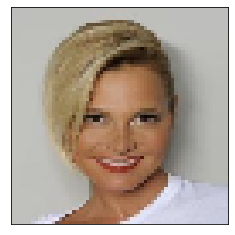

In [64]:
show(100)

  Bald : Yes


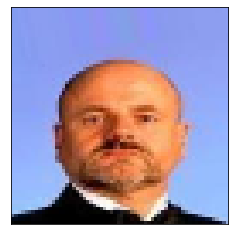

In [65]:
show(23000)

In [66]:
images_f=np.array(images)
y = np.array(balds)
X = images_f/255

[0 1]
[22129  4510]


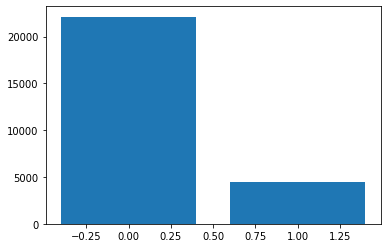

In [67]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
# reshape 4d to 2d
X_r = X.reshape(X.shape[0], -1)
os_X,os_y = sm.fit_resample(X_r,y)
# Reshape the input data back to the original 4D format
os_X = os_X.reshape(-1,64,64,3)

[0 1]
[22129 22129]


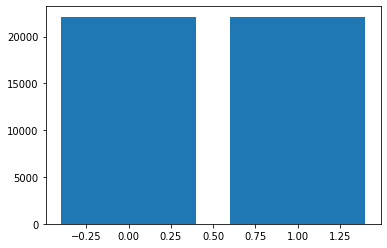

In [34]:
val,counts=np.unique(os_y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(os_X,os_y,test_size=0.25,random_state=0,stratify=os_y)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1000,stratify=y)

### Building model

In [10]:
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=(64,64, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
last_output = base_model.output
num_trainable_params = sum([w.shape.num_elements() for w in base_model.trainable_weights])

print(f"There are {num_trainable_params:,} trainable parameters in this model.")
print(f"The pretrained model has type: {type(base_model)}")

9406464/9406464 [==============================] - 1s 0us/step
There are 0 trainable parameters in this model.
The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [30]:
def transfer_learning(last_output, pre_trained_model):
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.6
    x = tf.keras.layers.Dropout(0.6)(x)  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(2, activation='sigmoid')(x)          
    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)
    
    return model

model = transfer_learning(last_output, base_model)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 8, 8, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 8, 8, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 8, 8, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 8, 8, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 4, 4, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 4, 4, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 4, 4, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 4, 4, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 4, 4, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 4, 4, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 4, 4, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 4, 4, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 2, 2, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 2, 2, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 2, 2, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 2, 2, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [69]:
lr_history = model.fit(X_train,y_train,
                       epochs=40,
                       validation_data=(X_test,y_test),
                       callbacks=lr_schedule,
                       verbose=1)

Epoch 1/40
625/625 [==============================] - 104s 166ms/step - loss: 0.3146 - accuracy: 0.8723 - val_loss: 0.2264 - val_accuracy: 0.9009 - lr: 1.0000e-04
Epoch 2/40
625/625 [==============================] - 100s 160ms/step - loss: 0.2180 - accuracy: 0.9059 - val_loss: 0.2184 - val_accuracy: 0.9033 - lr: 1.1220e-04
Epoch 3/40
625/625 [==============================] - 103s 164ms/step - loss: 0.1975 - accuracy: 0.9159 - val_loss: 0.2101 - val_accuracy: 0.9105 - lr: 1.2589e-04
Epoch 4/40
625/625 [==============================] - 105s 169ms/step - loss: 0.1756 - accuracy: 0.9247 - val_loss: 0.2062 - val_accuracy: 0.9132 - lr: 1.4125e-04
Epoch 5/40
625/625 [==============================] - 106s 170ms/step - loss: 0.1601 - accuracy: 0.9329 - val_loss: 0.2204 - val_accuracy: 0.9120 - lr: 1.5849e-04
Epoch 6/40
625/625 [==============================] - 107s 172ms/step - loss: 0.1496 - accuracy: 0.9359 - val_loss: 0.2102 - val_accuracy: 0.9143 - lr: 1.7783e-04
Epoch 7/40
625/625 [==

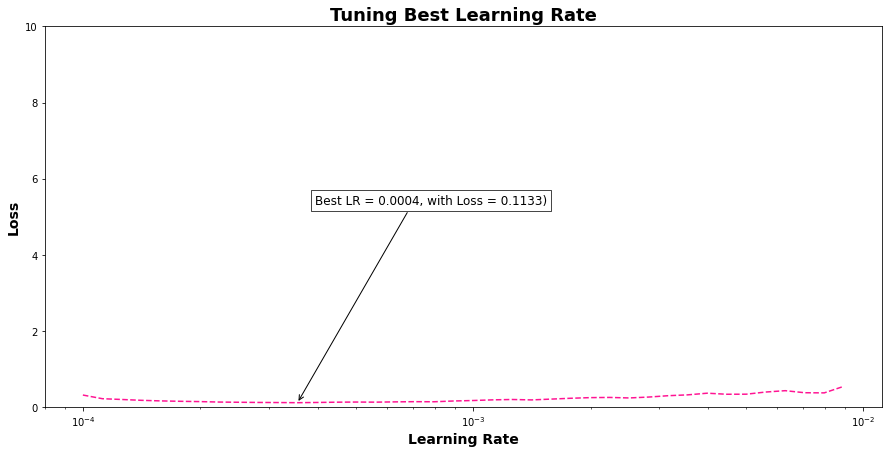

best learn rate = 0.0003548133827280253


In [70]:
def plot_best_learning(lr_history):
    x = lr_history.history["lr"] ; y = lr_history.history["loss"]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    def annot_min(x,y, ax=None):
        xmin = x[np.argmin(y)]
        ymin = np.min(y)
        text= f"Best LR = {xmin:.4f}, with Loss = {ymin:.4f})"
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmin, ymin), xytext=(0.6,0.56), fontsize=12, **kw)
        return xmin
    xmin = annot_min(x,y,ax)
    ax.semilogx(x, y,ls='dashed', color='deeppink')
    ax.set_title('Tuning Best Learning Rate',fontsize=18, fontweight='bold')
    ax.set_ylabel('Loss',fontsize=14, fontweight='bold')
    ax.set_xlabel('Learning Rate',fontsize=14, fontweight='bold')
    plt.ylim((0, 10))
    plt.show()
    return xmin
    

best_learn_rate = plot_best_learning(lr_history)
print(f"best learn rate = {best_learn_rate}")

In [71]:
model = transfer_learning(last_output, base_model)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = best_learn_rate),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Bd_Det2.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=20,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [73]:
history = model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=100,callbacks=callback_list)

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.8829
Epoch 1: val_loss improved from inf to 0.23096, saving model to Bd_Det2.h5
313/313 [==============================] - 103s 314ms/step - loss: 0.3354 - accuracy: 0.8829 - val_loss: 0.2310 - val_accuracy: 0.8989
Epoch 2/100
313/313 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9101
Epoch 2: val_loss improved from 0.23096 to 0.20135, saving model to Bd_Det2.h5
313/313 [==============================] - 94s 299ms/step - loss: 0.2082 - accuracy: 0.9101 - val_loss: 0.2013 - val_accuracy: 0.9132
Epoch 3/100
313/313 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9197
Epoch 3: val_loss improved from 0.20135 to 0.20057, saving model to Bd_Det2.h5
313/313 [==============================] - 96s 306ms/step - loss: 0.1889 - accuracy: 0.9197 - val_loss: 0.2006 - val_accuracy: 0.9153
Epoch 4/100
313/313 [==============================] - ETA: 0s - loss: 0.

In [74]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

209/209 [==============================] - 24s 110ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5532
           1       0.75      0.76      0.75      1128

    accuracy                           0.92      6660
   macro avg       0.85      0.85      0.85      6660
weighted avg       0.92      0.92      0.92      6660



In [56]:
BD=model((64,64,3))
BD.summary()
BD.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=2)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_35 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_28 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 29, 29, 64)        18496     
                                                           

In [60]:
B_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='sigmoid')    

])
B_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
B_model.summary()
B_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 128)       

In [37]:
fle_s="Bald_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=20,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [38]:
B_History = B_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=callback_list)

Epoch 1/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9710
Epoch 1: val_accuracy improved from -inf to 0.97235, saving model to Bald_Detection.h5
1038/1038 [==============================] - 116s 111ms/step - loss: 0.0843 - accuracy: 0.9710 - val_loss: 0.0758 - val_accuracy: 0.9723
Epoch 2/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9764
Epoch 2: val_accuracy did not improve from 0.97235
1038/1038 [==============================] - 108s 104ms/step - loss: 0.0685 - accuracy: 0.9764 - val_loss: 0.0861 - val_accuracy: 0.9700
Epoch 3/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9791
Epoch 3: val_accuracy did not improve from 0.97235
1038/1038 [==============================] - 107s 103ms/step - loss: 0.0600 - accuracy: 0.9791 - val_loss: 0.0870 - val_accuracy: 0.9667
Epoch 4/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9828
Epoch 4:

Epoch 29/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9978
Epoch 29: val_accuracy did not improve from 0.98039
1038/1038 [==============================] - 112s 108ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.1262 - val_accuracy: 0.9779
Epoch 30/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9976
Epoch 30: val_accuracy did not improve from 0.98039
1038/1038 [==============================] - 111s 107ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.1492 - val_accuracy: 0.9771
Epoch 31/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9976
Epoch 31: val_accuracy did not improve from 0.98039
1038/1038 [==============================] - 112s 108ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.1379 - val_accuracy: 0.9775
Epoch 32/50
1037/1038 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9986
Epoch 32: val_accuracy did not improv

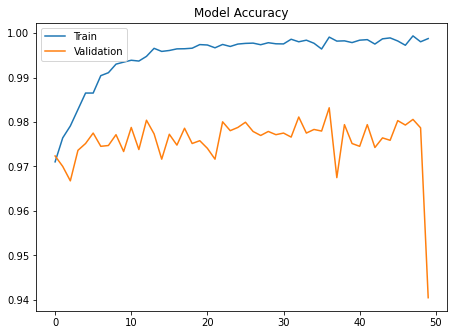

In [39]:
plt.plot(B_History.history['accuracy'])
plt.plot(B_History.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

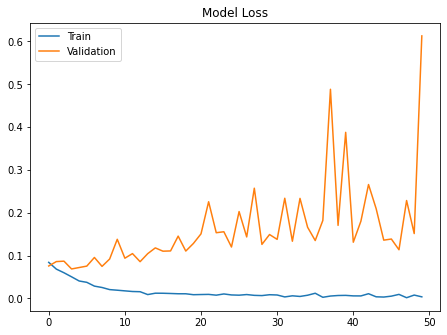

In [40]:
plt.plot(B_History.history['loss'])
plt.plot(B_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

In [41]:
y_pred = B_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

346/346 [==============================] - 19s 55ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5533
           1       0.97      0.91      0.94      5532

    accuracy                           0.94     11065
   macro avg       0.94      0.94      0.94     11065
weighted avg       0.94      0.94      0.94     11065



<AxesSubplot:>

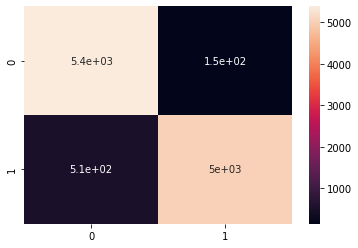

In [42]:
import seaborn as sns
results=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(results,annot=True)

### testing model

In [80]:
B_model.evaluate(X_test,y_test)

75/75 [==============================] - 2s 28ms/step - loss: 0.3724 - accuracy: 0.9596


[0.3723887801170349, 0.9596299529075623]

In [81]:
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    bd=['No',"Yes"]
    print("   Bald : ",bd[y_pred_classes[i]])
    plt.show()

   Bald :  No


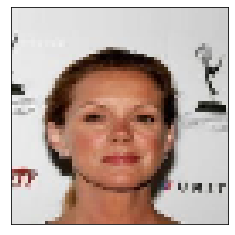

In [82]:
test_image(600)

   Bald :  Yes


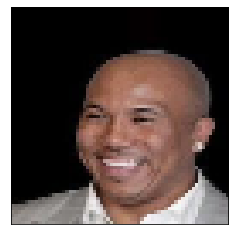

In [101]:
test_image(3)

    Child :  No


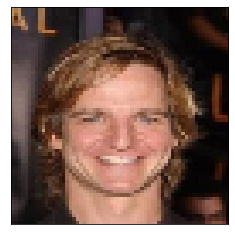

    Child :  No


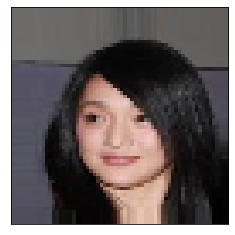

    Child :  Yes


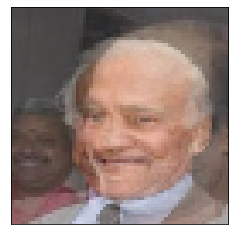

    Child :  No


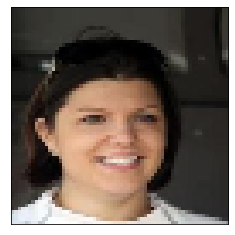

    Child :  Yes


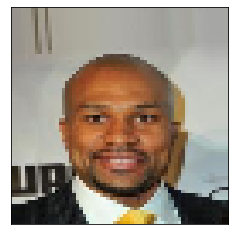

    Child :  Yes


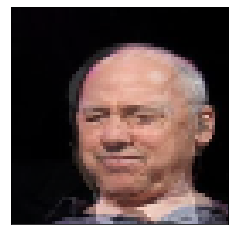

    Child :  No


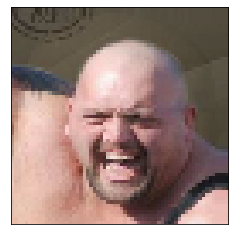

    Child :  No


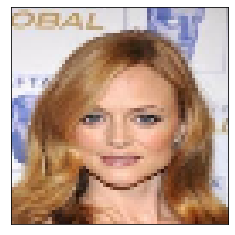

    Child :  Yes


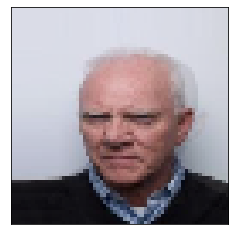

    Child :  No


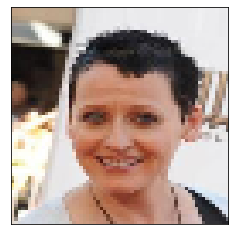

    Child :  No


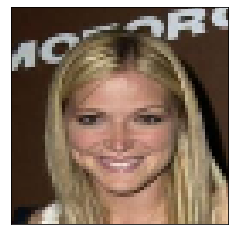

    Child :  Yes


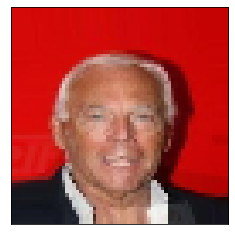

    Child :  Yes


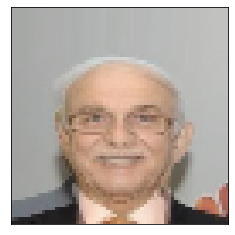

    Child :  No


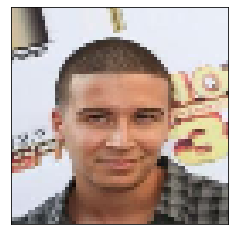

    Child :  Yes


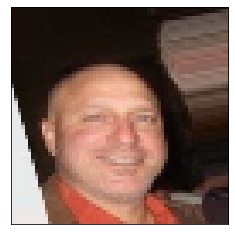

    Child :  Yes


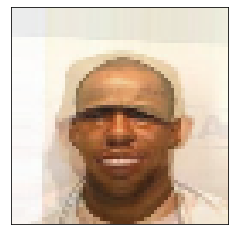

    Child :  No


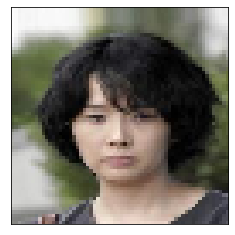

    Child :  No


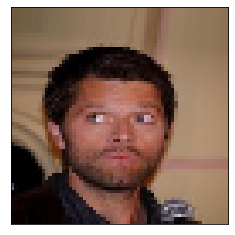

    Child :  No


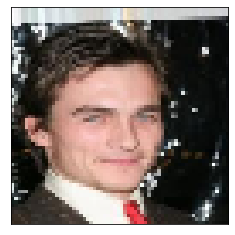

    Child :  No


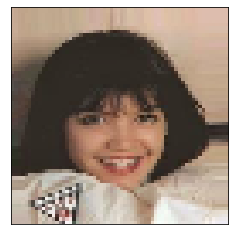

In [43]:
for i in range(80,100):
    test_image(i)

# 3.Detecting person 'Eye colour'

` 

In [84]:
# Loading data
E_fd="./Data2/Eye"
E_files=os.listdir(E_fd)
eyes=[]
images=[]

for f in E_files:
  
    eye=str(f.split('_')[0])
    total=E_fd+'/'+f
    print(total)
    image =cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    images.append(image)
    eyes.append(eye)

./Data2/Eye/Black_eye (1).jpg
./Data2/Eye/Black_eye (1000).jpg
./Data2/Eye/Black_eye (1001).jpg
./Data2/Eye/Black_eye (1003).jpg
./Data2/Eye/Black_eye (1004).jpg
./Data2/Eye/Black_eye (1005).jpg
./Data2/Eye/Black_eye (1006).jpg
./Data2/Eye/Black_eye (1007).jpg
./Data2/Eye/Black_eye (1008).jpg
./Data2/Eye/Black_eye (1010).jpg
./Data2/Eye/Black_eye (1012).jpg
./Data2/Eye/Black_eye (1013).jpg
./Data2/Eye/Black_eye (1014).jpg
./Data2/Eye/Black_eye (1016).jpg
./Data2/Eye/Black_eye (1017).jpg
./Data2/Eye/Black_eye (1018).jpg
./Data2/Eye/Black_eye (1019).jpg
./Data2/Eye/Black_eye (102).jpg
./Data2/Eye/Black_eye (1020).jpg
./Data2/Eye/Black_eye (1021).jpg
./Data2/Eye/Black_eye (1022).jpg
./Data2/Eye/Black_eye (1023).jpg
./Data2/Eye/Black_eye (1024).jpg
./Data2/Eye/Black_eye (1025).jpg
./Data2/Eye/Black_eye (1026).jpg
./Data2/Eye/Black_eye (1027).jpg
./Data2/Eye/Black_eye (1028).jpg
./Data2/Eye/Black_eye (103).jpg
./Data2/Eye/Black_eye (1030).jpg
./Data2/Eye/Black_eye (1032).jpg
./Data2/Eye/Bla

./Data2/Eye/Black_eye (226).jpg
./Data2/Eye/Black_eye (227).jpg
./Data2/Eye/Black_eye (228).jpg
./Data2/Eye/Black_eye (229).jpg
./Data2/Eye/Black_eye (23).jpg
./Data2/Eye/Black_eye (230).jpg
./Data2/Eye/Black_eye (231).jpg
./Data2/Eye/Black_eye (232).jpg
./Data2/Eye/Black_eye (233).jpg
./Data2/Eye/Black_eye (234).jpg
./Data2/Eye/Black_eye (235).jpg
./Data2/Eye/Black_eye (237).jpg
./Data2/Eye/Black_eye (238).jpg
./Data2/Eye/Black_eye (239).jpg
./Data2/Eye/Black_eye (240).jpg
./Data2/Eye/Black_eye (241).jpg
./Data2/Eye/Black_eye (242).jpg
./Data2/Eye/Black_eye (243).jpg
./Data2/Eye/Black_eye (244).jpg
./Data2/Eye/Black_eye (245).jpg
./Data2/Eye/Black_eye (246).jpg
./Data2/Eye/Black_eye (247).jpg
./Data2/Eye/Black_eye (248).jpg
./Data2/Eye/Black_eye (249).jpg
./Data2/Eye/Black_eye (250).jpg
./Data2/Eye/Black_eye (251).jpg
./Data2/Eye/Black_eye (252).jpg
./Data2/Eye/Black_eye (253).jpg
./Data2/Eye/Black_eye (254).jpg
./Data2/Eye/Black_eye (255).jpg
./Data2/Eye/Black_eye (256).jpg
./Data2/E

./Data2/Eye/Black_eye (530).jpg
./Data2/Eye/Black_eye (531).jpg
./Data2/Eye/Black_eye (532).jpg
./Data2/Eye/Black_eye (533).jpg
./Data2/Eye/Black_eye (534).jpg
./Data2/Eye/Black_eye (535).jpg
./Data2/Eye/Black_eye (536).jpg
./Data2/Eye/Black_eye (537).jpg
./Data2/Eye/Black_eye (539).jpg
./Data2/Eye/Black_eye (540).jpg
./Data2/Eye/Black_eye (541).jpg
./Data2/Eye/Black_eye (542).jpg
./Data2/Eye/Black_eye (543).jpg
./Data2/Eye/Black_eye (547).jpg
./Data2/Eye/Black_eye (548).jpg
./Data2/Eye/Black_eye (549).jpg
./Data2/Eye/Black_eye (55).jpg
./Data2/Eye/Black_eye (552).jpg
./Data2/Eye/Black_eye (553).jpg
./Data2/Eye/Black_eye (554).jpg
./Data2/Eye/Black_eye (555).jpg
./Data2/Eye/Black_eye (556).jpg
./Data2/Eye/Black_eye (557).jpg
./Data2/Eye/Black_eye (558).jpg
./Data2/Eye/Black_eye (559).jpg
./Data2/Eye/Black_eye (56).jpg
./Data2/Eye/Black_eye (560).jpg
./Data2/Eye/Black_eye (562).jpg
./Data2/Eye/Black_eye (563).jpg
./Data2/Eye/Black_eye (564).jpg
./Data2/Eye/Black_eye (565).jpg
./Data2/Ey

./Data2/Eye/Black_eye (850).jpg
./Data2/Eye/Black_eye (852).jpg
./Data2/Eye/Black_eye (853).jpg
./Data2/Eye/Black_eye (855).jpg
./Data2/Eye/Black_eye (856).jpg
./Data2/Eye/Black_eye (858).jpg
./Data2/Eye/Black_eye (859).jpg
./Data2/Eye/Black_eye (86).jpg
./Data2/Eye/Black_eye (860).jpg
./Data2/Eye/Black_eye (861).jpg
./Data2/Eye/Black_eye (862).jpg
./Data2/Eye/Black_eye (863).jpg
./Data2/Eye/Black_eye (864).jpg
./Data2/Eye/Black_eye (865).jpg
./Data2/Eye/Black_eye (866).jpg
./Data2/Eye/Black_eye (867).jpg
./Data2/Eye/Black_eye (868).jpg
./Data2/Eye/Black_eye (869).jpg
./Data2/Eye/Black_eye (87).jpg
./Data2/Eye/Black_eye (870).jpg
./Data2/Eye/Black_eye (871).jpg
./Data2/Eye/Black_eye (872).jpg
./Data2/Eye/Black_eye (873).jpg
./Data2/Eye/Black_eye (874).jpg
./Data2/Eye/Black_eye (875).jpg
./Data2/Eye/Black_eye (876).jpg
./Data2/Eye/Black_eye (877).jpg
./Data2/Eye/Black_eye (878).jpg
./Data2/Eye/Black_eye (879).jpg
./Data2/Eye/Black_eye (88).jpg
./Data2/Eye/Black_eye (880).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (1205).jpg
./Data2/Eye/Blue_eye (1206).jpg
./Data2/Eye/Blue_eye (1207).jpg
./Data2/Eye/Blue_eye (1208).jpg
./Data2/Eye/Blue_eye (1209).jpg
./Data2/Eye/Blue_eye (121).jpg
./Data2/Eye/Blue_eye (1210).jpg
./Data2/Eye/Blue_eye (1211).jpg
./Data2/Eye/Blue_eye (1212).jpg
./Data2/Eye/Blue_eye (1213).jpg
./Data2/Eye/Blue_eye (1214).jpg
./Data2/Eye/Blue_eye (1215).jpg
./Data2/Eye/Blue_eye (1216).jpg
./Data2/Eye/Blue_eye (1217).jpg
./Data2/Eye/Blue_eye (1218).jpg
./Data2/Eye/Blue_eye (1219).jpg
./Data2/Eye/Blue_eye (122).jpg
./Data2/Eye/Blue_eye (1220).jpg
./Data2/Eye/Blue_eye (1221).jpg
./Data2/Eye/Blue_eye (1222).jpg
./Data2/Eye/Blue_eye (1223).jpg
./Data2/Eye/Blue_eye (1224).jpg
./Data2/Eye/Blue_eye (1225).jpg
./Data2/Eye/Blue_eye (1226).jpg
./Data2/Eye/Blue_eye (1227).jpg
./Data2/Eye/Blue_eye (1228).jpg
./Data2/Eye/Blue_eye (1229).jpg
./Data2/Eye/Blue_eye (123).jpg
./Data2/Eye/Blue_eye (1230).jpg
./Data2/Eye/Blue_eye (1231).jpg
./Data2/Eye/Blue_eye (1232).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (1483).jpg
./Data2/Eye/Blue_eye (1484).jpg
./Data2/Eye/Blue_eye (1485).jpg
./Data2/Eye/Blue_eye (1486).jpg
./Data2/Eye/Blue_eye (1487).jpg
./Data2/Eye/Blue_eye (1488).jpg
./Data2/Eye/Blue_eye (1489).jpg
./Data2/Eye/Blue_eye (149).jpg
./Data2/Eye/Blue_eye (1490).jpg
./Data2/Eye/Blue_eye (1491).jpg
./Data2/Eye/Blue_eye (1492).jpg
./Data2/Eye/Blue_eye (1493).jpg
./Data2/Eye/Blue_eye (1494).jpg
./Data2/Eye/Blue_eye (1495).jpg
./Data2/Eye/Blue_eye (1497).jpg
./Data2/Eye/Blue_eye (1498).jpg
./Data2/Eye/Blue_eye (1499).jpg
./Data2/Eye/Blue_eye (15).jpg
./Data2/Eye/Blue_eye (150).jpg
./Data2/Eye/Blue_eye (1500).jpg
./Data2/Eye/Blue_eye (1501).jpg
./Data2/Eye/Blue_eye (1502).jpg
./Data2/Eye/Blue_eye (1503).jpg
./Data2/Eye/Blue_eye (1504).jpg
./Data2/Eye/Blue_eye (1505).jpg
./Data2/Eye/Blue_eye (1506).jpg
./Data2/Eye/Blue_eye (1507).jpg
./Data2/Eye/Blue_eye (1508).jpg
./Data2/Eye/Blue_eye (1509).jpg
./Data2/Eye/Blue_eye (151).jpg
./Data2/Eye/Blue_eye (1510).jpg
./Data2/Eye/B

./Data2/Eye/Blue_eye (1813).jpg
./Data2/Eye/Blue_eye (1815).jpg
./Data2/Eye/Blue_eye (1817).jpg
./Data2/Eye/Blue_eye (1819).jpg
./Data2/Eye/Blue_eye (182).jpg
./Data2/Eye/Blue_eye (1821).jpg
./Data2/Eye/Blue_eye (1823).jpg
./Data2/Eye/Blue_eye (1825).jpg
./Data2/Eye/Blue_eye (1826).jpg
./Data2/Eye/Blue_eye (1828).jpg
./Data2/Eye/Blue_eye (1829).jpg
./Data2/Eye/Blue_eye (183).jpg
./Data2/Eye/Blue_eye (1830).jpg
./Data2/Eye/Blue_eye (1832).jpg
./Data2/Eye/Blue_eye (1833).jpg
./Data2/Eye/Blue_eye (1834).jpg
./Data2/Eye/Blue_eye (1837).jpg
./Data2/Eye/Blue_eye (1838).jpg
./Data2/Eye/Blue_eye (1839).jpg
./Data2/Eye/Blue_eye (1840).jpg
./Data2/Eye/Blue_eye (1841).jpg
./Data2/Eye/Blue_eye (1842).jpg
./Data2/Eye/Blue_eye (1843).jpg
./Data2/Eye/Blue_eye (1844).jpg
./Data2/Eye/Blue_eye (1845).jpg
./Data2/Eye/Blue_eye (1846).jpg
./Data2/Eye/Blue_eye (1847).jpg
./Data2/Eye/Blue_eye (1848).jpg
./Data2/Eye/Blue_eye (1849).jpg
./Data2/Eye/Blue_eye (185).jpg
./Data2/Eye/Blue_eye (1850).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (210).jpg
./Data2/Eye/Blue_eye (2100).jpg
./Data2/Eye/Blue_eye (2101).jpg
./Data2/Eye/Blue_eye (2102).jpg
./Data2/Eye/Blue_eye (2103).jpg
./Data2/Eye/Blue_eye (2104).jpg
./Data2/Eye/Blue_eye (2105).jpg
./Data2/Eye/Blue_eye (2106).jpg
./Data2/Eye/Blue_eye (2107).jpg
./Data2/Eye/Blue_eye (2108).jpg
./Data2/Eye/Blue_eye (2109).jpg
./Data2/Eye/Blue_eye (211).jpg
./Data2/Eye/Blue_eye (2110).jpg
./Data2/Eye/Blue_eye (2111).jpg
./Data2/Eye/Blue_eye (2112).jpg
./Data2/Eye/Blue_eye (2113).jpg
./Data2/Eye/Blue_eye (2114).jpg
./Data2/Eye/Blue_eye (2115).jpg
./Data2/Eye/Blue_eye (2116).jpg
./Data2/Eye/Blue_eye (2118).jpg
./Data2/Eye/Blue_eye (2119).jpg
./Data2/Eye/Blue_eye (212).jpg
./Data2/Eye/Blue_eye (2120).jpg
./Data2/Eye/Blue_eye (2121).jpg
./Data2/Eye/Blue_eye (2122).jpg
./Data2/Eye/Blue_eye (2123).jpg
./Data2/Eye/Blue_eye (2124).jpg
./Data2/Eye/Blue_eye (2125).jpg
./Data2/Eye/Blue_eye (2126).jpg
./Data2/Eye/Blue_eye (2127).jpg
./Data2/Eye/Blue_eye (2128).jpg
./Data2/Eye

./Data2/Eye/Blue_eye (280).jpg
./Data2/Eye/Blue_eye (281).jpg
./Data2/Eye/Blue_eye (282).jpg
./Data2/Eye/Blue_eye (283).jpg
./Data2/Eye/Blue_eye (284).jpg
./Data2/Eye/Blue_eye (285).jpg
./Data2/Eye/Blue_eye (286).jpg
./Data2/Eye/Blue_eye (287).jpg
./Data2/Eye/Blue_eye (288).jpg
./Data2/Eye/Blue_eye (289).jpg
./Data2/Eye/Blue_eye (29).jpg
./Data2/Eye/Blue_eye (290).jpg
./Data2/Eye/Blue_eye (291).jpg
./Data2/Eye/Blue_eye (292).jpg
./Data2/Eye/Blue_eye (293).jpg
./Data2/Eye/Blue_eye (294).jpg
./Data2/Eye/Blue_eye (295).jpg
./Data2/Eye/Blue_eye (296).jpg
./Data2/Eye/Blue_eye (297).jpg
./Data2/Eye/Blue_eye (299).jpg
./Data2/Eye/Blue_eye (3).jpg
./Data2/Eye/Blue_eye (30).jpg
./Data2/Eye/Blue_eye (300).jpg
./Data2/Eye/Blue_eye (301).jpg
./Data2/Eye/Blue_eye (302).jpg
./Data2/Eye/Blue_eye (303).jpg
./Data2/Eye/Blue_eye (304).jpg
./Data2/Eye/Blue_eye (305).jpg
./Data2/Eye/Blue_eye (306).jpg
./Data2/Eye/Blue_eye (307).jpg
./Data2/Eye/Blue_eye (308).jpg
./Data2/Eye/Blue_eye (309).jpg
./Data2/Eye/

./Data2/Eye/Blue_eye (590).jpg
./Data2/Eye/Blue_eye (591).jpg
./Data2/Eye/Blue_eye (592).jpg
./Data2/Eye/Blue_eye (593).jpg
./Data2/Eye/Blue_eye (594).jpg
./Data2/Eye/Blue_eye (595).jpg
./Data2/Eye/Blue_eye (596).jpg
./Data2/Eye/Blue_eye (597).jpg
./Data2/Eye/Blue_eye (598).jpg
./Data2/Eye/Blue_eye (599).jpg
./Data2/Eye/Blue_eye (6).jpg
./Data2/Eye/Blue_eye (60).jpg
./Data2/Eye/Blue_eye (600).jpg
./Data2/Eye/Blue_eye (601).jpg
./Data2/Eye/Blue_eye (602).jpg
./Data2/Eye/Blue_eye (603).jpg
./Data2/Eye/Blue_eye (604).jpg
./Data2/Eye/Blue_eye (605).jpg
./Data2/Eye/Blue_eye (606).jpg
./Data2/Eye/Blue_eye (607).jpg
./Data2/Eye/Blue_eye (608).jpg
./Data2/Eye/Blue_eye (609).jpg
./Data2/Eye/Blue_eye (61).jpg
./Data2/Eye/Blue_eye (610).jpg
./Data2/Eye/Blue_eye (611).jpg
./Data2/Eye/Blue_eye (612).jpg
./Data2/Eye/Blue_eye (613).jpg
./Data2/Eye/Blue_eye (614).jpg
./Data2/Eye/Blue_eye (615).jpg
./Data2/Eye/Blue_eye (616).jpg
./Data2/Eye/Blue_eye (617).jpg
./Data2/Eye/Blue_eye (618).jpg
./Data2/Eye/

./Data2/Eye/Blue_eye (902).jpg
./Data2/Eye/Blue_eye (903).jpg
./Data2/Eye/Blue_eye (904).jpg
./Data2/Eye/Blue_eye (905).jpg
./Data2/Eye/Blue_eye (906).jpg
./Data2/Eye/Blue_eye (907).jpg
./Data2/Eye/Blue_eye (908).jpg
./Data2/Eye/Blue_eye (909).jpg
./Data2/Eye/Blue_eye (91).jpg
./Data2/Eye/Blue_eye (910).jpg
./Data2/Eye/Blue_eye (911).jpg
./Data2/Eye/Blue_eye (912).jpg
./Data2/Eye/Blue_eye (913).jpg
./Data2/Eye/Blue_eye (914).jpg
./Data2/Eye/Blue_eye (915).jpg
./Data2/Eye/Blue_eye (916).jpg
./Data2/Eye/Blue_eye (917).jpg
./Data2/Eye/Blue_eye (919).jpg
./Data2/Eye/Blue_eye (92).jpg
./Data2/Eye/Blue_eye (920).jpg
./Data2/Eye/Blue_eye (921).jpg
./Data2/Eye/Blue_eye (922).jpg
./Data2/Eye/Blue_eye (924).jpg
./Data2/Eye/Blue_eye (925).jpg
./Data2/Eye/Blue_eye (927).jpg
./Data2/Eye/Blue_eye (928).jpg
./Data2/Eye/Blue_eye (929).jpg
./Data2/Eye/Blue_eye (93).jpg
./Data2/Eye/Blue_eye (930).jpg
./Data2/Eye/Blue_eye (931).jpg
./Data2/Eye/Blue_eye (932).jpg
./Data2/Eye/Blue_eye (933).jpg
./Data2/Eye

./Data2/Eye/Brown_eye (1176).jpg
./Data2/Eye/Brown_eye (1177).jpg
./Data2/Eye/Brown_eye (1178).jpg
./Data2/Eye/Brown_eye (1179).jpg
./Data2/Eye/Brown_eye (118).jpg
./Data2/Eye/Brown_eye (1180).jpg
./Data2/Eye/Brown_eye (1181).jpg
./Data2/Eye/Brown_eye (1182).jpg
./Data2/Eye/Brown_eye (1183).jpg
./Data2/Eye/Brown_eye (1184).jpg
./Data2/Eye/Brown_eye (119).jpg
./Data2/Eye/Brown_eye (12).jpg
./Data2/Eye/Brown_eye (120).jpg
./Data2/Eye/Brown_eye (121).jpg
./Data2/Eye/Brown_eye (122).jpg
./Data2/Eye/Brown_eye (123).jpg
./Data2/Eye/Brown_eye (124).jpg
./Data2/Eye/Brown_eye (125).jpg
./Data2/Eye/Brown_eye (126).jpg
./Data2/Eye/Brown_eye (127).jpg
./Data2/Eye/Brown_eye (128).jpg
./Data2/Eye/Brown_eye (13).jpg
./Data2/Eye/Brown_eye (130).jpg
./Data2/Eye/Brown_eye (131).jpg
./Data2/Eye/Brown_eye (132).jpg
./Data2/Eye/Brown_eye (133).jpg
./Data2/Eye/Brown_eye (134).jpg
./Data2/Eye/Brown_eye (135).jpg
./Data2/Eye/Brown_eye (136).jpg
./Data2/Eye/Brown_eye (137).jpg
./Data2/Eye/Brown_eye (138).jpg
.

./Data2/Eye/Brown_eye (397).jpg
./Data2/Eye/Brown_eye (398).jpg
./Data2/Eye/Brown_eye (399).jpg
./Data2/Eye/Brown_eye (4).jpg
./Data2/Eye/Brown_eye (40).jpg
./Data2/Eye/Brown_eye (401).jpg
./Data2/Eye/Brown_eye (402).jpg
./Data2/Eye/Brown_eye (403).jpg
./Data2/Eye/Brown_eye (405).jpg
./Data2/Eye/Brown_eye (406).jpg
./Data2/Eye/Brown_eye (407).jpg
./Data2/Eye/Brown_eye (408).jpg
./Data2/Eye/Brown_eye (409).jpg
./Data2/Eye/Brown_eye (41).jpg
./Data2/Eye/Brown_eye (410).jpg
./Data2/Eye/Brown_eye (411).jpg
./Data2/Eye/Brown_eye (412).jpg
./Data2/Eye/Brown_eye (413).jpg
./Data2/Eye/Brown_eye (414).jpg
./Data2/Eye/Brown_eye (415).jpg
./Data2/Eye/Brown_eye (416).jpg
./Data2/Eye/Brown_eye (417).jpg
./Data2/Eye/Brown_eye (418).jpg
./Data2/Eye/Brown_eye (419).jpg
./Data2/Eye/Brown_eye (420).jpg
./Data2/Eye/Brown_eye (421).jpg
./Data2/Eye/Brown_eye (422).jpg
./Data2/Eye/Brown_eye (423).jpg
./Data2/Eye/Brown_eye (424).jpg
./Data2/Eye/Brown_eye (425).jpg
./Data2/Eye/Brown_eye (426).jpg
./Data2/Eye/

./Data2/Eye/Brown_eye (636).jpg
./Data2/Eye/Brown_eye (637).jpg
./Data2/Eye/Brown_eye (638).jpg
./Data2/Eye/Brown_eye (639).jpg
./Data2/Eye/Brown_eye (64).jpg
./Data2/Eye/Brown_eye (640).jpg
./Data2/Eye/Brown_eye (641).jpg
./Data2/Eye/Brown_eye (642).jpg
./Data2/Eye/Brown_eye (643).jpg
./Data2/Eye/Brown_eye (644).jpg
./Data2/Eye/Brown_eye (645).jpg
./Data2/Eye/Brown_eye (646).jpg
./Data2/Eye/Brown_eye (647).jpg
./Data2/Eye/Brown_eye (648).jpg
./Data2/Eye/Brown_eye (649).jpg
./Data2/Eye/Brown_eye (65).jpg
./Data2/Eye/Brown_eye (650).jpg
./Data2/Eye/Brown_eye (651).jpg
./Data2/Eye/Brown_eye (652).jpg
./Data2/Eye/Brown_eye (653).jpg
./Data2/Eye/Brown_eye (654).jpg
./Data2/Eye/Brown_eye (655).jpg
./Data2/Eye/Brown_eye (656).jpg
./Data2/Eye/Brown_eye (657).jpg
./Data2/Eye/Brown_eye (658).jpg
./Data2/Eye/Brown_eye (659).jpg
./Data2/Eye/Brown_eye (66).jpg
./Data2/Eye/Brown_eye (660).jpg
./Data2/Eye/Brown_eye (661).jpg
./Data2/Eye/Brown_eye (662).jpg
./Data2/Eye/Brown_eye (663).jpg
./Data2/Eye

./Data2/Eye/Brown_eye (906).jpg
./Data2/Eye/Brown_eye (907).jpg
./Data2/Eye/Brown_eye (908).jpg
./Data2/Eye/Brown_eye (909).jpg
./Data2/Eye/Brown_eye (91).jpg
./Data2/Eye/Brown_eye (910).jpg
./Data2/Eye/Brown_eye (911).jpg
./Data2/Eye/Brown_eye (912).jpg
./Data2/Eye/Brown_eye (913).jpg
./Data2/Eye/Brown_eye (914).jpg
./Data2/Eye/Brown_eye (915).jpg
./Data2/Eye/Brown_eye (916).jpg
./Data2/Eye/Brown_eye (917).jpg
./Data2/Eye/Brown_eye (918).jpg
./Data2/Eye/Brown_eye (919).jpg
./Data2/Eye/Brown_eye (92).jpg
./Data2/Eye/Brown_eye (920).jpg
./Data2/Eye/Brown_eye (921).jpg
./Data2/Eye/Brown_eye (922).jpg
./Data2/Eye/Brown_eye (923).jpg
./Data2/Eye/Brown_eye (924).jpg
./Data2/Eye/Brown_eye (925).jpg
./Data2/Eye/Brown_eye (926).jpg
./Data2/Eye/Brown_eye (927).jpg
./Data2/Eye/Brown_eye (928).jpg
./Data2/Eye/Brown_eye (929).jpg
./Data2/Eye/Brown_eye (93).jpg
./Data2/Eye/Brown_eye (930).jpg
./Data2/Eye/Brown_eye (931).jpg
./Data2/Eye/Brown_eye (932).jpg
./Data2/Eye/Brown_eye (933).jpg
./Data2/Eye

./Data2/Eye/Green_eye (305).jpg
./Data2/Eye/Green_eye (306).jpg
./Data2/Eye/Green_eye (307).jpg
./Data2/Eye/Green_eye (308).jpg
./Data2/Eye/Green_eye (309).jpg
./Data2/Eye/Green_eye (31).jpg
./Data2/Eye/Green_eye (311).jpg
./Data2/Eye/Green_eye (313).jpg
./Data2/Eye/Green_eye (314).jpg
./Data2/Eye/Green_eye (315).jpg
./Data2/Eye/Green_eye (316).jpg
./Data2/Eye/Green_eye (317).jpg
./Data2/Eye/Green_eye (318).jpg
./Data2/Eye/Green_eye (319).jpg
./Data2/Eye/Green_eye (320).jpg
./Data2/Eye/Green_eye (321).jpg
./Data2/Eye/Green_eye (322).jpg
./Data2/Eye/Green_eye (323).jpg
./Data2/Eye/Green_eye (325).jpg
./Data2/Eye/Green_eye (327).jpg
./Data2/Eye/Green_eye (328).jpg
./Data2/Eye/Green_eye (329).jpg
./Data2/Eye/Green_eye (330).jpg
./Data2/Eye/Green_eye (333).jpg
./Data2/Eye/Green_eye (334).jpg
./Data2/Eye/Green_eye (336).jpg
./Data2/Eye/Green_eye (337).jpg
./Data2/Eye/Green_eye (338).jpg
./Data2/Eye/Green_eye (339).jpg
./Data2/Eye/Green_eye (34).jpg
./Data2/Eye/Green_eye (340).jpg
./Data2/Ey

./Data2/Eye/Green_eye (603).jpg
./Data2/Eye/Green_eye (604).jpg
./Data2/Eye/Green_eye (605).jpg
./Data2/Eye/Green_eye (606).jpg
./Data2/Eye/Green_eye (607).jpg
./Data2/Eye/Green_eye (608).jpg
./Data2/Eye/Green_eye (609).jpg
./Data2/Eye/Green_eye (61).jpg
./Data2/Eye/Green_eye (610).jpg
./Data2/Eye/Green_eye (614).jpg
./Data2/Eye/Green_eye (615).jpg
./Data2/Eye/Green_eye (616).jpg
./Data2/Eye/Green_eye (62).jpg
./Data2/Eye/Green_eye (622).jpg
./Data2/Eye/Green_eye (623).jpg
./Data2/Eye/Green_eye (624).jpg
./Data2/Eye/Green_eye (625).jpg
./Data2/Eye/Green_eye (626).jpg
./Data2/Eye/Green_eye (627).jpg
./Data2/Eye/Green_eye (628).jpg
./Data2/Eye/Green_eye (629).jpg
./Data2/Eye/Green_eye (63).jpg
./Data2/Eye/Green_eye (630).jpg
./Data2/Eye/Green_eye (631).jpg
./Data2/Eye/Green_eye (635).jpg
./Data2/Eye/Green_eye (636).jpg
./Data2/Eye/Green_eye (637).jpg
./Data2/Eye/Green_eye (639).jpg
./Data2/Eye/Green_eye (64).jpg
./Data2/Eye/Green_eye (640).jpg
./Data2/Eye/Green_eye (641).jpg
./Data2/Eye/

./Data2/Eye/Green_neweye (444).jpg
./Data2/Eye/Green_neweye (445).jpg
./Data2/Eye/Green_neweye (446).jpg
./Data2/Eye/Green_neweye (447).jpg
./Data2/Eye/Green_neweye (449).jpg
./Data2/Eye/Green_neweye (45).jpg
./Data2/Eye/Green_neweye (451).jpg
./Data2/Eye/Green_neweye (452).jpg
./Data2/Eye/Green_neweye (453).jpg
./Data2/Eye/Green_neweye (454).jpg
./Data2/Eye/Green_neweye (455).jpg
./Data2/Eye/Green_neweye (456).jpg
./Data2/Eye/Green_neweye (457).jpg
./Data2/Eye/Green_neweye (458).jpg
./Data2/Eye/Green_neweye (459).jpg
./Data2/Eye/Green_neweye (460).jpg
./Data2/Eye/Green_neweye (461).jpg
./Data2/Eye/Green_neweye (462).jpg
./Data2/Eye/Green_neweye (463).jpg
./Data2/Eye/Green_neweye (464).jpg
./Data2/Eye/Green_neweye (465).jpg
./Data2/Eye/Green_neweye (466).jpg
./Data2/Eye/Green_neweye (467).jpg
./Data2/Eye/Green_neweye (468).jpg
./Data2/Eye/Green_neweye (469).jpg
./Data2/Eye/Green_neweye (47).jpg
./Data2/Eye/Green_neweye (470).jpg
./Data2/Eye/Green_neweye (471).jpg
./Data2/Eye/Green_newe

./Data2/Eye/Green_neye (190).jpg
./Data2/Eye/Green_neye (191).jpg
./Data2/Eye/Green_neye (192).jpg
./Data2/Eye/Green_neye (193).jpg
./Data2/Eye/Green_neye (194).jpg
./Data2/Eye/Green_neye (195).jpg
./Data2/Eye/Green_neye (196).jpg
./Data2/Eye/Green_neye (197).jpg
./Data2/Eye/Green_neye (198).jpg
./Data2/Eye/Green_neye (199).jpg
./Data2/Eye/Green_neye (2).jpg
./Data2/Eye/Green_neye (20).jpg
./Data2/Eye/Green_neye (200).jpg
./Data2/Eye/Green_neye (201).jpg
./Data2/Eye/Green_neye (202).jpg
./Data2/Eye/Green_neye (203).jpg
./Data2/Eye/Green_neye (204).jpg
./Data2/Eye/Green_neye (205).jpg
./Data2/Eye/Green_neye (206).jpg
./Data2/Eye/Green_neye (207).jpg
./Data2/Eye/Green_neye (208).jpg
./Data2/Eye/Green_neye (209).jpg
./Data2/Eye/Green_neye (21).jpg
./Data2/Eye/Green_neye (210).jpg
./Data2/Eye/Green_neye (211).jpg
./Data2/Eye/Green_neye (212).jpg
./Data2/Eye/Green_neye (213).jpg
./Data2/Eye/Green_neye (214).jpg
./Data2/Eye/Green_neye (215).jpg
./Data2/Eye/Green_neye (216).jpg
./Data2/Eye/Gr

./Data2/Eye/Green_neye (460).jpg
./Data2/Eye/Green_neye (461).jpg
./Data2/Eye/Green_neye (462).jpg
./Data2/Eye/Green_neye (463).jpg
./Data2/Eye/Green_neye (464).jpg
./Data2/Eye/Green_neye (465).jpg
./Data2/Eye/Green_neye (466).jpg
./Data2/Eye/Green_neye (467).jpg
./Data2/Eye/Green_neye (469).jpg
./Data2/Eye/Green_neye (47).jpg
./Data2/Eye/Green_neye (471).jpg
./Data2/Eye/Green_neye (473).jpg
./Data2/Eye/Green_neye (474).jpg
./Data2/Eye/Green_neye (475).jpg
./Data2/Eye/Green_neye (476).jpg
./Data2/Eye/Green_neye (477).jpg
./Data2/Eye/Green_neye (478).jpg
./Data2/Eye/Green_neye (479).jpg
./Data2/Eye/Green_neye (48).jpg
./Data2/Eye/Green_neye (480).jpg
./Data2/Eye/Green_neye (481).jpg
./Data2/Eye/Green_neye (482).jpg
./Data2/Eye/Green_neye (483).jpg
./Data2/Eye/Green_neye (484).jpg
./Data2/Eye/Green_neye (485).jpg
./Data2/Eye/Green_neye (486).jpg
./Data2/Eye/Green_neye (487).jpg
./Data2/Eye/Green_neye (488).jpg
./Data2/Eye/Green_neye (489).jpg
./Data2/Eye/Green_neye (49).jpg
./Data2/Eye/G

./Data2/Eye/Green_neye (71).jpg
./Data2/Eye/Green_neye (713).jpg
./Data2/Eye/Green_neye (714).jpg
./Data2/Eye/Green_neye (715).jpg
./Data2/Eye/Green_neye (716).jpg
./Data2/Eye/Green_neye (717).jpg
./Data2/Eye/Green_neye (718).jpg
./Data2/Eye/Green_neye (719).jpg
./Data2/Eye/Green_neye (72).jpg
./Data2/Eye/Green_neye (720).jpg
./Data2/Eye/Green_neye (721).jpg
./Data2/Eye/Green_neye (722).jpg
./Data2/Eye/Green_neye (723).jpg
./Data2/Eye/Green_neye (724).jpg
./Data2/Eye/Green_neye (725).jpg
./Data2/Eye/Green_neye (726).jpg
./Data2/Eye/Green_neye (727).jpg
./Data2/Eye/Green_neye (728).jpg
./Data2/Eye/Green_neye (729).jpg
./Data2/Eye/Green_neye (73).jpg
./Data2/Eye/Green_neye (730).jpg
./Data2/Eye/Green_neye (731).jpg
./Data2/Eye/Green_neye (732).jpg
./Data2/Eye/Green_neye (733).jpg
./Data2/Eye/Green_neye (734).jpg
./Data2/Eye/Green_neye (74).jpg
./Data2/Eye/Green_neye (75).jpg
./Data2/Eye/Green_neye (76).jpg
./Data2/Eye/Green_neye (77).jpg
./Data2/Eye/Green_neye (78).jpg
./Data2/Eye/Green_

### Data visualization`

In [85]:
def show(i):
    plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])
    print('Eye :',eyes[i])
    plt.show()

Eye : Black


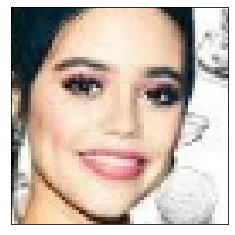

In [86]:
show(704)

Eye : Blue


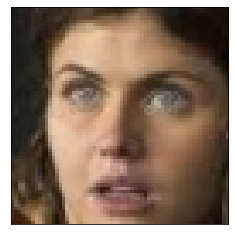

In [87]:
show(1900)

Eye : Brown


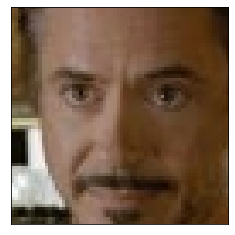

In [88]:
show(3601)

Eye : Green


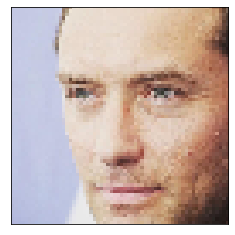

In [89]:
show(4400)

In [90]:
images_f=np.array(images)
y=np.array(eyes)
X = images_f/255

['Black' 'Blue' 'Brown' 'Green']
[ 995 2041 1156 1710]


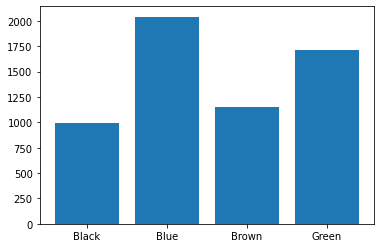

In [91]:
val,counts=np.unique(y,return_counts=1)
print(val)
print(counts)
plt.bar(val,counts)
plt.show()

In [102]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
# reshape 4d to 2d
X_r = X.reshape(X.shape[0], -1)
os_X,os_y = sm.fit_resample(X_r,y)
# Reshape the input data back to the original 4D format
os_X = os_X.reshape(-1,64,64,3)

In [103]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
eyes_ed=LE.fit_transform(os_y)
eyes_ed

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(os_X,eyes_ed,test_size=0.30,random_state=1000,stratify=eyes_ed)

In [106]:
E_model = models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')    

])
E_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
E_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 128)       

In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Eye_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_accuracy',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [110]:
E_History = E_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,callbacks=callback_list)

Epoch 1/150
179/179 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.9200
Epoch 1: val_accuracy improved from 0.79796 to 0.85102, saving model to Eye_Detection2.h5
179/179 [==============================] - 21s 115ms/step - loss: 0.2839 - accuracy: 0.9200 - val_loss: 0.4564 - val_accuracy: 0.8510
Epoch 2/150
179/179 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9482
Epoch 2: val_accuracy improved from 0.85102 to 0.85143, saving model to Eye_Detection2.h5
179/179 [==============================] - 25s 141ms/step - loss: 0.1765 - accuracy: 0.9482 - val_loss: 0.4534 - val_accuracy: 0.8514
Epoch 3/150
179/179 [==============================] - ETA: 0s - loss: 0.1467 - accuracy: 0.9555
Epoch 3: val_accuracy improved from 0.85143 to 0.89469, saving model to Eye_Detection2.h5
179/179 [==============================] - 24s 135ms/step - loss: 0.1467 - accuracy: 0.9555 - val_loss: 0.3498 - val_accuracy: 0.8947
Epoch 4/150
179/179 [================

179/179 [==============================] - 24s 133ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.2972 - val_accuracy: 0.9355
Epoch 29/150
179/179 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9779
Epoch 29: val_accuracy did not improve from 0.94122
179/179 [==============================] - 24s 132ms/step - loss: 0.0838 - accuracy: 0.9779 - val_loss: 0.3059 - val_accuracy: 0.9265
Epoch 30/150
179/179 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9844
Epoch 30: val_accuracy did not improve from 0.94122
179/179 [==============================] - 26s 148ms/step - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.4129 - val_accuracy: 0.9176
Epoch 31/150
179/179 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9839
Epoch 31: val_accuracy did not improve from 0.94122
179/179 [==============================] - 24s 137ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.3343 - val_accuracy: 0.9216
Epoch 32/150
1

Epoch 86/150
179/179 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9870
Epoch 86: val_accuracy did not improve from 0.94449
179/179 [==============================] - 38s 214ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.4166 - val_accuracy: 0.9298
Epoch 87/150
179/179 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9919
Epoch 87: val_accuracy did not improve from 0.94449
179/179 [==============================] - 43s 241ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.3791 - val_accuracy: 0.9306
Epoch 88/150
179/179 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967
Epoch 88: val_accuracy improved from 0.94449 to 0.94531, saving model to Eye_Detection2.h5
179/179 [==============================] - 41s 231ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.4025 - val_accuracy: 0.9453
Epoch 89/150
179/179 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9967
Epoch 89: v

Epoch 115/150
179/179 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9968
Epoch 115: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 231ms/step - loss: 0.0066 - accuracy: 0.9968 - val_loss: 0.4475 - val_accuracy: 0.9371
Epoch 116/150
179/179 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9970
Epoch 116: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 229ms/step - loss: 0.0057 - accuracy: 0.9970 - val_loss: 0.5161 - val_accuracy: 0.9351
Epoch 117/150
179/179 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9940
Epoch 117: val_accuracy did not improve from 0.94531
179/179 [==============================] - 41s 229ms/step - loss: 0.0248 - accuracy: 0.9940 - val_loss: 0.5287 - val_accuracy: 0.9327
Epoch 118/150
179/179 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9851
Epoch 118: val_accuracy did not improve fro

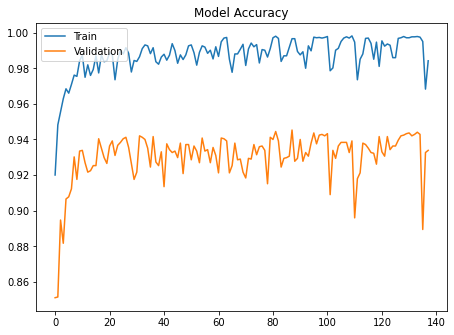

In [117]:
plt.plot(E_History.history['accuracy'])
plt.plot(E_History.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

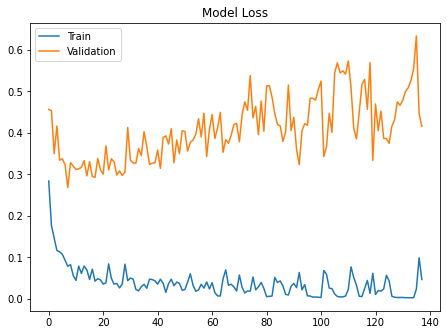

In [112]:
plt.plot(E_History.history['loss'])
plt.plot(E_History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

In [113]:
y_pred = E_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

77/77 [==============================] - 4s 54ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       613
           1       0.86      0.82      0.84       612
           2       0.90      0.93      0.91       612
           3       0.81      0.82      0.81       613

    accuracy                           0.88      2450
   macro avg       0.88      0.88      0.88      2450
weighted avg       0.88      0.88      0.88      2450



<AxesSubplot:>

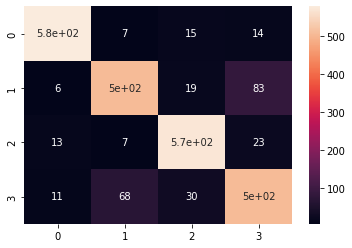

In [114]:
import seaborn as sns
results=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(results,annot=True)

 0 : black, 1: blue, 2:brown, 3:green

### testing model

In [120]:
y_pred = C_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
eye_classes=['Black','Blue', 'Brown','Green']
def test_image(i):
    plt.imshow(X_test[i])
    plt.xticks([]),plt.yticks([])
    print("  Eye : ",eye_classes[y_pred_classes[i]])
    plt.show()

77/77 [==============================] - 4s 57ms/step


  Eye :  Black


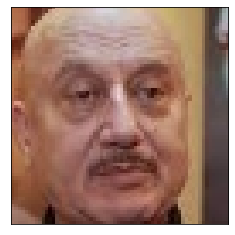

In [136]:
test_image(100)

  Eye :  Blue


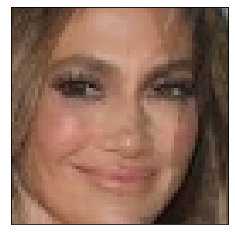

In [140]:
test_image(60)

# Final prediction 
 Combining all the models and predicting all 3

In [39]:

fd="./Data/Test2"
files=os.listdir(fd)
img=[]
for f in files:
    total=fd+'/'+f
    print(total)
    image =cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(64,64))
    img.append(image)

./Data/Test2/black 0 0 3.jpg
./Data/Test2/black 1 0 4.jpg
./Data/Test2/black 1 0 5.jpg
./Data/Test2/blue 0 1 2.jpg
./Data/Test2/blue 1 0 4.jpg
./Data/Test2/brown 0 0 3.jpg
./Data/Test2/brown 1 0  5.jpg
./Data/Test2/brown 1 0 4.jpg
./Data/Test2/brown 1 0 6.jpg
./Data/Test2/brown 1 1 7.jpg
./Data/Test2/brown 1 1 8.jpg
./Data/Test2/Brown_eye (1142).jpg
./Data/Test2/Brown_eye (1153).jpg
./Data/Test2/Brown_eye (1176).jpg
./Data/Test2/download (1).jpg
./Data/Test2/green 0 0 2.jpg
./Data/Test2/Green_eye (4).jpg
./Data/Test2/Green_eye (6).jpg


In [40]:
img_f=np.array(img)
img_f_2=img_f/255

In [78]:

from keras.models import load_model
eye_model = load_model('Eye_Detection.h5')
bald_model = load_model('Bald_Detection.h5')
#bald_model = load_model('Bd_Det2.h5')
child_model = load_model('Child_Detection_o.h5')
#child_model = load_model('Cd_Det2.h5')

p_eye = eye_model.predict(img_f_2)
p_bald = bald_model.predict(img_f_2)
p_child = child_model.predict(img_f_2)
eye_pred= [np.argmax(element) for element in p_eye]
bald_pred= [np.argmax(element) for element in p_bald]
child_pred= [np.argmax(element) for element in p_child]
def test(i):
    eye_classes=['Black','Blue', 'Brown','Green']
    bald_classes=["No", "Yes"]
    child_classes=["No", "Yes"]
    print("\n\n           ",i+1)
    print("Predicted Eye colour is   : " + eye_classes[eye_pred[i]] )
    print("Predicted Bald or not is  : " + bald_classes[bald_pred[i]])
    print("Predicted Child or not is : " + child_classes[child_pred[i]])
    plt.imshow(img_f_2[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 174ms/step




            1
Predicted Eye colour is   : Black
Predicted Bald or not is  : No
Predicted Child or not is : No


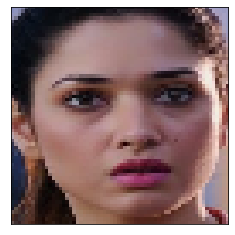



            2
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : No


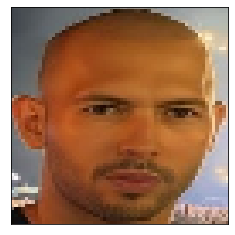



            3
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : No


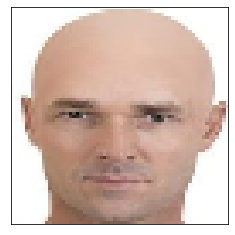



            4
Predicted Eye colour is   : Blue
Predicted Bald or not is  : No
Predicted Child or not is : Yes


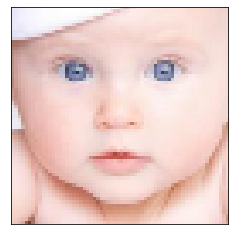



            5
Predicted Eye colour is   : Blue
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes


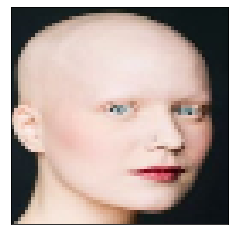



            6
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


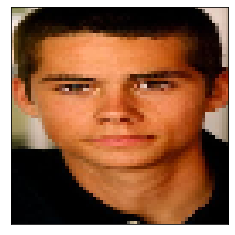



            7
Predicted Eye colour is   : Black
Predicted Bald or not is  : Yes
Predicted Child or not is : No


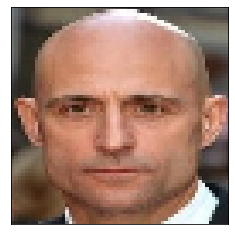



            8
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes


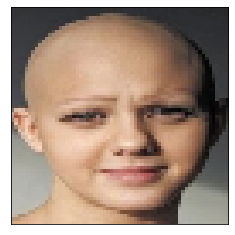



            9
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : Yes


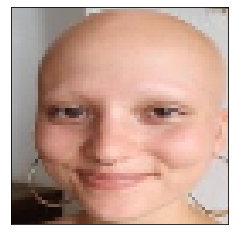



            10
Predicted Eye colour is   : Green
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes


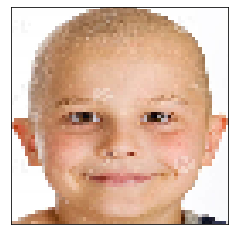



            11
Predicted Eye colour is   : Black
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes


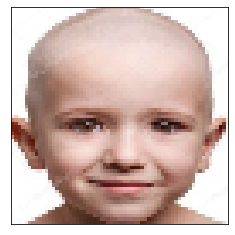



            12
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


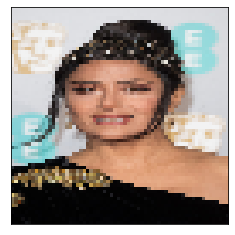



            13
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


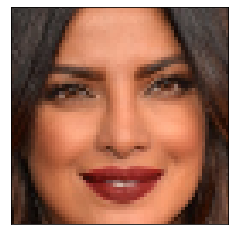



            14
Predicted Eye colour is   : Brown
Predicted Bald or not is  : No
Predicted Child or not is : No


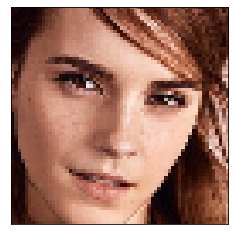



            15
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : No


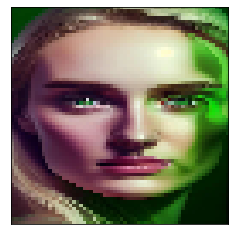



            16
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : Yes


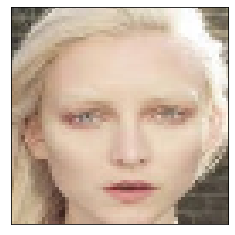



            17
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : Yes


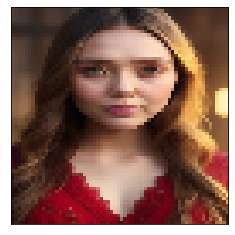



            18
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : Yes


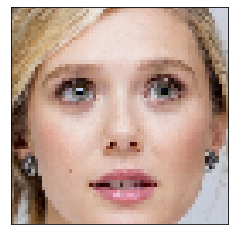

In [77]:
for j in range(len(img)):
    test(j)

# GUI

In [54]:
# Importing Necessary Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image, ImageTk
import numpy as np

# Loading the Model
from keras.models import load_model
eye_model = load_model('Eye_Detection.h5')
bald_model = load_model('Bald_Detection.h5')
child_model = load_model('Child_Detection.h5')

# Initializing the GUI
root = tk.Tk()
root.geometry('800x600')
root.minsize(600,600)
root.maxsize(1920,1080)
root.configure(background="skyblue")
root.title("Pankaj's Eye Colour Detection")


# Initializing the Labels 
f1 = Frame(root, bg="grey", borderwidth=6, relief=SUNKEN)
f1.pack(side=TOP,fill=X)
f2 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f2.pack(side=LEFT,fill=Y)
f3 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f3.pack(side=RIGHT,fill=Y)
f4 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f4.pack(side=BOTTOM,fill=X)
f5 =Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f5.pack(side=TOP,pady=20,padx=20)
label0 = Label(f4,text="  " ,background="silver", font=('lucida', 30, "bold")).pack()
label01 = Label(f2,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()
label02= Label(f3,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()

label1 = Label(f5, background="#CDCDCD", font=('lucida', 15, "bold"))
label2 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
label3 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
sign_image = Label(root)
label1.configure(text='Eye   :  ',foreground="red")
label2.configure(text='Bald   :  ',foreground="blue")
label3.configure(text='Child :  ',foreground="green")


# Defining Detect function which detects the eye colour,bald and child of the person in an image using the model
def Detect(file_path):
    global Label_packed
    image = Image.open(file_path)
    image = image.resize((64,64))
    image = np.array(image)
    image = np.array([image]) / 255
    p_eye = eye_model.predict(image)
    p_bald = bald_model.predict(image)
    p_child = child_model.predict(image)
    eye_pred = int(np.argmax(p_eye)) 
    bald_pred = int(np.argmax(p_bald)) 
    child_pred = int(np.argmax(p_child)) 
    eye_classes=['Black','Blue', 'Brown','Green']
    bald_classes=["No", "Yes"]
    child_classes=["No", "Yes"]
    print("Predicted Eye colour is   : " + eye_classes[eye_pred] )
    print("Predicted Bald or not is  : " + bald_classes[bald_pred])
    print("Predicted Child or not is : " + child_classes[child_pred])
    label1.configure(foreground="red", text=f"Eye :  {eye_classes[eye_pred]}")
    label2.configure(foreground="blue", text=f"Bald  :  {bald_classes[bald_pred]}")
    label3.configure(foreground="green", text=f"Child :  {child_classes[child_pred]}")

# Defining Show_detect button function
def show_Detect_button(file_path):
    try:
        Detect_b = Button(f4, text="Detect Image", command=lambda: Detect(file_path), padx=10, pady=5)
        Detect_b.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
        Detect_b.place(relx=0.55, rely=0.1)
        
    except:
        pass

# Defining Upload Image Function
def upload_image():
    try:
        file_path = filedialog.askopenfilename(filetypes =[('Image Files', '*.jpg')])
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((root.winfo_width() / 2.25), (root.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        label1.configure(text='Eye   :  ',foreground="red")
        label2.configure(text='Bald   :  ',foreground="blue")
        label3.configure(text='Child :  ',foreground="green")

        sign_image.configure(image=im)
        sign_image.image = im
        
        show_Detect_button(file_path)

    except:
        pass

upload = Button(f4, text="Upload an Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
upload.pack(side='bottom', pady=5)
upload.place(relx=0.3, rely=0.1)
sign_image.pack(side='bottom', expand=True)
label1.pack(side="bottom", expand=True)
label2.pack(side="bottom", expand=True)
label3.pack(side="bottom", expand=True)
heading = Label(f1, text="Eye Bald & Child Detector", pady=10, font=('arial', 20, "bold"),)
heading.configure(background="silver", foreground="black")
heading.pack(fill=X)


root.mainloop()


1/1 [==============================] - 0s 60ms/step
Predicted Eye colour is   : Black
Predicted Bald or not is  : Yes
Predicted Child or not is : Yes
1/1 [==============================] - 0s 26ms/step
Predicted Eye colour is   : Green
Predicted Bald or not is  : No
Predicted Child or not is : Yes
